In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cycler

# Formatting graphs to look better
mpl.rcParams['xtick.color'] = '323034'
mpl.rcParams['ytick.color'] = '323034'
mpl.rcParams['text.color'] = '323034'
mpl.rcParams['lines.markeredgecolor'] = 'black'
mpl.rcParams['patch.facecolor'] = 'bc80bd'
mpl.rcParams['patch.force_edgecolor'] = True
mpl.rcParams['patch.linewidth'] = 0.8
mpl.rcParams['scatter.edgecolors'] = 'black'
mpl.rcParams['grid.color'] = 'b1afb5'
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['legend.title_fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.prop_cycle'] = (cycler('color', ['bc80bd' ,'fb8072', 'b3de69','fdb462','fccde5','8dd3c7','ffed6f','bebada','80b1d3', 'ccebc5', 'd9d9d9']))
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['legend.frameon'] = True
mpl.rcParams['legend.framealpha'] = 0.8
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.edgecolor'] = '0.9'
mpl.rcParams['legend.borderpad'] = 0.2
mpl.rcParams['legend.columnspacing'] = 1.5
mpl.rcParams['legend.labelspacing'] =  0.4
mpl.rcParams['text.usetex'] = False
mpl.rcParams['axes.titlelocation'] = 'left'
mpl.rcParams['axes.formatter.use_mathtext'] = True
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.labelpad'] = 3
mpl.rcParams['axes.formatter.limits'] = -4, 4
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 0.6
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.grid'] = False
mpl.rcParams['figure.titlesize'] = 18
mpl.rcParams['figure.dpi'] = 300


# Week 5
We begin by using the function from class exercises. To recap, we consider Newton's Law of Gravitation, which states that a force between two objects, exterted on the first object
$$
\begin{equation} \vec{F} = \frac{GMm}{r^2} \hat{r} \end{equation}
$$
where $G$ is the gravitational constant, $M$ and $m$ are the masses of the objects, $r = |\vec{r_{12}}|$, $\hat{r} = \frac{\vec{r_{12}}}{|\vec{r_{12}}|}$, and $\vec{r_{12}} = \vec{r_2} - \vec{r_1}$.

In [16]:
def force(r1,r2,m1,m2):
    """
    Calculates the gravitational force on a mass m1 at position r1
    from a mass m2 at position r2
    
    Inputs
    r1        Position of the first mass
    r2        Position of the second mass
    m1        First mass
    m2        Second mass

    Returns
    f_on_m1   Force on m1 as a result of m2    
    """
    # Finding r_12 and its magnitude
    r_12 = r2 - r1
    return (G * m1 * m2)/(np.sqrt(r_12[0]**2 + r_12[1]**2))**3 * r_12

Using $\mathrm{(1)}$, equating this to the equation for the formula for centripetal force
$$ \begin{equation} \vec{F} = \frac{mv^2}{r}\hat{r} \end{equation} $$
and rearranging, one obtains an expression for tangential velocity 

$$ \begin{equation} v = \sqrt{\frac{GM}{r}}. \end{equation} $$

In the example below, the initial velocity of planet 2 is determined by this (assuming that planet 1 is fixed at the centre). Then, the same is calculated for planet 3 but with the centre of the orbit fixed on planet 2, and the initial velocity of planet 2 is added to this. If this is successful, planet 2's frame of reference should show planet 3 orbiting with a circular orbit.

## Euler method
### Two bodies, different masses

The Euler method, as taken from previous assignments, can be used to propagate the orbits 

$$
\begin{align}
    x\left(t+\mathrm{\Delta t}\right)=x\left(t\right)+\mathrm{\Delta t}\frac{dx\left(t\right)}{dt}.\\
    v\left(t+\mathrm{\Delta t}\right)=v\left(t\right)+\mathrm{\Delta t}\frac{dv\left(t\right)}{dt}.
\end{align}
$$

I originally forgot to move my code from Euler over, hence it only appears in the final log.


In [17]:
# Setting up parameters
Ndim = 2     
Nsteps = 10000
dt = 0.001
G = 1        
m1 = 0.0001  
m2 = 1.0     
r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))

# Setting up storage for energies
T = np.zeros((Nsteps))
V = np.zeros((Nsteps))
L = np.zeros((Nsteps))

# Initial conditions
r1[0] = np.array((1.0, 0))
v1[0] = np.array((0, np.sqrt(G*m2) ))
T[0] = 0.5 * m1 * np.sqrt(G*m2)
V[0] = -G * m1 * m2
L[0] = m1*np.cross(r1[0], v1[0])

In [18]:
for i in range(Nsteps-1): # We calculate r, v at i+1
    f1 = force(r1[i], r2[i], m1, m2)
    # v1 at next step = v1 at this step + dt * dv/dt
    v1[i+1] = v1[i] + dt * f1/m1
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1] = r1[i] + dt * v1[i]

    # Calculating energies and angular momentum
    T[i+1] = 1/2 * m1 * np.linalg.norm(v1[i+1])**2
    V[i+1] = (-G * m1 * m2) / (np.linalg.norm(r2[i+1]-r1[i+1]))
    L[i+1] = m1*np.cross(r1[i+1], v1[i+1])

In order to check the conservation of energy, the quantities
$$
\begin{align}
T = \frac{1}{2}m v^2 \\
V = -\frac{GMm}{r},
\end{align}
$$

were calculated for each planet, where $m$ and $M$ are masses, $v$ is the speed of the object, and $r$ is the distance between the objects. 

The angular momentum of each planet was also calculated with 

$$
L = m \vec{v} \times \vec{r}
$$

and was summed to ensure that the total angular momentum also remained constant.

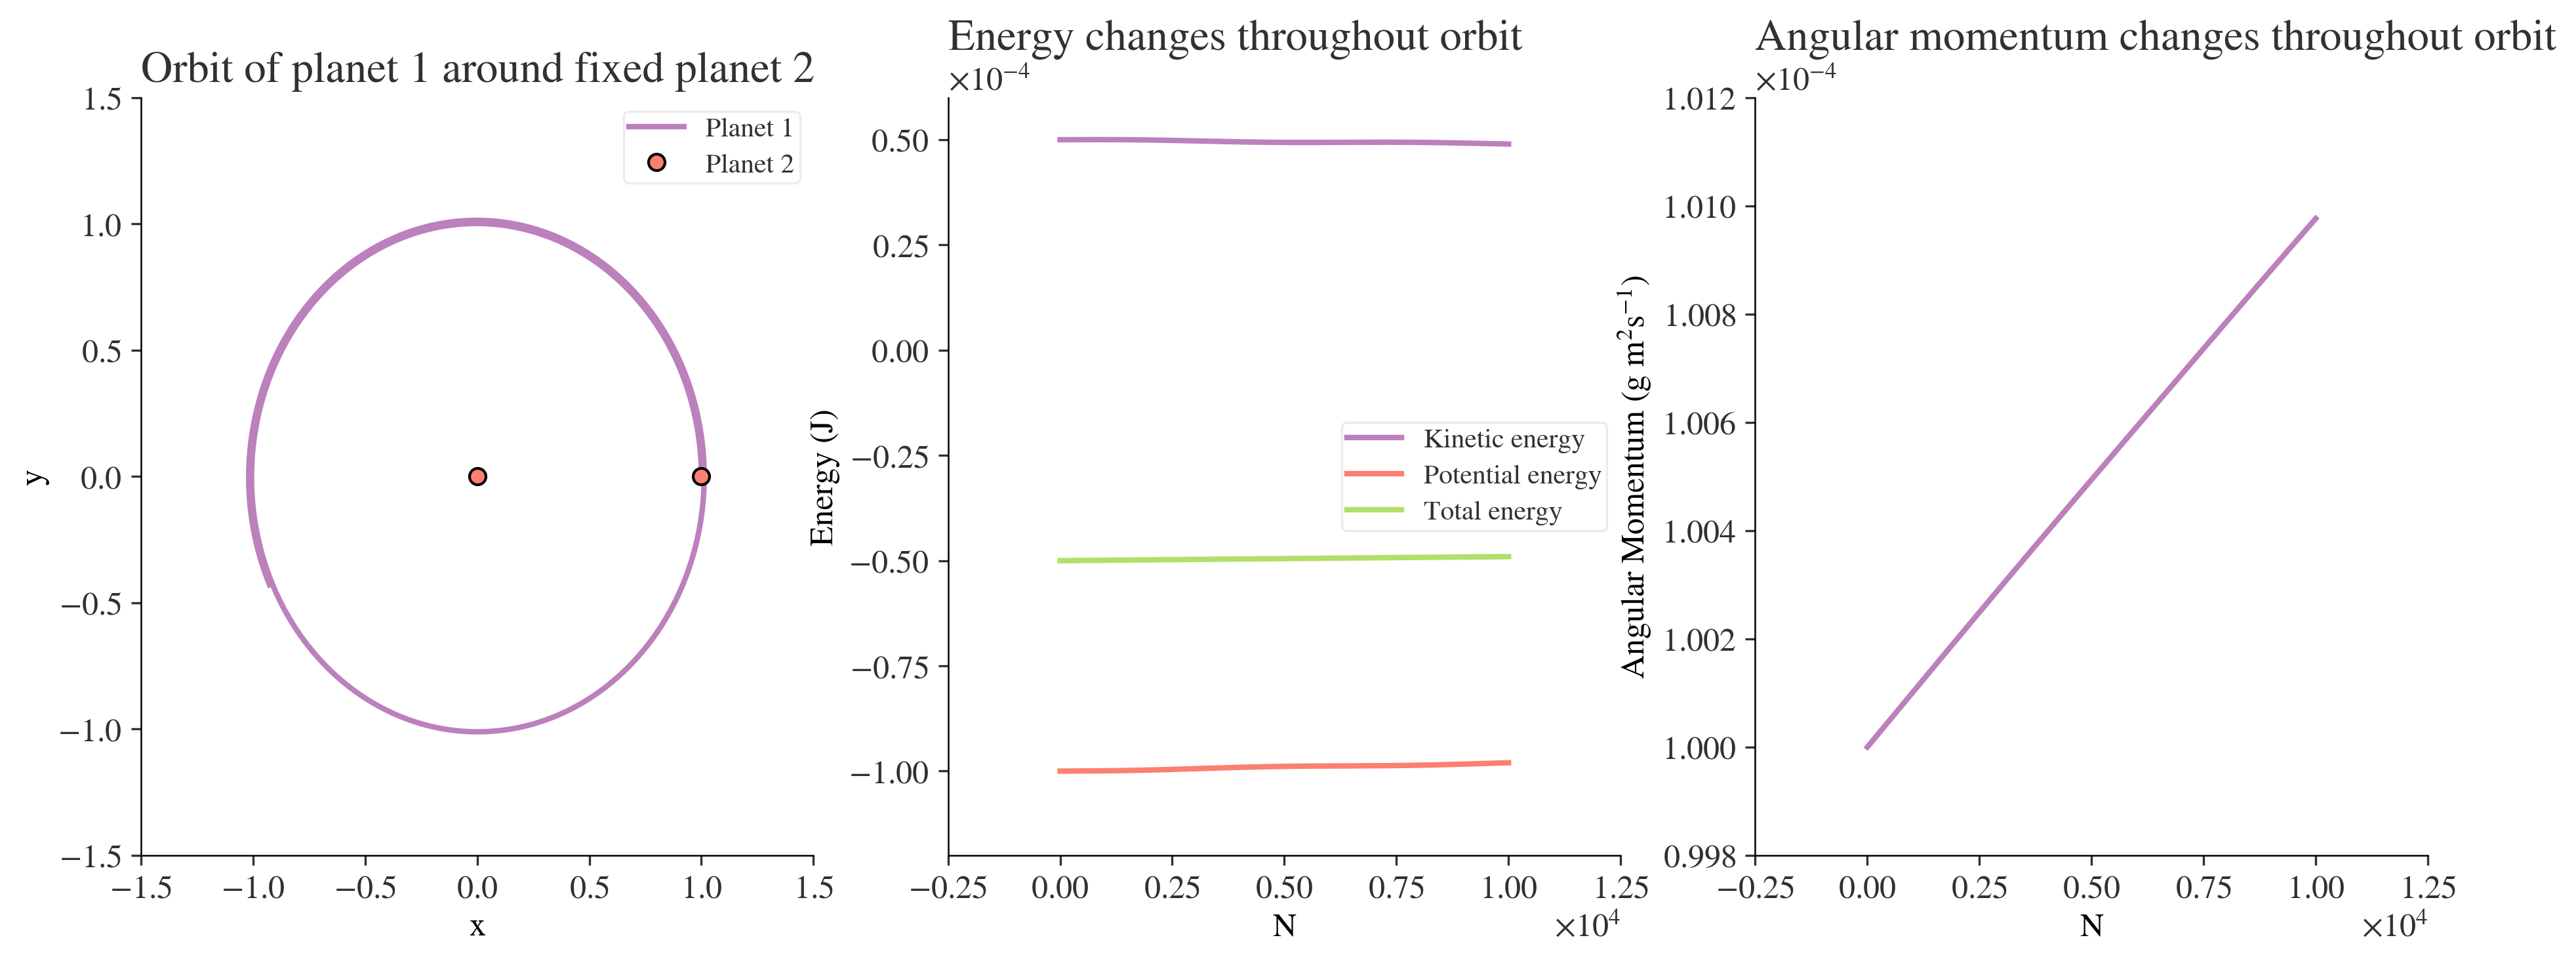

In [19]:
# Plotting results
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.plot(r1[:,0],r1[:,1], label=r'Planet 1')
ax1.plot((0,0),'o', label=r'Planet 2')
ax1.set_title(r"Orbit of planet 1 around fixed planet 2")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.legend()


ax2 = fig.add_subplot(1,3,2)
ax2.plot(T, label='Kinetic energy')
ax2.plot(V, label='Potential energy')
ax2.plot(V+T, label='Total energy')
ax2.set_title('Energy changes throughout orbit')
ax2.set_xlabel('N')
ax2.set_ylabel('Energy (J)')
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(L, label='Angular Momentum')
ax3.set_xlabel('N')
ax3.set_ylabel(r'Angular Momentum (g m$^2$s$^{-1}$)')
ax3.set_title('Angular momentum changes throughout orbit')

fig.savefig('euler.png')

As is seen for the Euler method, the orbit for Planet 1 is not perfectly circular despite the attempts to simulate a circular orbit. This can be attributed to what some may consider an overly simple model, which also presents the problem of an increasing angular momentum which cannot be possible (angular momentum is conserved).

## Velocity Verlet method
### Two bodies, similar masses
The velocity Verlet integrator is used from previous assignments. Given a position $x(t)$ and velocity $v(t)$, the propagation of these quantities by a quantity $\Delta t$ can be expressed as 
$$\begin{align}
    x(t + \Delta t) &= x(t) + v(t)\Delta t  + \frac{F(t)}{2m} \Delta t^2 \\ 
    v(t + \Delta t) &= v(t) + \frac{F(t) + F(t + \Delta t)}{2m} \Delta t
\end{align} $$
where $F(t)$ and $m$ is the force on and mass of the object being simulated.

In [20]:
Nsteps_v = 1000
dt_v = 0.01
m1_v = 1.0
m2_v = 10.0

# Storage for positions, velocities etc
r1_v = np.zeros((Nsteps_v, Ndim))
r2_v = np.zeros((Nsteps_v, Ndim))
v1_v = np.zeros((Nsteps_v, Ndim))
v2_v = np.zeros((Nsteps_v, Ndim))

# Initial conditions
r1_v[0] = np.array((1.0, 0))
r2_v[0] = np.array((-0.1, 0))

m_vtot = m1_v + m2_v
v1_v[0] = np.array((0, np.sqrt(G*m_vtot / np.abs(r1_v[0,0] - r2_v[0,0])))) * m2_v / m_vtot
v2_v[0] = np.array((0, -np.sqrt(G*m_vtot / np.abs(r1_v[0,0] - r2_v[0,0])))) * m1_v / m_vtot

# Storage for energies (T, V) and angular momenta
E1_v = np.zeros((Nsteps_v, 2))
E2_v = np.zeros((Nsteps_v, 2))

L1_v = np.zeros((Nsteps_v))
L2_v = np.zeros((Nsteps_v))

# Initial conditions for energy and angular momenta
E1_v[0] = np.array((0.5*m1_v*np.sqrt(v1_v[0,0]**2 + v1_v[0,1]**2), -G*m1_v*m2_v/np.abs(r1_v[0,0] - r2_v[0,0])))
E2_v[0] = np.array((0.5*m2_v*np.sqrt(v2_v[0,0]**2 + v2_v[0,1]**2), -G*m1_v*m2_v/np.abs(r1_v[0,0] - r2_v[0,0])))

L1_v[0] = np.cross(r1_v[0], v1_v[0])
L2_v[0] = 10*np.cross(r2_v[0], v2_v[0])

In [21]:
for i in range(Nsteps_v -1):
    # Finding forces on masses at this timestep
    f1 = force(r1_v[i], r2_v[i], m1_v, m2_v)
    f2 = force(r2_v[i], r1_v[i], m2_v, m1_v)
    # Updating positions using velocity Verlet
    r1_v[i+1] = r1_v[i] + dt_v*v1_v[i] + (dt_v**2)*f1/(2*m1_v)
    r2_v[i+1] = r2_v[i] + dt_v*v2_v[i] + (dt_v**2)*f2/(2*m2_v)
    # Finding forces at new timestep 
    f1new = force(r1_v[i+1], r2_v[i+1], m1_v, m2_v)
    f2new = force(r2_v[i+1], r1_v[i+1], m2_v, m1_v)

    # Updating velocities using velocity Verlet
    v1_v[i+1] = v1_v[i] + dt_v*((f1+f1new) / (2*m1_v))
    v2_v[i+1] = v2_v[i] + dt_v*((f2+f2new) / (2*m2_v))

    
    # Storing energies and angular momenta
    E1_v[i+1] = np.array((0.5*m1_v*np.sqrt(v1_v[i+1,0]**2 + v1_v[i+1,1]**2), -G*m1_v*m2_v/np.linalg.norm(r2_v[i+1]-r1_v[i+1])))
    E2_v[i+1] = np.array((0.5*m2_v*np.sqrt(v2_v[i+1,0]**2 + v2_v[i+1,1]**2), -G*m2_v*m1_v/np.linalg.norm(r1_v[i+1]-r2_v[i+1])))

    L1_v[i+1] = np.cross(r1_v[i+1], v1_v[i+1])
    L2_v[i+1] = 10*np.cross(r2_v[i+1], v2_v[i+1])



Mean total energy:  -6.21480832828486
Mean total angular momentum:  3.1622776601683844


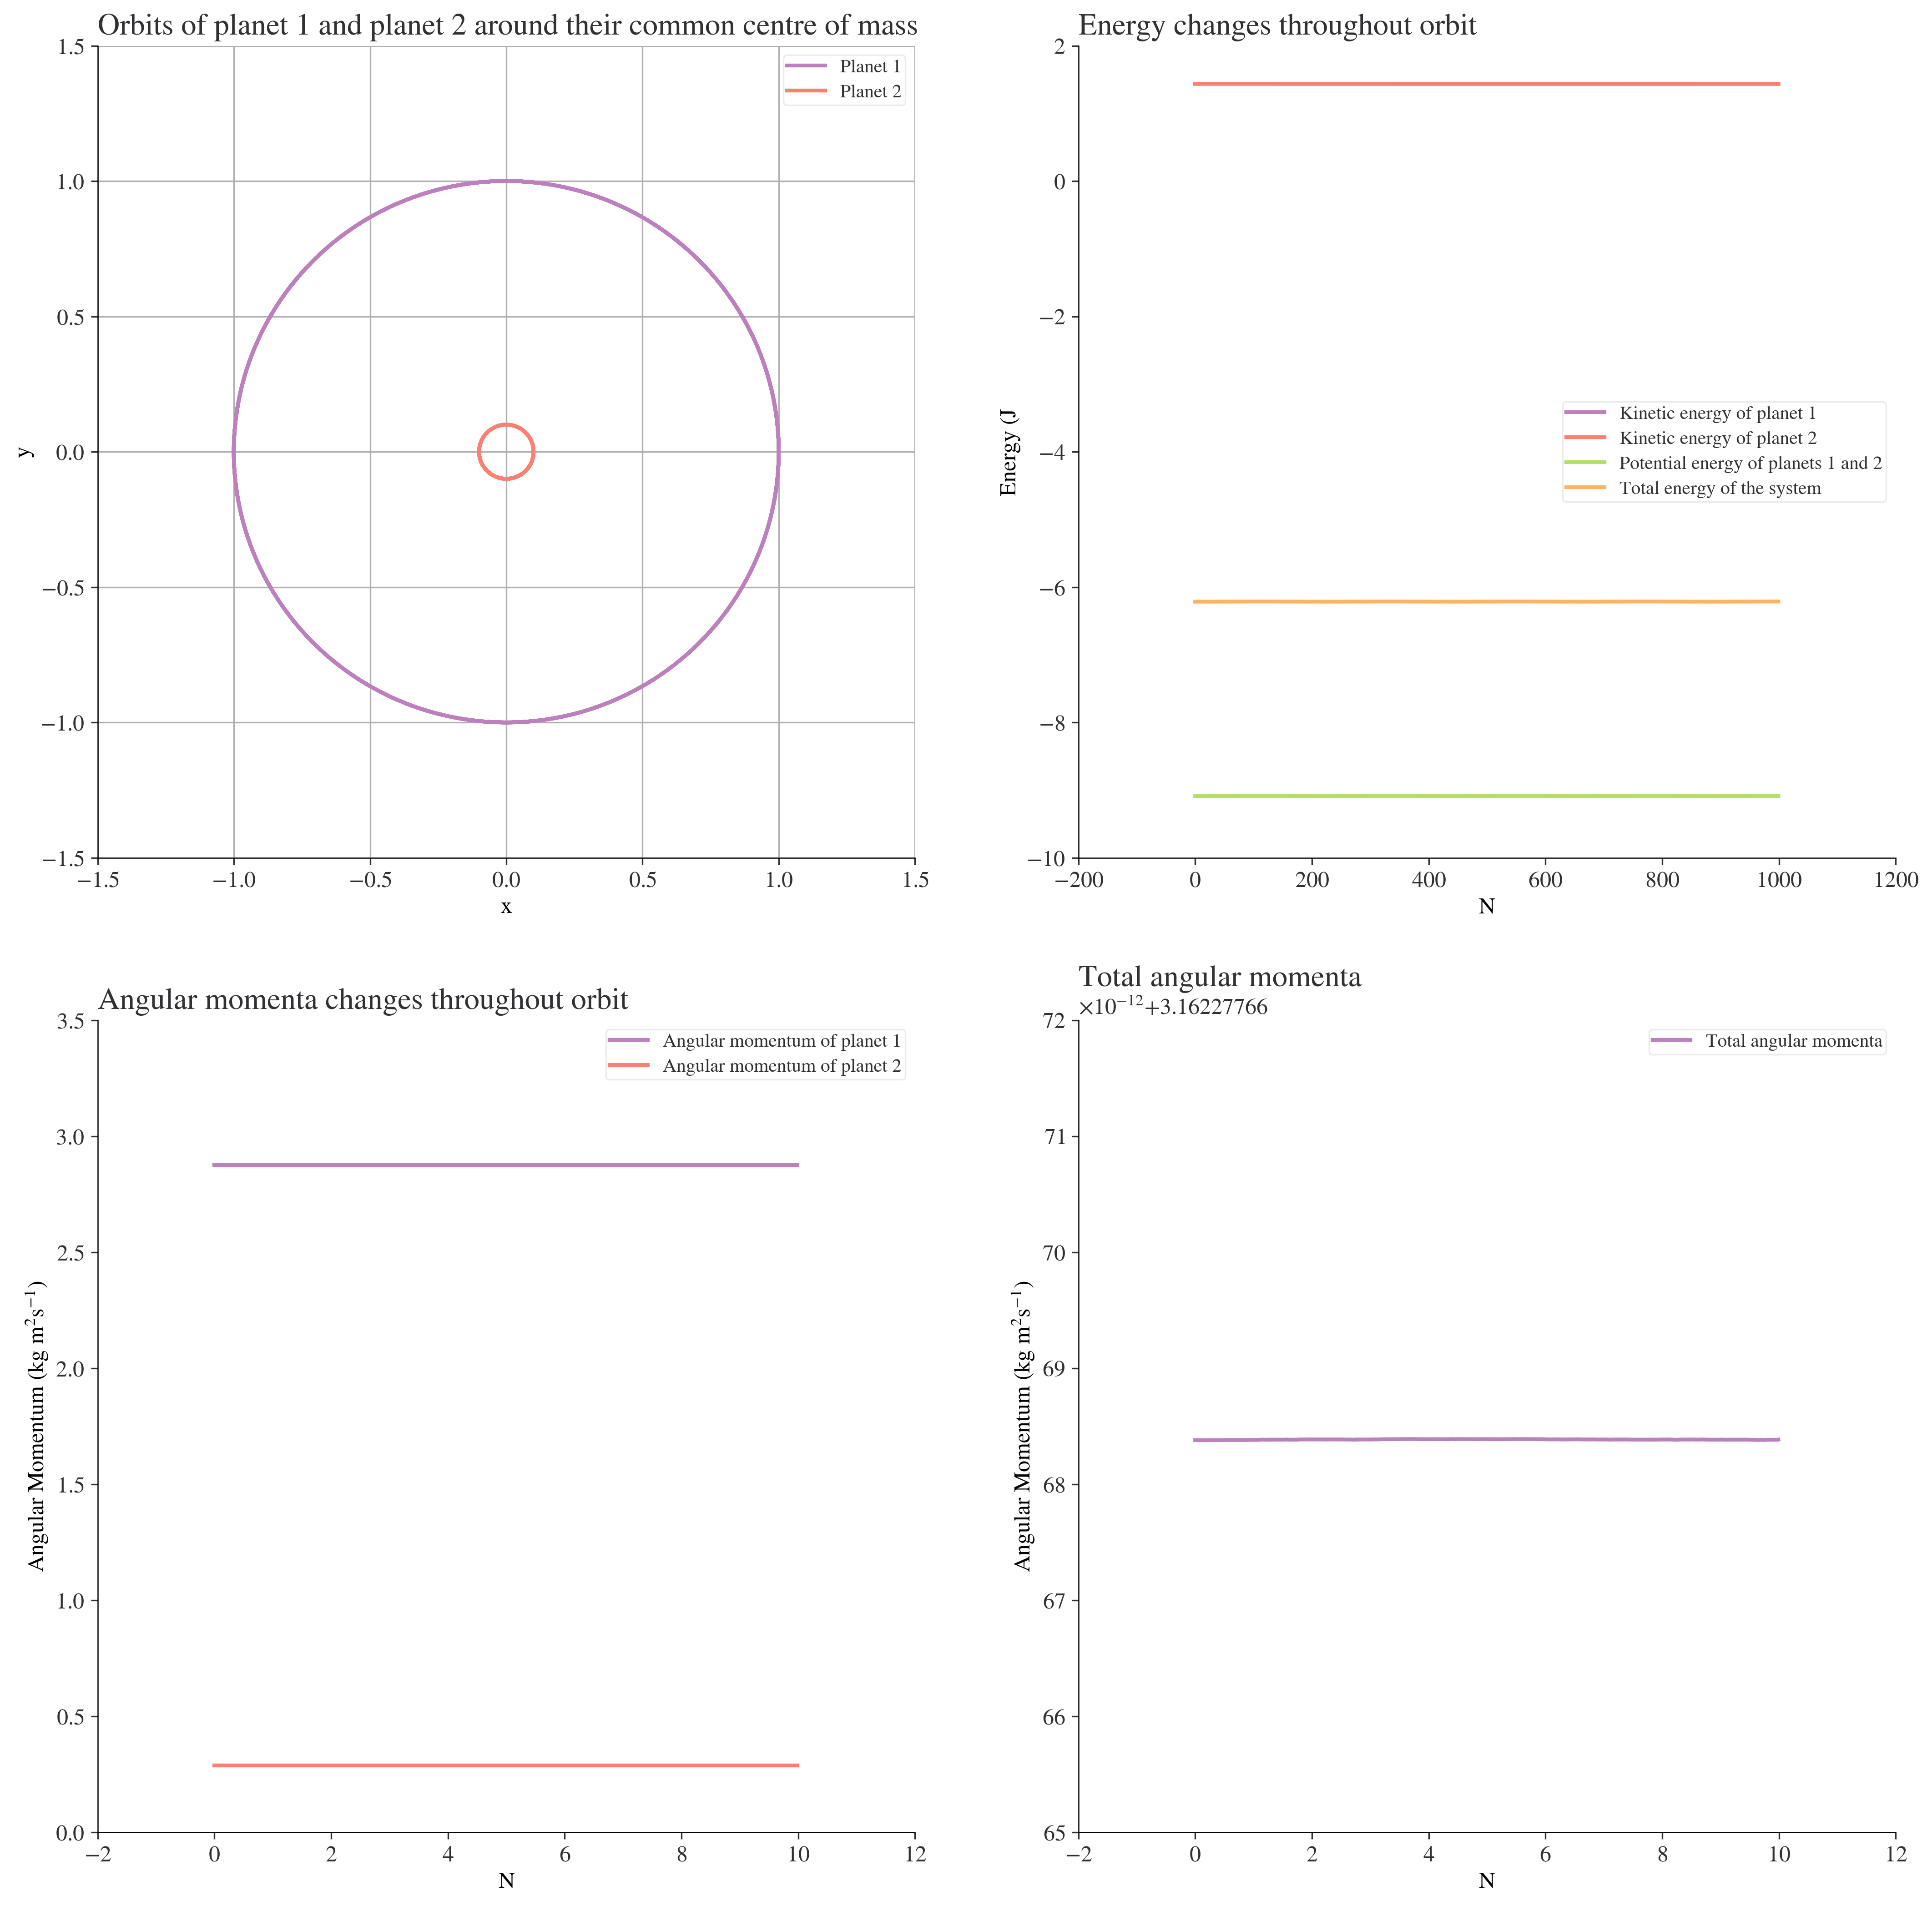

In [22]:
fig2 = plt.figure(figsize=(17,17))
ax4 = fig2.add_subplot(2,2,1)
ax4.plot(r1_v[:,0],r1_v[:,1], label=r'Planet 1')
ax4.plot(r2_v[:,0],r2_v[:,1], label=r'Planet 2')
ax4.set_title(r'Orbits of planet 1 and planet 2 around their common centre of mass')
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.legend()
ax4.grid()

ax5 = fig2.add_subplot(2,2,2)
ax5.plot(E1_v[:,0], label=r'Kinetic energy of planet 1')
ax5.plot(E2_v[:,0], label=r'Kinetic energy of planet 2')
ax5.plot(E1_v[:,1], label=r'Potential energy of planets 1 and 2')
ax5.plot(E1_v[:,0] + E2_v[:,0] + E2_v[:,1],label=r'Total energy of the system')
ax5.set_title('Energy changes throughout orbit')
ax5.set_xlabel('N')
ax5.set_ylabel('Energy (J')
ax5.legend()

ax6 = fig2.add_subplot(2,2,3)
ax6.plot(np.arange(Nsteps_v)*dt_v, L1_v, label=r'Angular momentum of planet 1')
ax6.plot(np.arange(Nsteps_v)*dt_v, L2_v, label=r'Angular momentum of planet 2')
ax6.set_title('Angular momenta changes throughout orbit')
ax6.set_xlabel('N')
ax6.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax6.legend()

ax7 = fig2.add_subplot(2,2,4)
ax7.plot(np.arange(Nsteps_v)*dt_v, L1_v+L2_v, label=r'Total angular momenta')
ax7.set_title('Total angular momenta')
ax7.set_xlabel('N')
ax7.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax7.legend()

print('Mean total energy: ',np.mean(E1_v[:,0] + E2_v[:,0] + E2_v[:,1]))
print('Mean total angular momentum: ',np.mean(L1_v + L2_v))

fig2.savefig('2b_verlet.png')


As can be seen from the graphs, a perfectly circular orbit is achieved with the velocity Verlet integrator. This and the almost-constant graphs for angular momentum and total energy demonstrate that there is a noticeable increase in the quality of the simulation and that the conservation laws are obeyed.


### Three bodies

In [23]:
# Simulation parameters
G = 1
m1 = 1
m2 = 3e-6
m3 = 3.6e-8
Ndim = 2     
Nsteps = 20000
dt = 0.001

# Storage arrays
r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

# Initial conditions
r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.0, 0.0025)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((-np.sqrt(G*m2/0.0025), 0)) + v2[0]


It appears that changing `dt` to be smaller and increasing the number of steps in conjunction with this, as well as revising the initial conditions (moving the orbit closer) greatly improved the error in the third body's orbit. Prior to this, it was a spiral.

In [24]:
for i in range(Nsteps-1):
    # Finding forces on masses at this timestep
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) + force(r3[i], r1[i], m3, m1)

    # Updating positions using velocity Verlet
    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    # Finding forces at new timestep 
    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) + force(r3[i+1], r1[i+1], m3, m1)

    # Updating velocities using velocity Verlet
    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



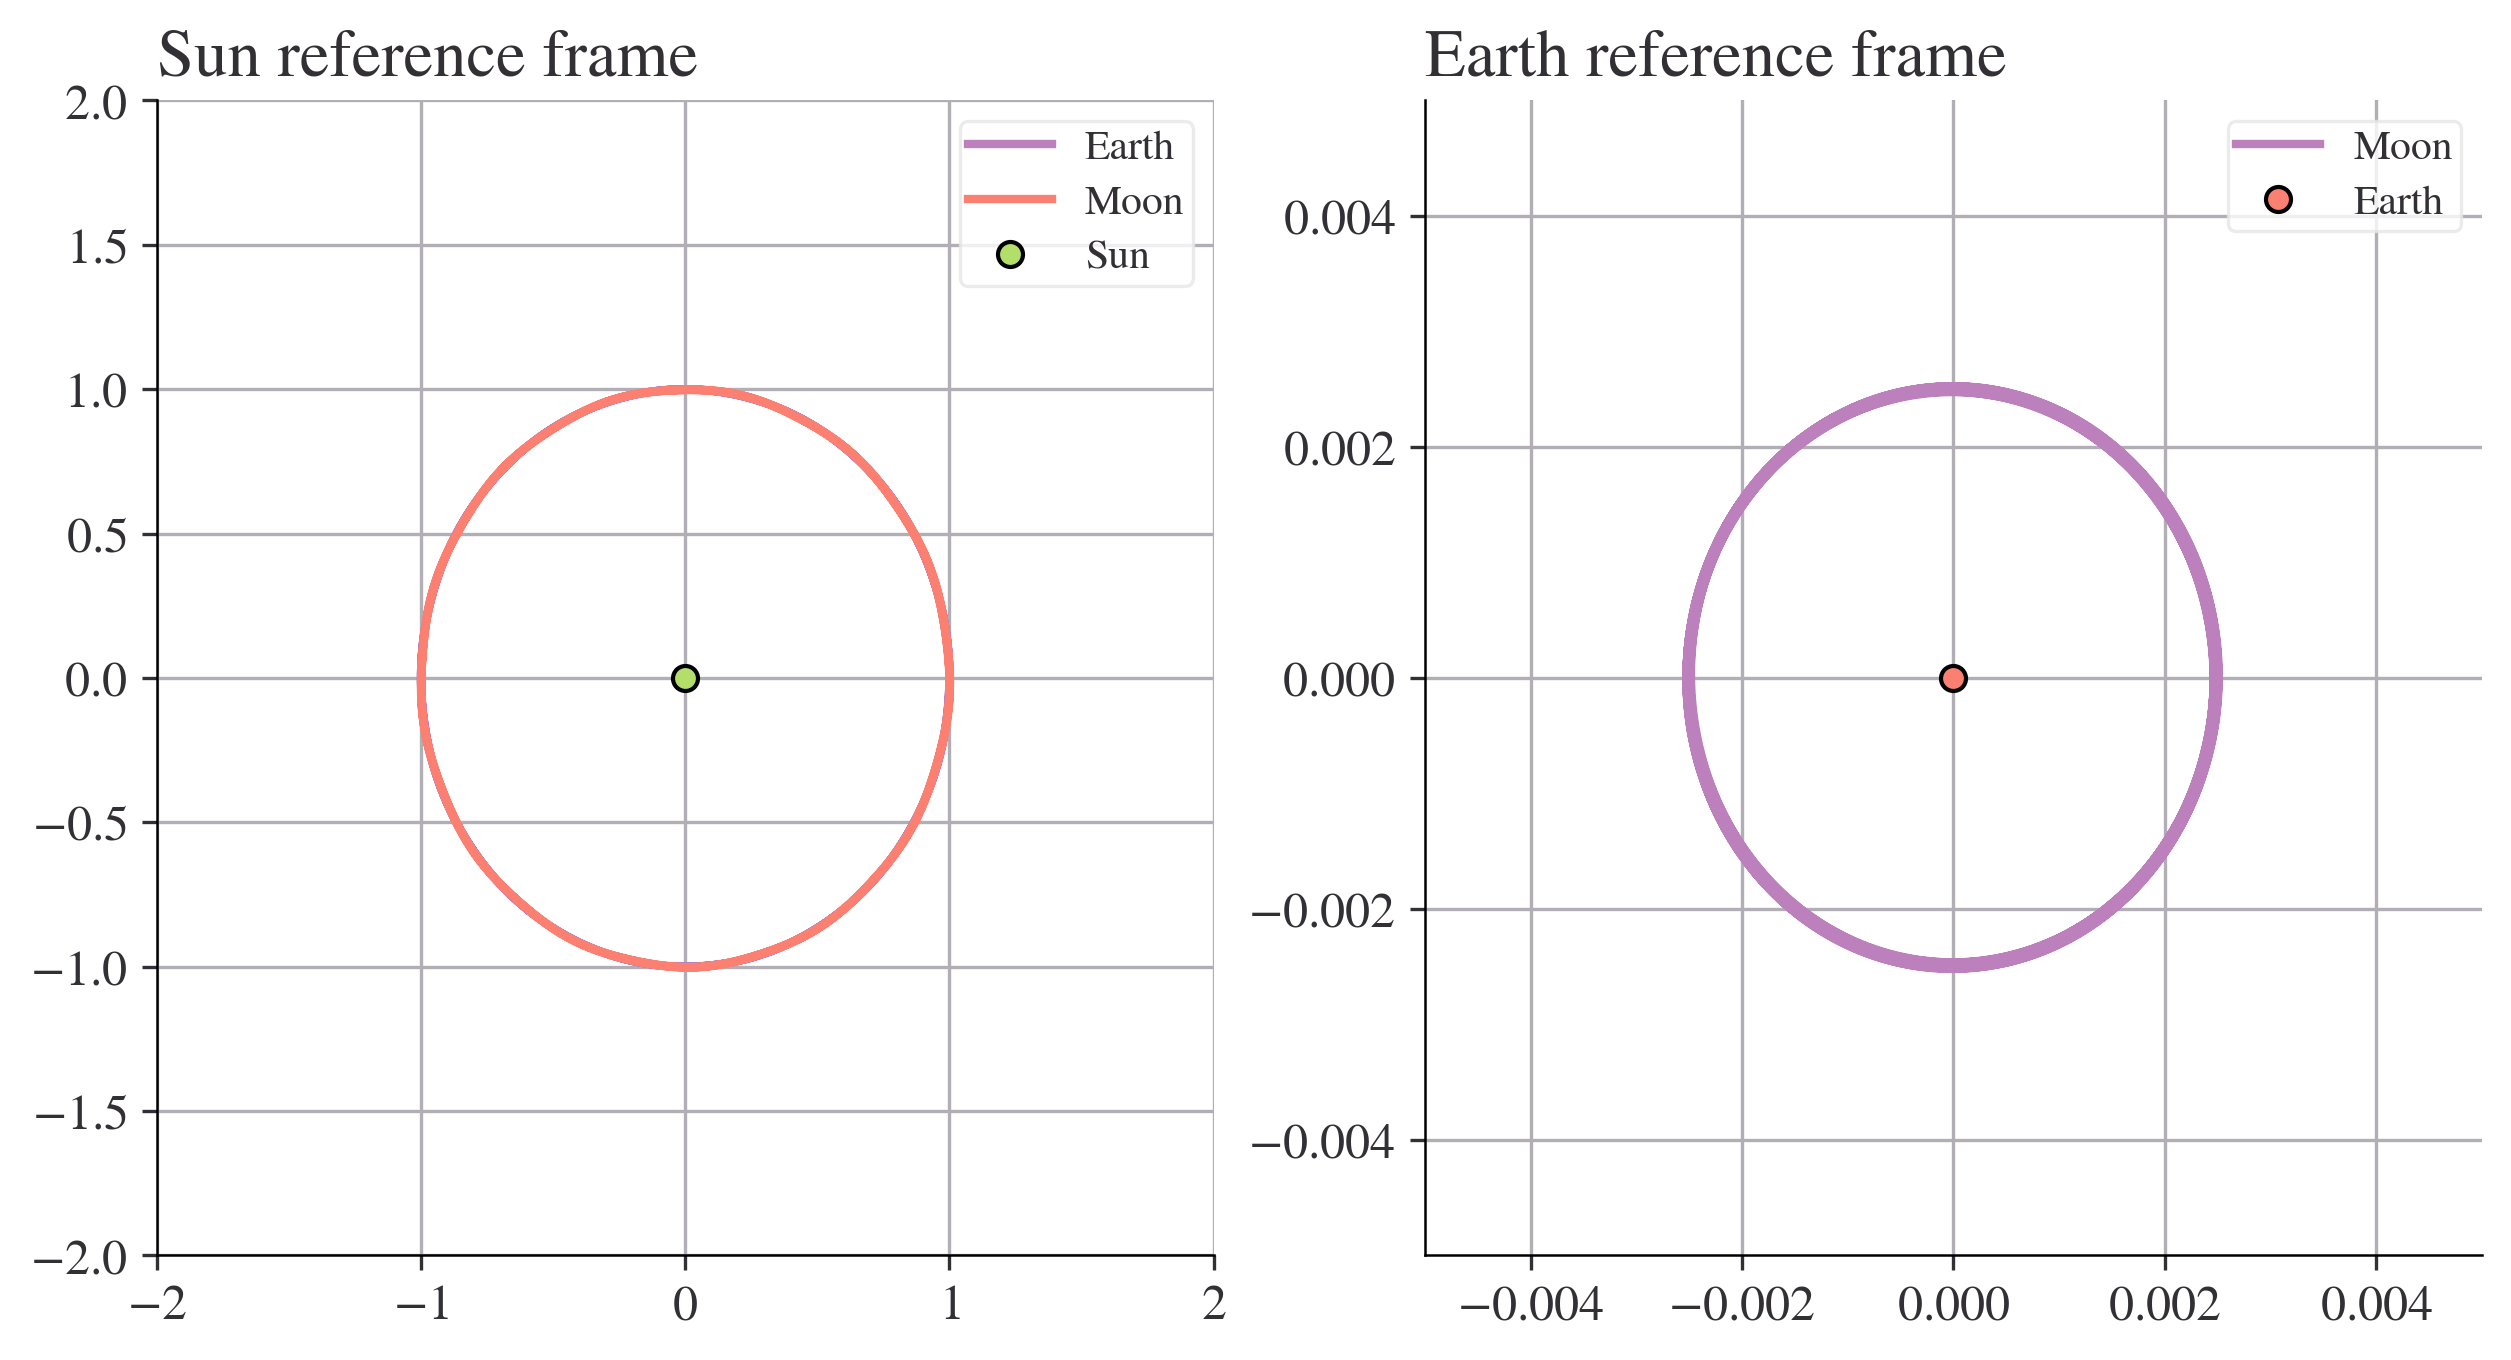

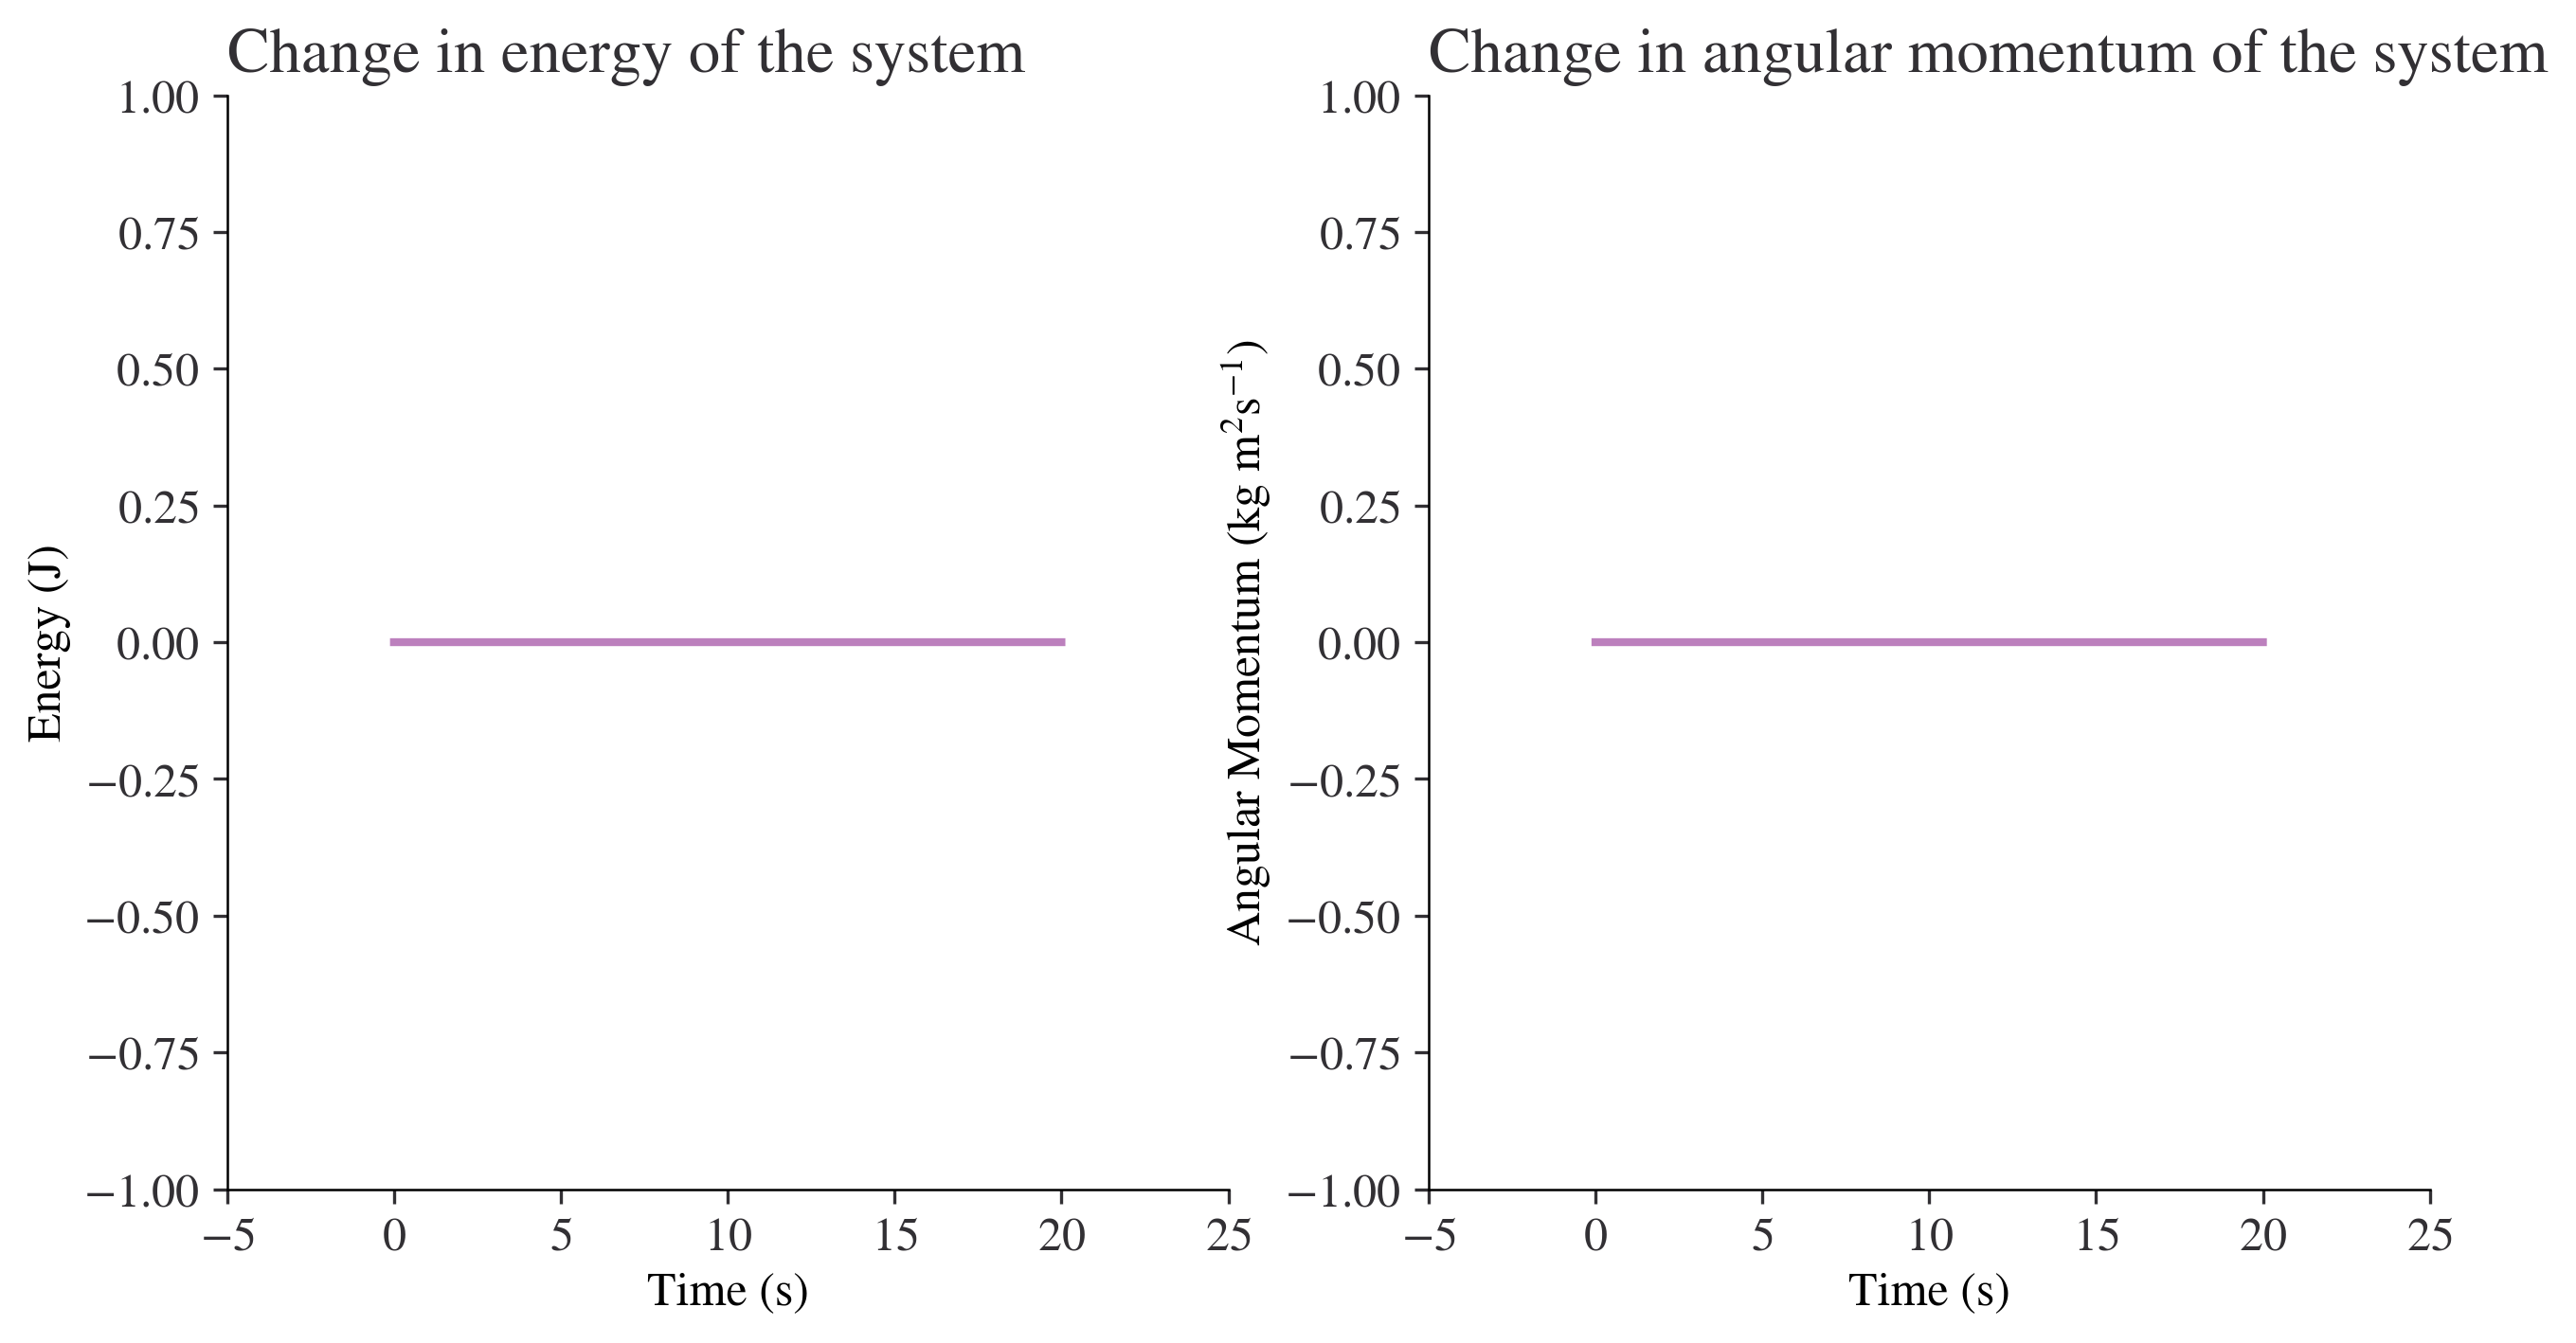

In [25]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax1.set_title('Sun reference frame')
ax1.plot(r2[:,0], r2[:,1], label='Earth')
ax1.plot(r3[:,0], r3[:,1], label='Moon')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.legend()
ax1.grid()

ax2 = fig1.add_subplot(1,2,2)
ax2.set_title('Earth reference frame')
ax2.plot(r2[:,0]-r3[:,0], r2[:,1]-r3[:,1], label='Moon')
ax2.plot(0, 0, 'o', label='Earth')
ax2.set_xlim(-0.005,0.005)
ax2.set_ylim(-0.005,0.005)
ax2.legend()
ax2.grid()
fig1.savefig('3b_verlet.png')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m1*m3/np.linalg.norm(r1-r3, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(np.arange(len(e))*dt,e)
ax1.set_title('Change in energy of the system')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Energy (J)')
ax1.set_ylim(-1,1)

l = m1 * np.cross(v1,r1,axis=1) + m2 * np.cross(v2,r2,axis=1)
ax2 = fig1.add_subplot(1,2,2)
ax2.plot(np.arange(len(l))*dt,l)
ax2.set_title('Change in angular momentum of the system')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax2.set_ylim(-1,1)

fig1.savefig('3b_conservation.png')


As is shown by the plot above, the velocity Verlet method gave rise to a good approximation of a 3-body system, which is shown by the circular orbit in planet 2's frame of refernce. Despite this, the orbit is somewhat thick, demonstrating some error in the simulation.

# Week 6/7

Moving on, we attempt the fourth-order Runge-Kutta integrator with a two-body system. The algorithm, written out in the below function is 

$$

\begin{matrix} y(x+\mathrm{\Delta x})&=&y(x)+\frac{1}{6}\left(k_1+2k_2+2k_3+k_4\right)\\k_1&=&\mathrm{\Delta x}\ f(x,y(x))\\k_2&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x}/2,y(x)+k_1/2)\\k_3&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x}/2,y(x)+k_2/2)\\k_4&=&\mathrm{\Delta x}\ f(x+\mathrm{\Delta x},y(x)+k_3) \end{matrix}

$$.

This method was taken from class exercises and adapted accordingly for the purpose of this investigation.

In [26]:
def RK4_solver(fun,y0,dt,N):
    """
    Solve dy/dt = fun(y,t) using fourth-order RK method.

    Inputs:
    fun  f(y,t)
    y0   Initial condition - assumed to be two-component
    dt   Step size
    N    Number of steps
    Returns: two arrays of length N+1 (x and v or equivalent)
    """
    # Storage for solution
    y = np.zeros((N+1,2,2))
    # Initial condition
    y[0] = y0
    t = 0
    for i in range(N):
        # RK4 formulae
        k1 = dt*fun(y[i],t)
        k2 = dt*fun(y[i]+0.5*k1,t+0.5*dt)
        k3 = dt*fun(y[i]+0.5*k2,t+0.5*dt)
        k4 = dt*fun(y[i]+k3,t+dt)
        y[i+1]=y[i]+(k1+2*k2+2*k3+k4)/6
        t += dt
    return y



In order to implement the Runge-Kutta integrator, the second order differential equation concerning our system (taken from manipulating $\mathrm{(1)}$)

$$ \frac{d^2x}{dt^2} = \frac{GM}{r} $$ 
can be decoupled into two first-order equations by using the fact that $dx/dt = v$:

$$ \begin{align}
\frac{dx}{dt} &= v \\
\frac{dv}{dt} &= \frac{GM}{r}.
\end{align}
$$

This was encoded into a function `p2_RHS`, which was passed into the RK solver.

In [27]:
def p2_RHS(y,t):
    '''
    RHS to be passed into the RKsolver function
    
    Inputs:
    y     Array containing position and velocity
    t     Time (unused)

    Outputs:
    arr   Array containing the values of the 
          coupled first order ODEs
    '''
    m1 = 1.0

    pos = y[0]
    vel = y[1]

    r12 = np.array([0,0]) - pos
    r12_mag_cubed = np.linalg.norm(r12)**3
    
    dpos = vel
    dvel = G*m1*r12/r12_mag_cubed

    return np.array([dpos,dvel])

A different approach was taken with the initial conditions, as now $2\times2$ arrays with the first row as position and the second as velocity were used, as opposed to dealing with them separately in the Verlet integrator.

In [28]:
p2_initial_pos = np.array([1,0])
p2_initial_vel = np.array([0,np.sqrt(G*m1/1)])

N = 2000
dt = 0.01
p2_y_0 = np.array([p2_initial_pos, p2_initial_vel])

p2_results = RK4_solver(p2_RHS, p2_y_0, dt, N)


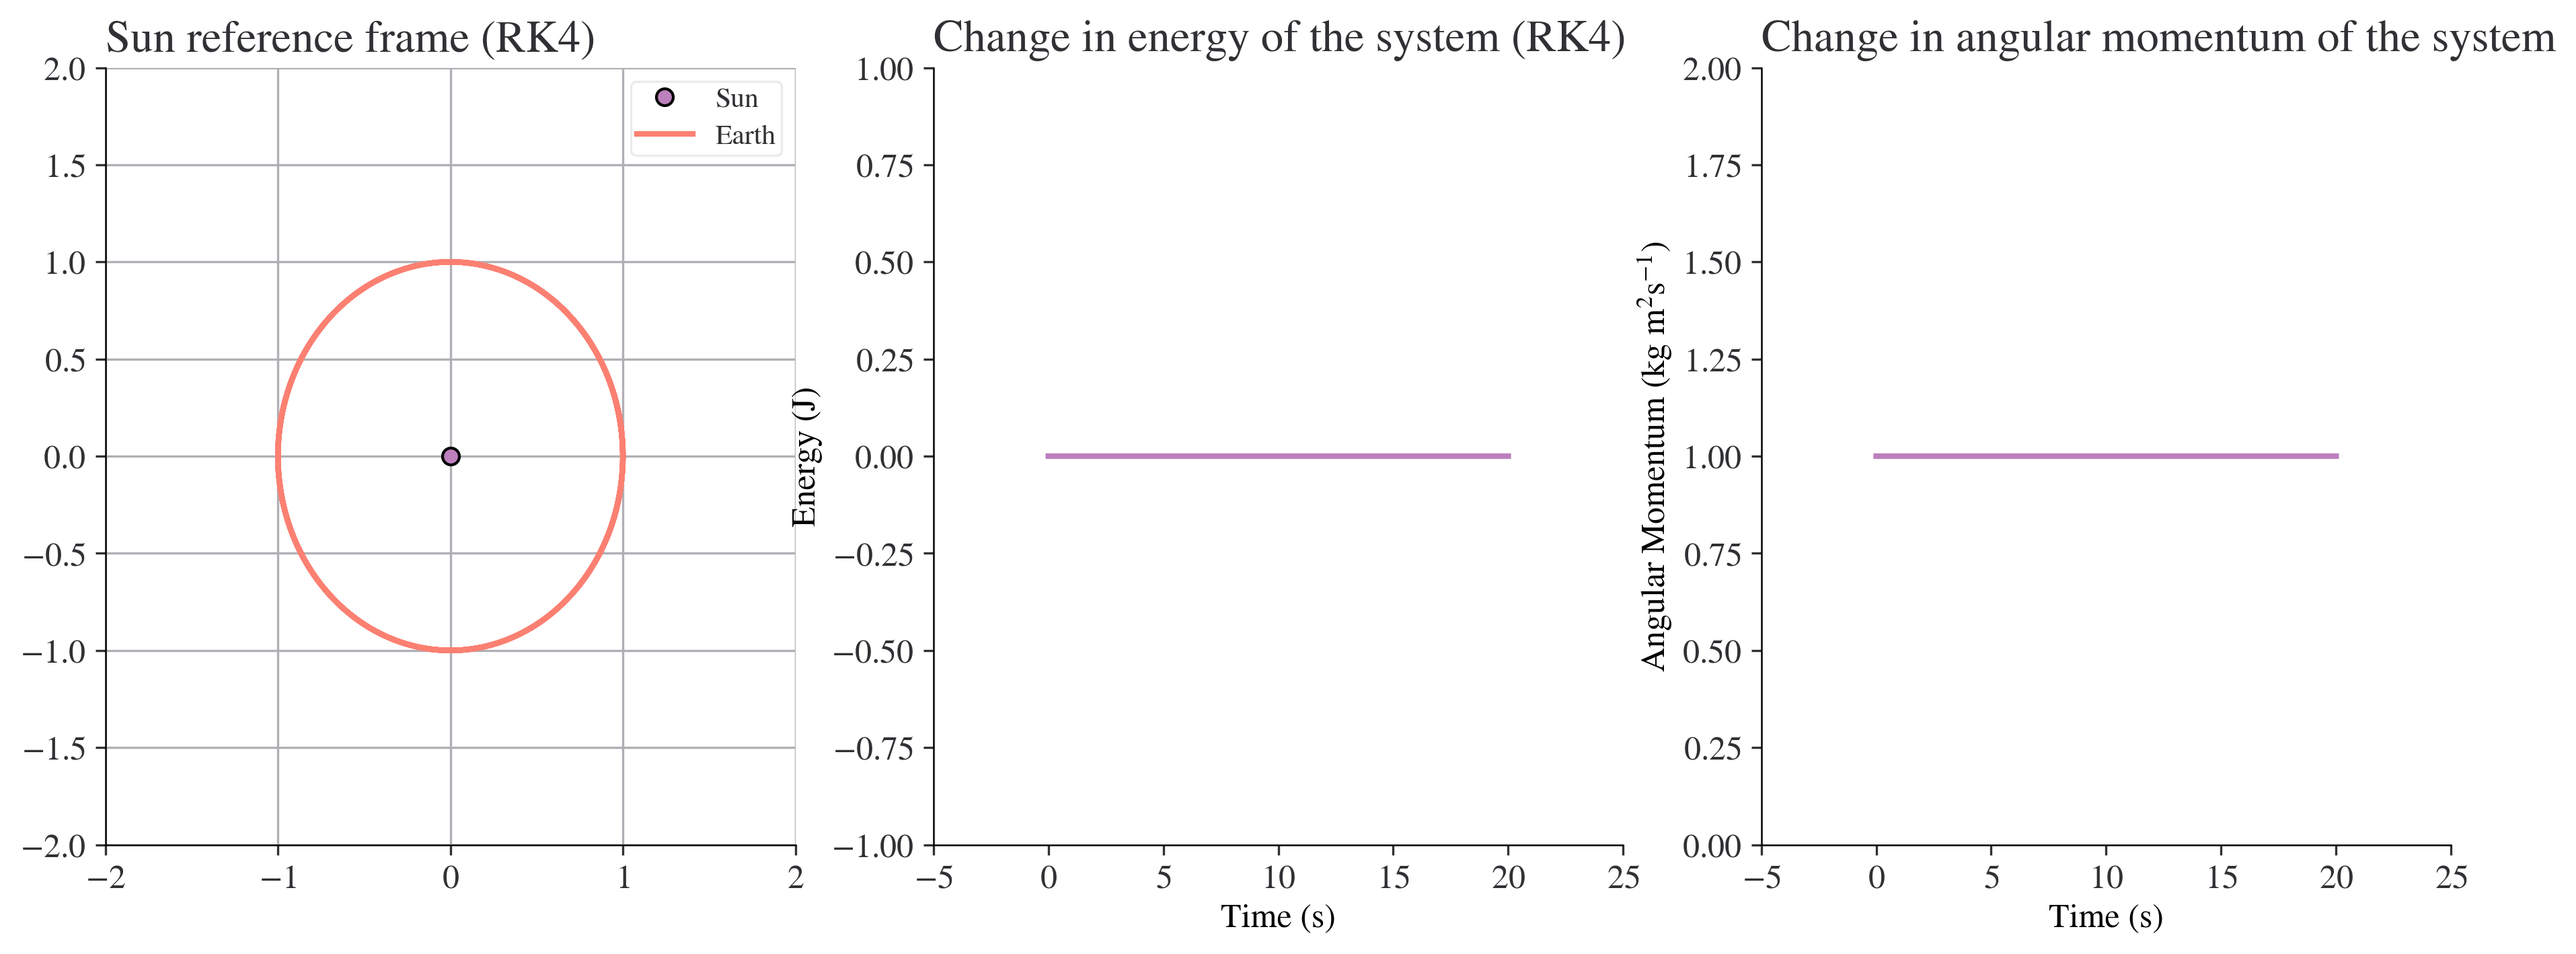

In [29]:
fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(1,3,1)
ax1.set_title('Sun reference frame (RK4)')
ax1.plot(0, 0, 'o', label='Sun')
ax1.plot(p2_results[:,0,0], p2_results[:,0,1], label='Earth')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend()


e = 0.5 * (m2*np.linalg.norm(p2_results[:,1],axis=1)**2) - G*m1*m2/np.linalg.norm(p2_results[:,0], axis=1) 

ax2 = fig1.add_subplot(1,3,2)
ax2.plot(np.arange(len(e))*dt,e)
ax2.set_title('Change in energy of the system (RK4)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Energy (J)')
ax2.set_ylim(-1,1)

l = np.cross(p2_results[:,0],p2_results[:,1],axis=1)
ax3 = fig1.add_subplot(1,3,3)
ax3.plot(np.arange(len(l))*dt,l)
ax3.set_title('Change in angular momentum of the system')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
ax3.set_ylim(0,2)

fig1.savefig('rk4.png')


The fourth-order Runge-Kutta integrator is a good tool to use for modelling two bodies, but I faced significant difficulty in figuring out how to use it in the context of three bodies, as was seen in previous weeks. One way in which future experiments could do this more efficiently is through the use of classes.

# Week 8–10
## Simulating a Gravity Assist between a planet and a smaller object

Moving on from the mandatory part of the investigation, I will attempt to simulate a gravitational slingshot between a satellite and Earth in a circular orbit. Given my success with the velocity Verlet algorithm, the simulation will use this from this point onwards.

To achieve this, we begin by initialising the orbit of Earth around the Sun like before. The satellite will be given an arbitrary position $(1.5, 1.5)$, and a trajectory to Earth will be calculated. Now, for the sake of simplicity, I will decide for the point of intersection to be around the point $(0,1)$ on the circular orbit of Earth. Some kinematics will be used to determine the initial velocity of the satellite. Most variables from earlier were used and adapted accordingly. 

A function `collision_checker` was also made to check for any collisions between the satellite and Earth. The tolerance was decided by calculating the radius of the Earth as a fraction of the distance from the Sun to the Earth. This was calculated to be $\approx 4\times 10^{-5}$.

In [30]:
def collision_checker(r1, r2):
    '''
    A function to check to see if two objects have collided.
    The tolerance was chosen based on earlier calculations

    Inputs:
    r1, r2   Positions of the two bodies
    '''
    if np.linalg.norm(r1 - r2) <= 4e-5:
        print('Collision!')

In order to determine the velocity required for the satellite to reach Earth at the interception point, I initially ran the simulation without the satellite to determine the timestep where Earth would reach this point. Then, using some simple kinematics, I calculated the initial velocity using the distance from the satellite's initial position (known) and the time elapsed up to the timestep. This was calculated by multiplying the array position (in this case 1570) by `dt`. I also offset the final position slightly on the x-axis to allow the satellite to pass behind Earth.

As a rule of thumb, if the object that is being assisted is travelling in the same direction of the planet after being assisted, it will experience an increase in velocity. The opposite applies for the object travelling in the opposite direction of the planet.

In [31]:
G = 1
m1 = 1
m2 = 3e-6
m3 = 1e-27
Ndim = 2    
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.5, 1.5)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((1/1.57*(0.001-1.5), 
                  1/1.57*(1-1.5)))


Unlike the algorithm above, I have neglected the effect of the Sun on satellite. This was done so that I could examine the effects of Earth of the satellite without having to consider any interactions with the Sun. I will consider adding the effect of the Sun once most aspects of the simulation work well.

In [32]:
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) #+ force(r3[i], r1[i], m3, m1)

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    collision_checker(r2[i], r3[i])

    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) #+ force(r3[i+1], r1[i+1], m3, m1)

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



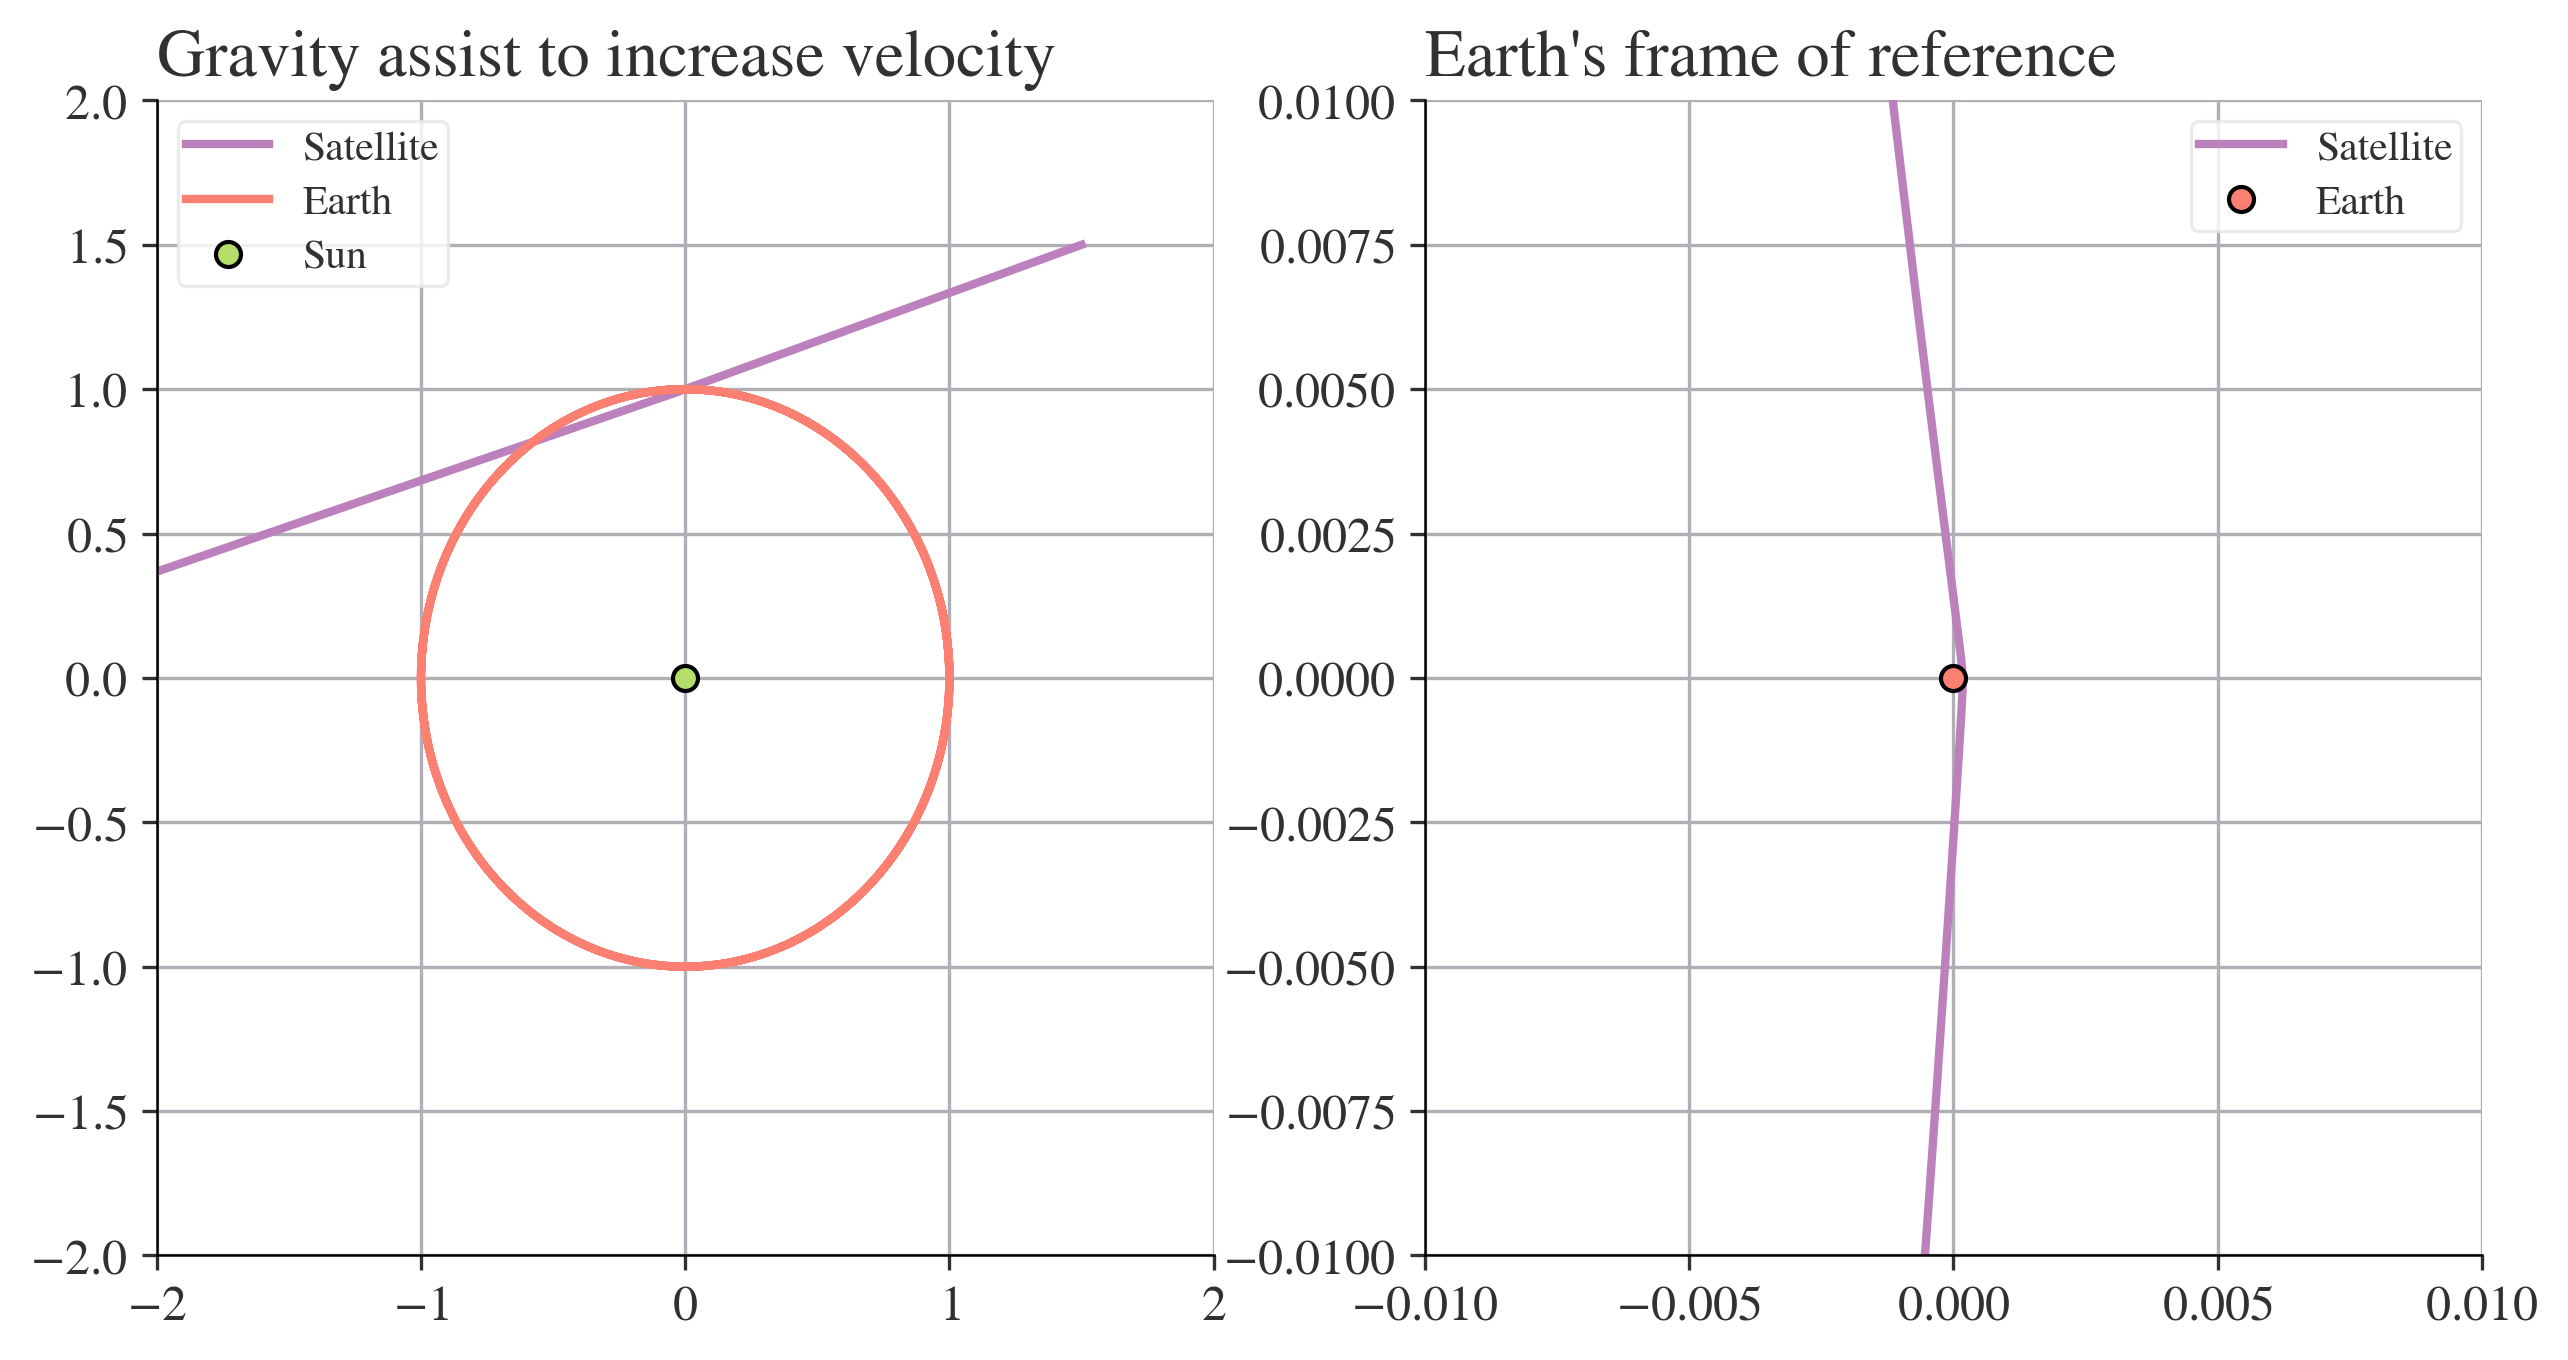

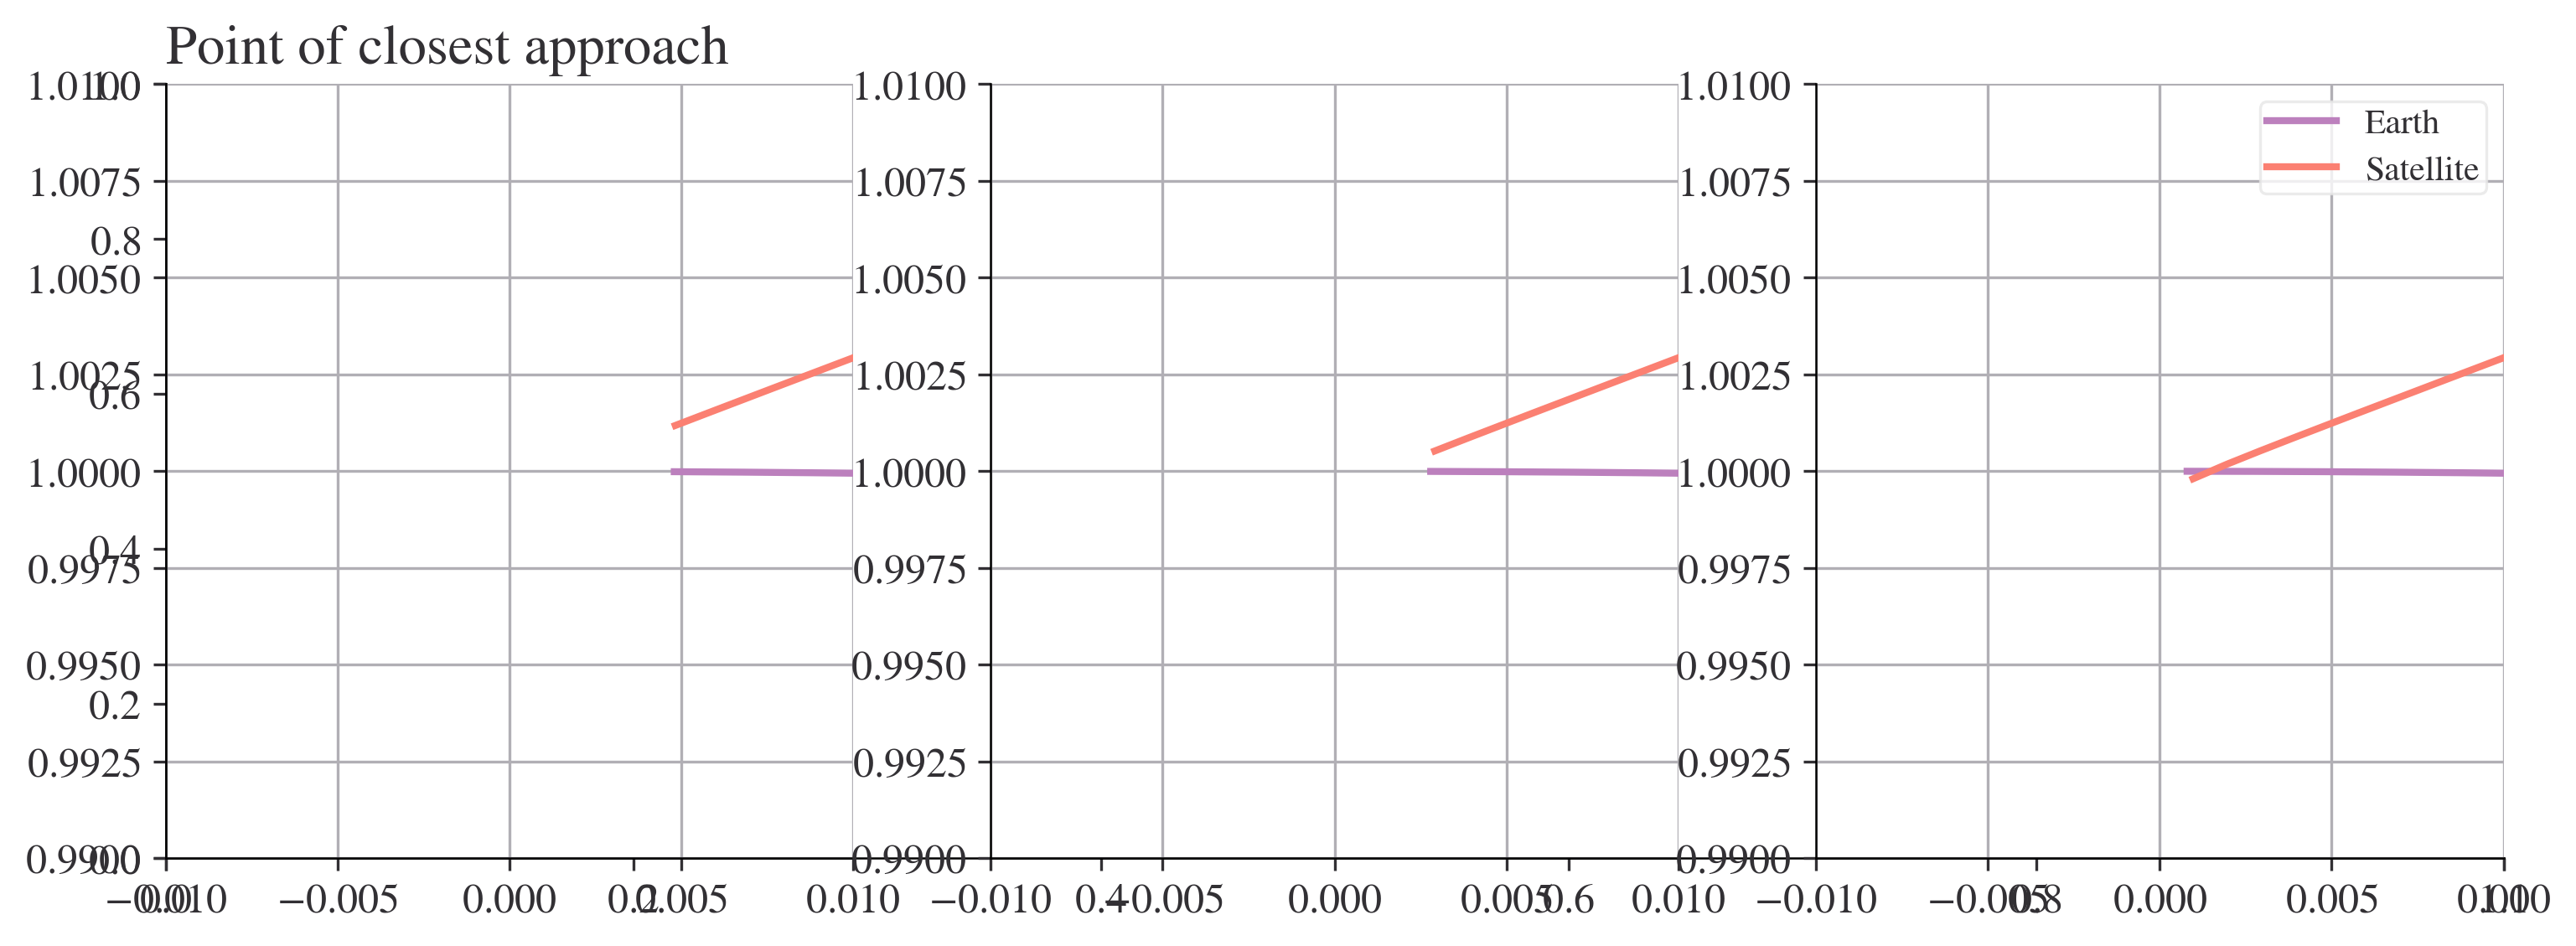

In [33]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist to increase velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Earth')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Earth\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.01, 0.01)
ax2.set_ylim(-0.01, 0.01)
ax2.plot(0,0,'o',label='Earth')
ax2.grid()
ax2.legend()

fig.savefig('earth_increase1.png')


simend = 1565
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + 2*i,0], r2[:simend + 2*i,1], label='Earth')
    ax.plot(r3[:simend + 2*i,0], r3[:simend + 2*i,1], label='Satellite')
    ax.set_xlim(-0.01, 0.01)
    ax.set_ylim(0.99, 1.01)
    ax.grid()
plt.legend()



In [34]:
'''# Rough work
print(r2[1570,1])
print(1/1.57*(r2[1570,0] - r3[0,0]))
print(1/1.57*(r2[1570,1] - r3[0,1]+0.08))

print(v3[0,1])
print(v3[-1,1])

print(np.linalg.norm(v3[0]))

print(max(np.linalg.norm(v3, axis=1)))

d = np.linalg.norm(r2-r3, axis=1)
closest_timestep = np.where(d == min(d))
print(closest_timestep)

print(np.min(np.linalg.norm(np.roll(r2,1)-r2, axis=1)))'''

print(r2[simend,0] - r2[simend-1,0])

print(r2[simend-1,0])

-0.0009999800530669616
0.006796297506463182


Initial velocity of satellite: 1.006490559508217
Final velocity of satellite: 1.0718588933449857
Initial velocity of Earth: 1.0
Final velocity of Earth: 0.9999998522490997
Point of closest approach: 0.000247332627498479


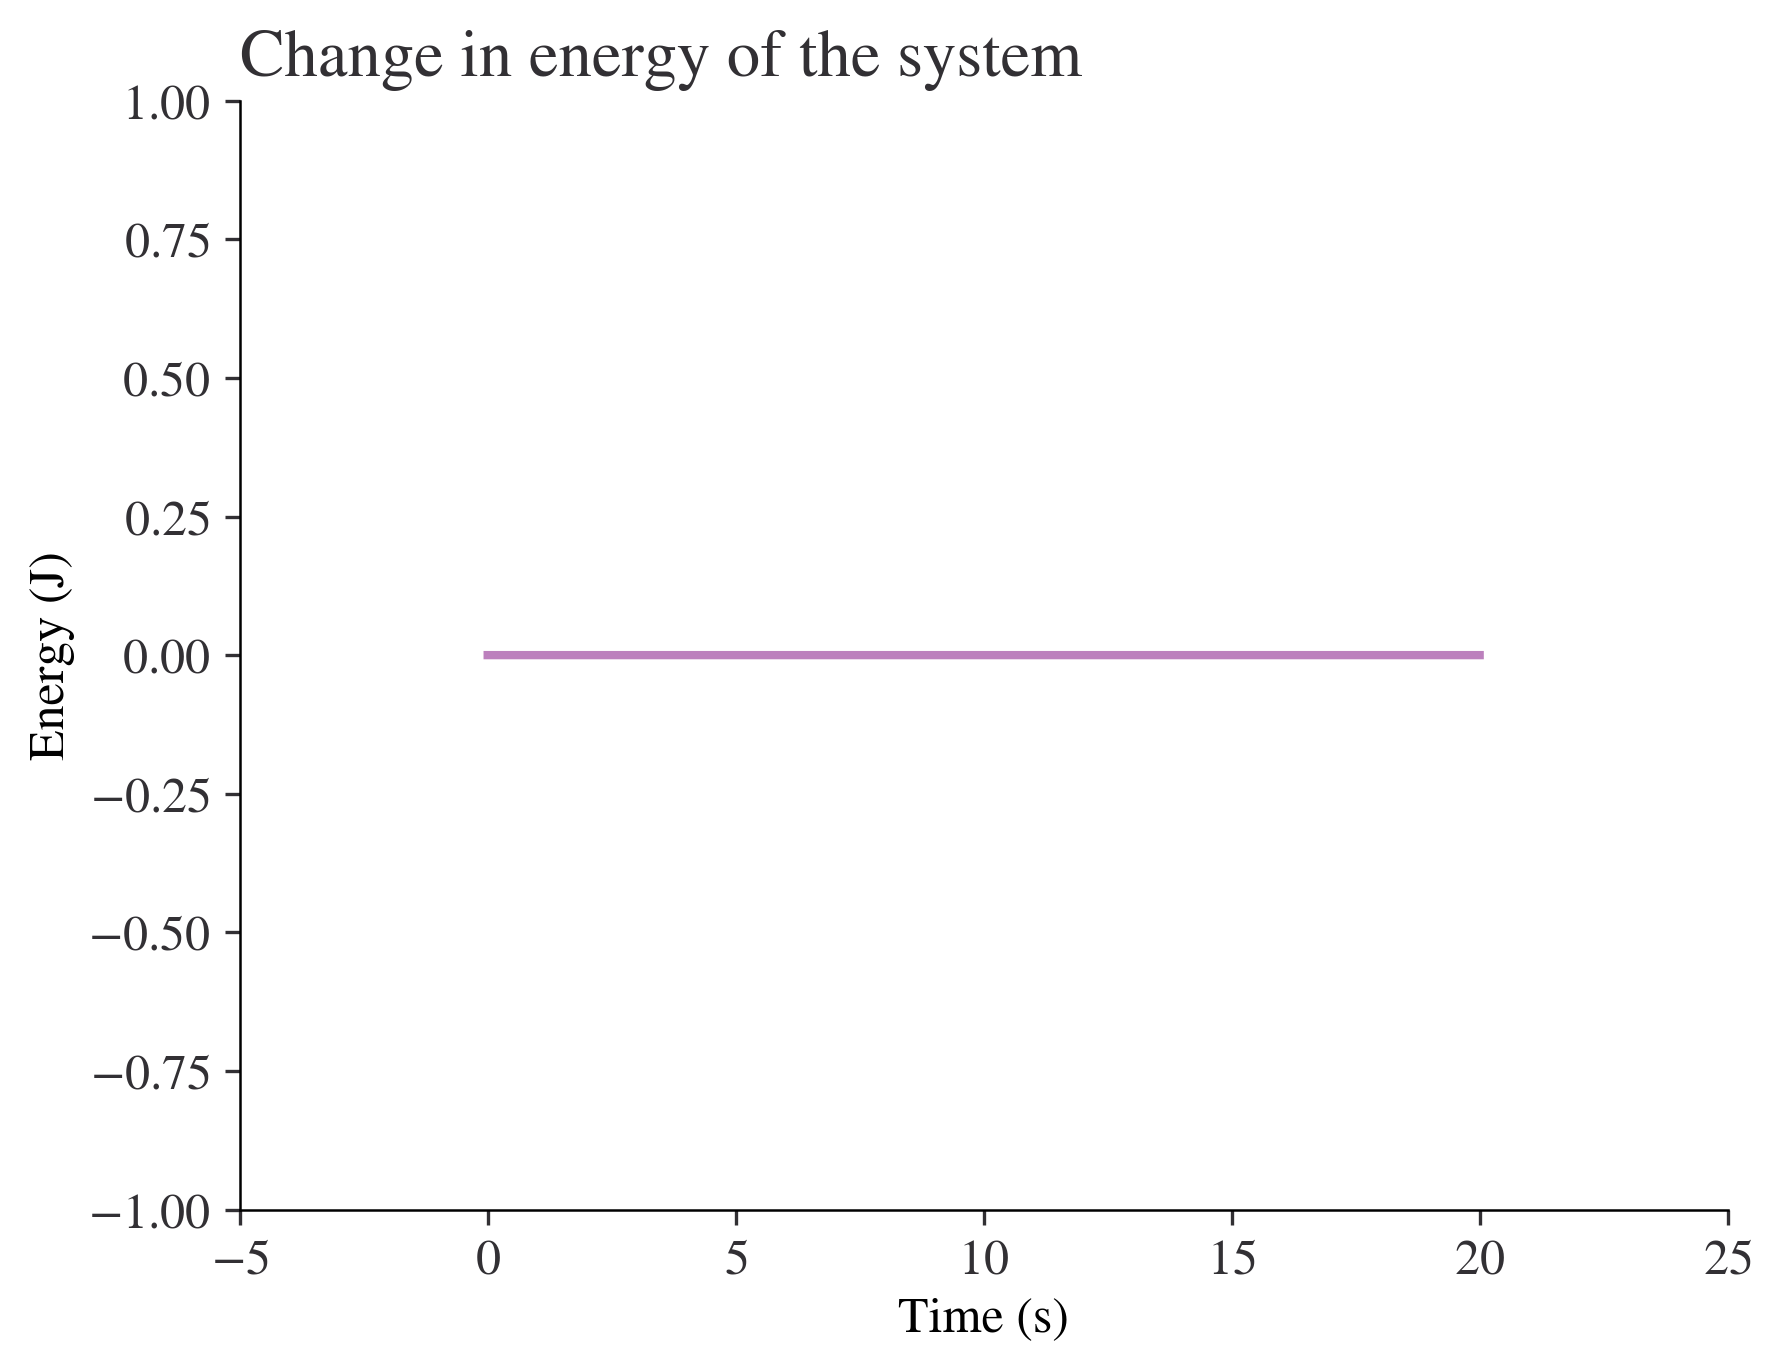

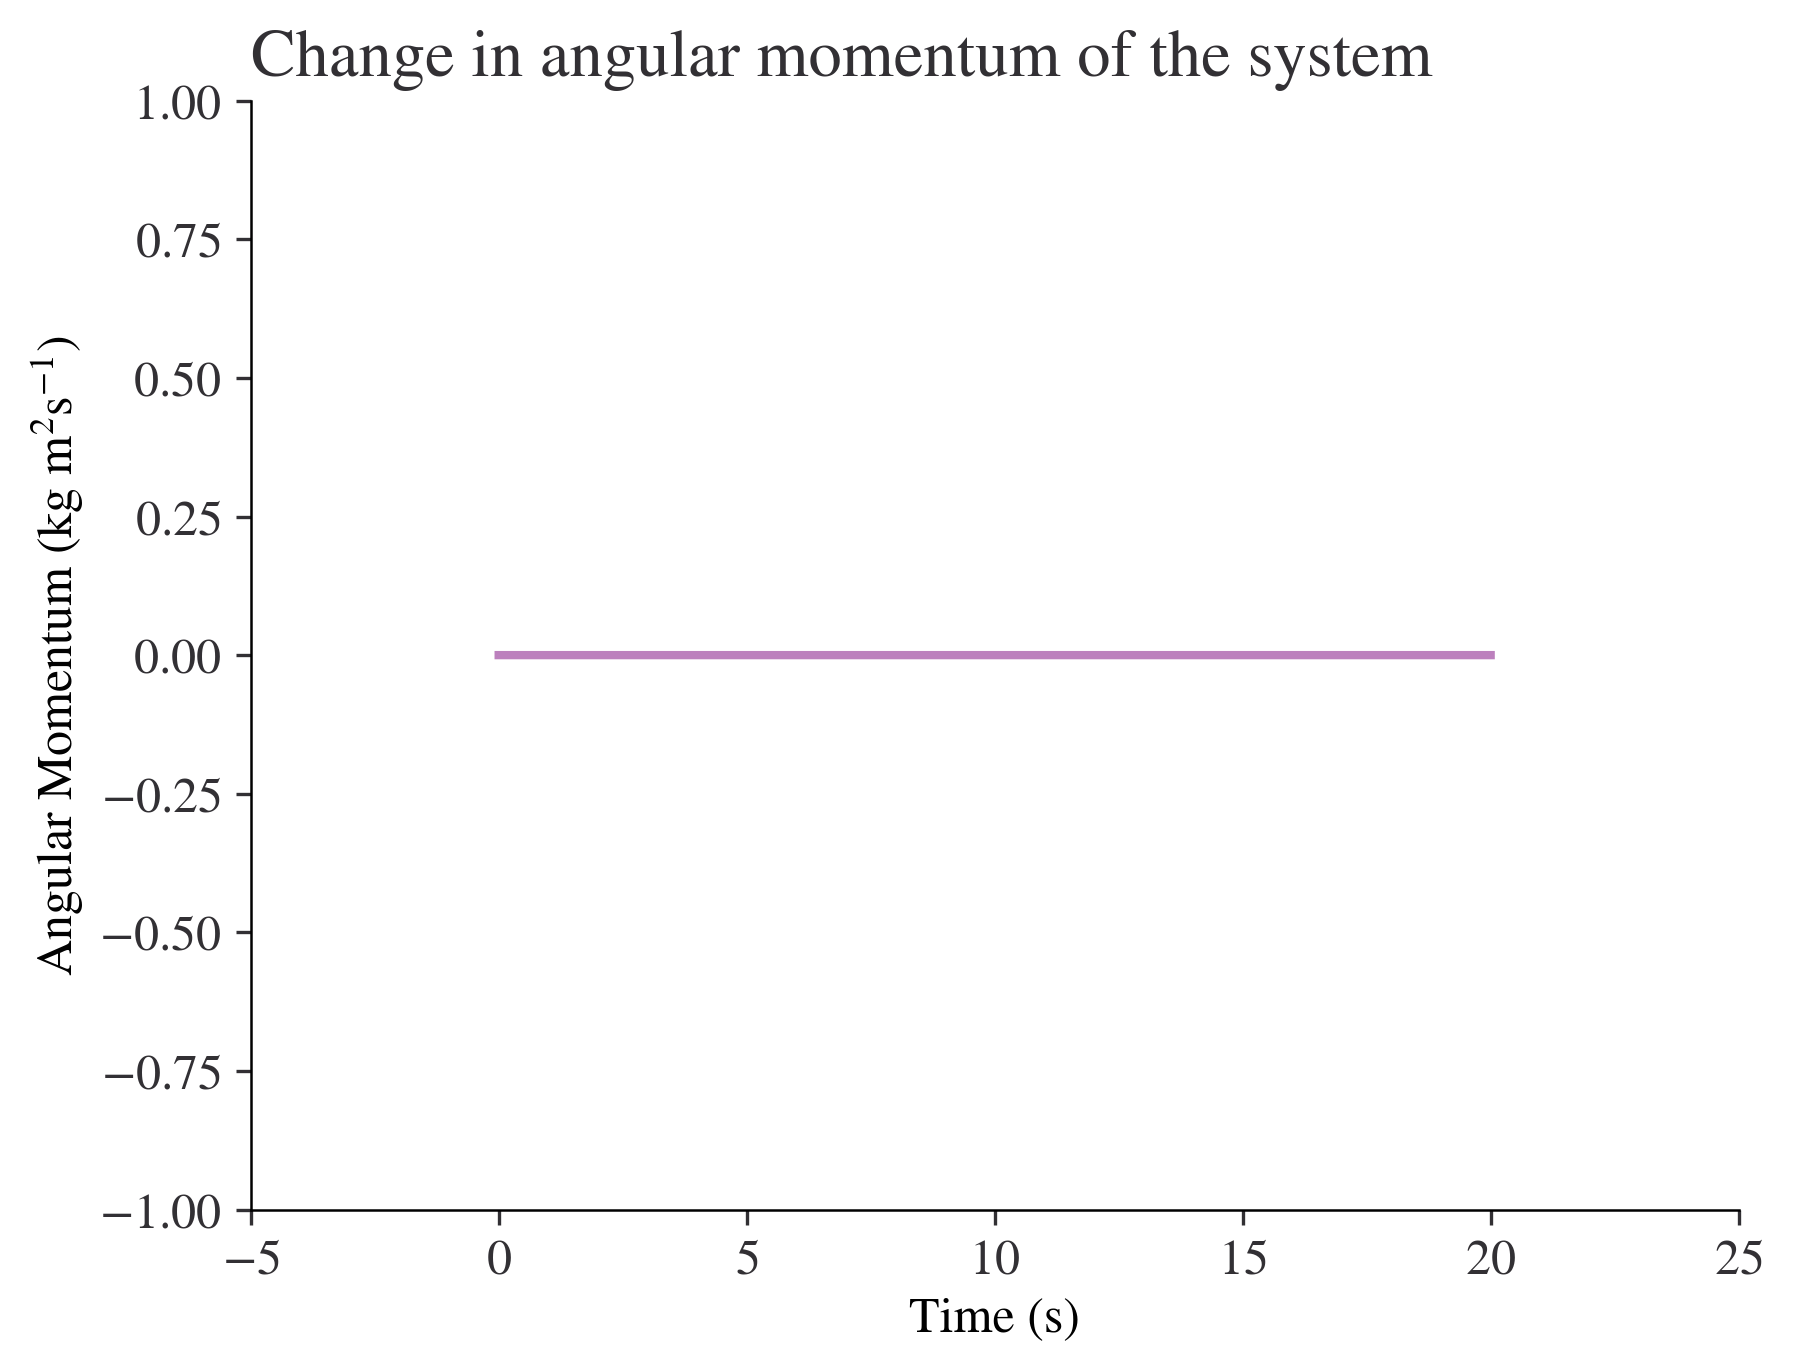

In [35]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of Earth: {np.linalg.norm(v2[0])}')
print(f'Final velocity of Earth: {np.linalg.norm(v2[-1])}')


e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

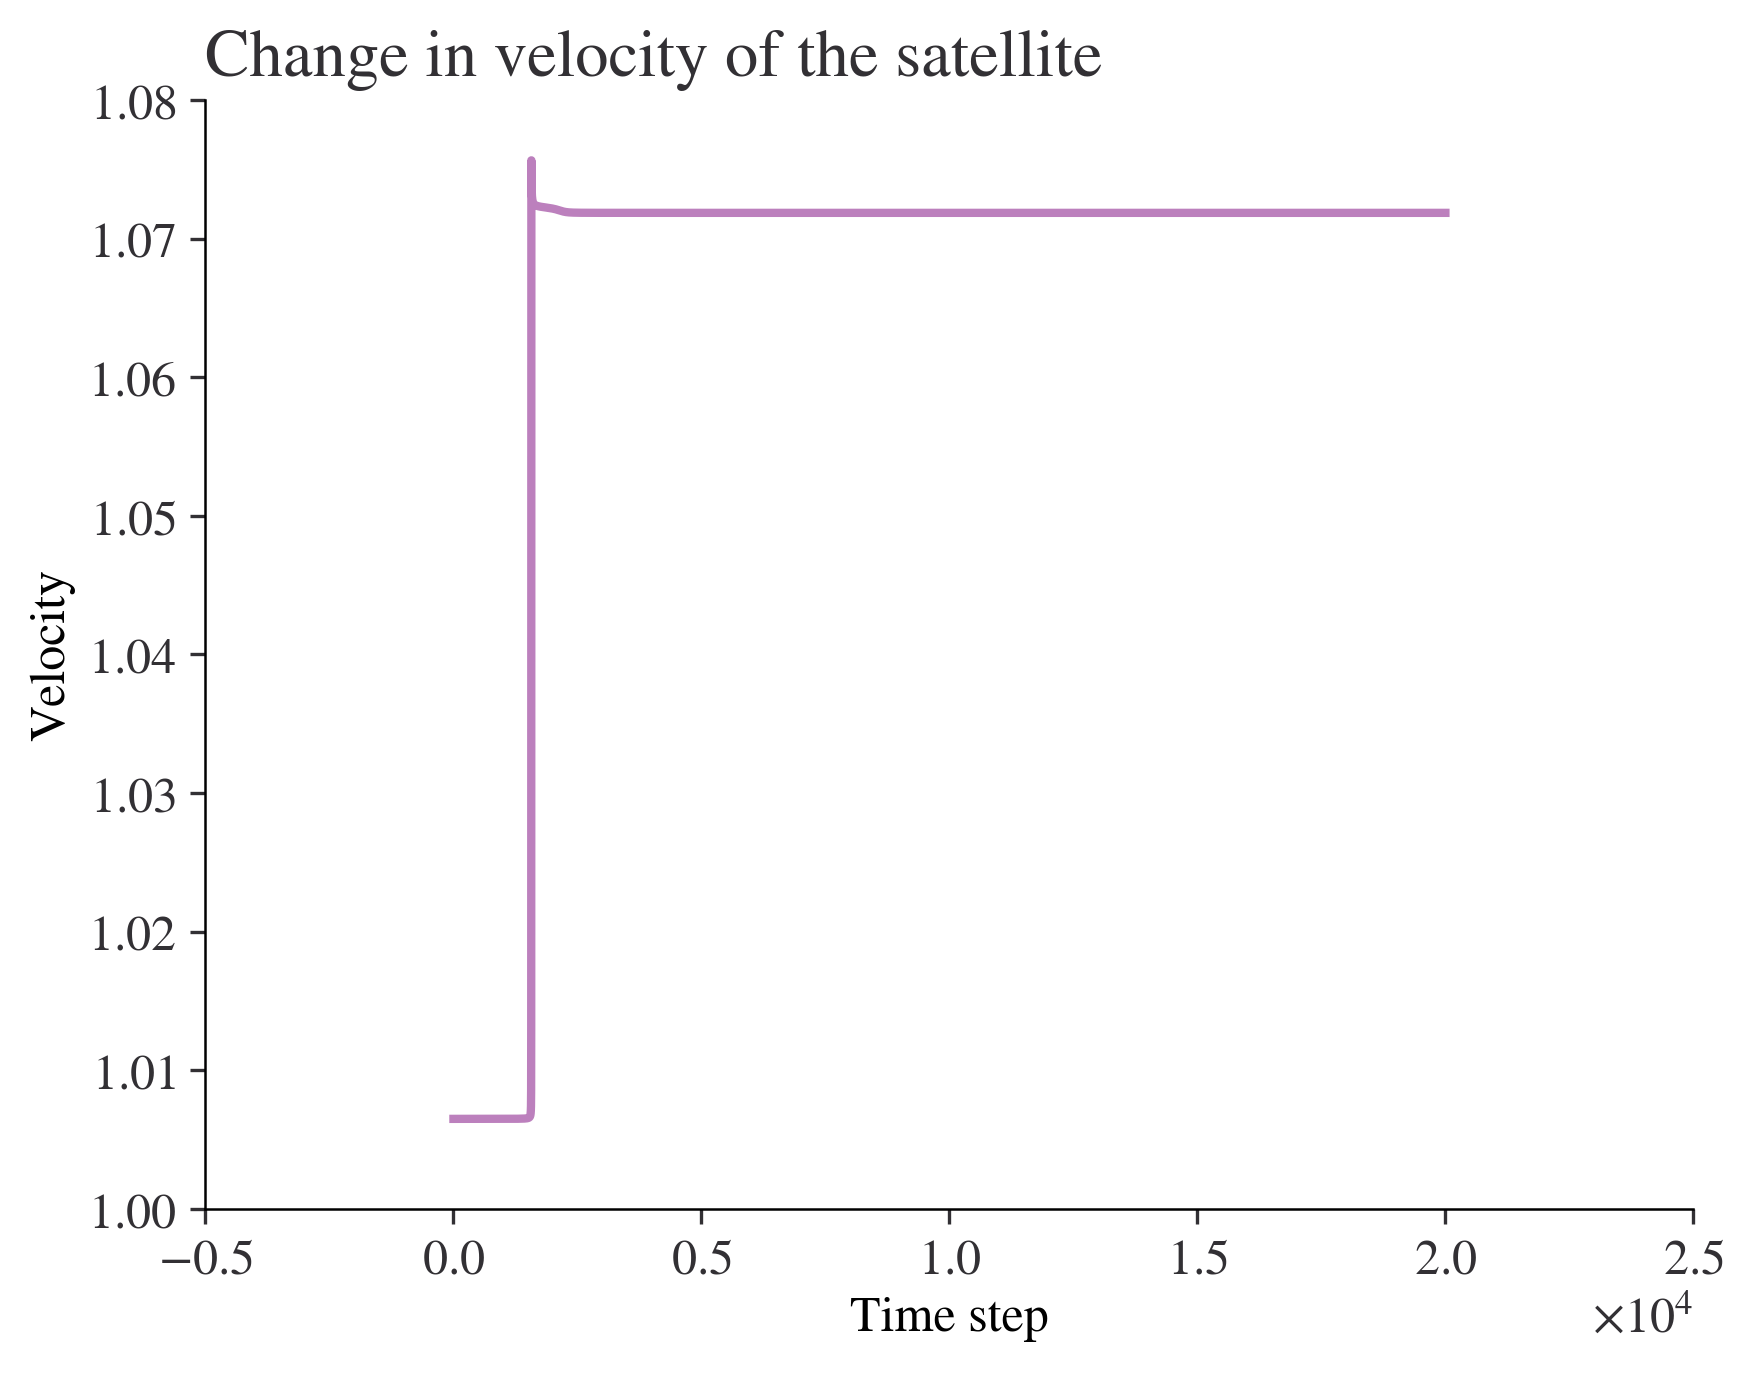

In [36]:
plt.plot(np.linalg.norm(v3,axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

v3_copy = np.copy(v3)

As can be seen from the above, there is an increase in the velocity of the satellite, and a slight decrease in the velocity of the planet. This alongside the calculations for initial and final energy also demonstrates that the conservation laws are obeyed for the most part, with a small error to the order of $10^{-10}$ that could be attributed to the limitations of the simulation. 
\
\
Now, I will attempt to do the same, but to set up the trajectory of the satellite so that it passes in front of instead of behind the planet. This, according to previous calculations, should decrease the velocity of the satellite and increase the velocity of the planet.

In [37]:
G = 1
m1 = 1
m2 = 3e-6
m3 = 1e-27
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.5, 1.5)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((1/1.57*(-0.0005-1.5), 
                  1/1.57*(1-1.5)))



In [38]:
for i in range(Nsteps-1):
    # Finding forces on masses at this timestep
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) #+ force(r3[i], r1[i], m3, m1)

    # Updating positions using velocity Verlet
    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    collision_checker(r2, r3)

    # Finding forces at new timestep 
    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) #+ force(r3[i+1], r1[i+1], m3, m1)

    # Updating velocities using velocity Verlet
    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



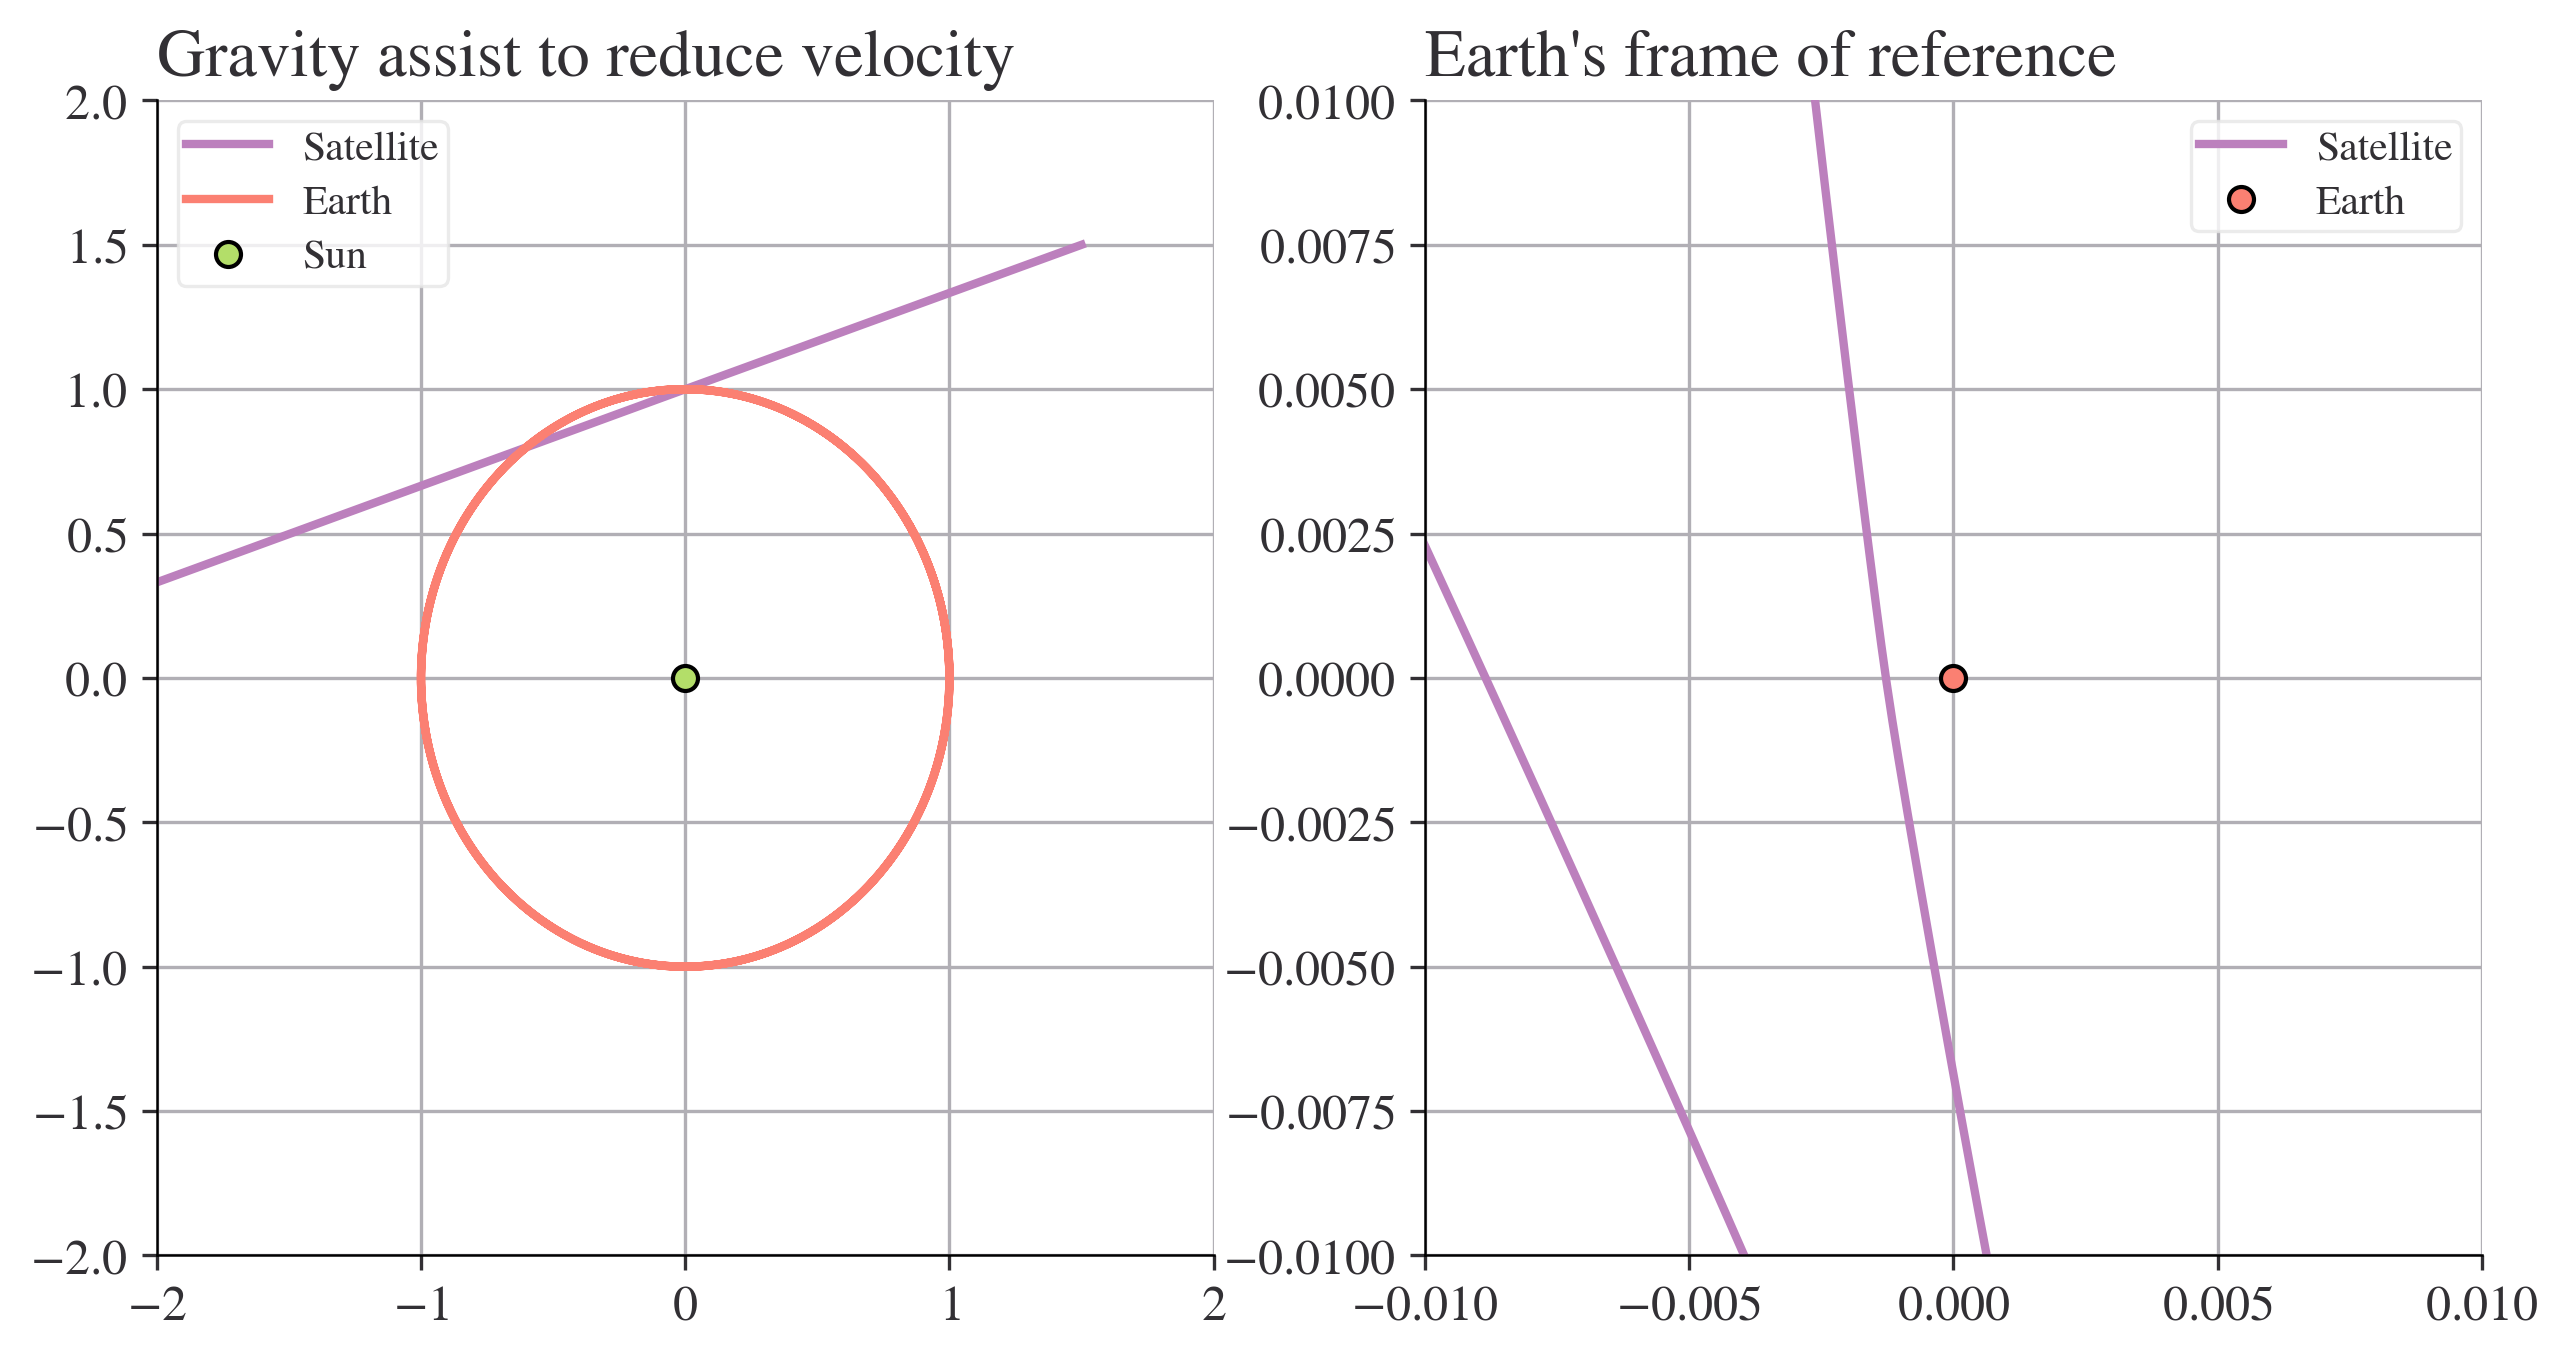

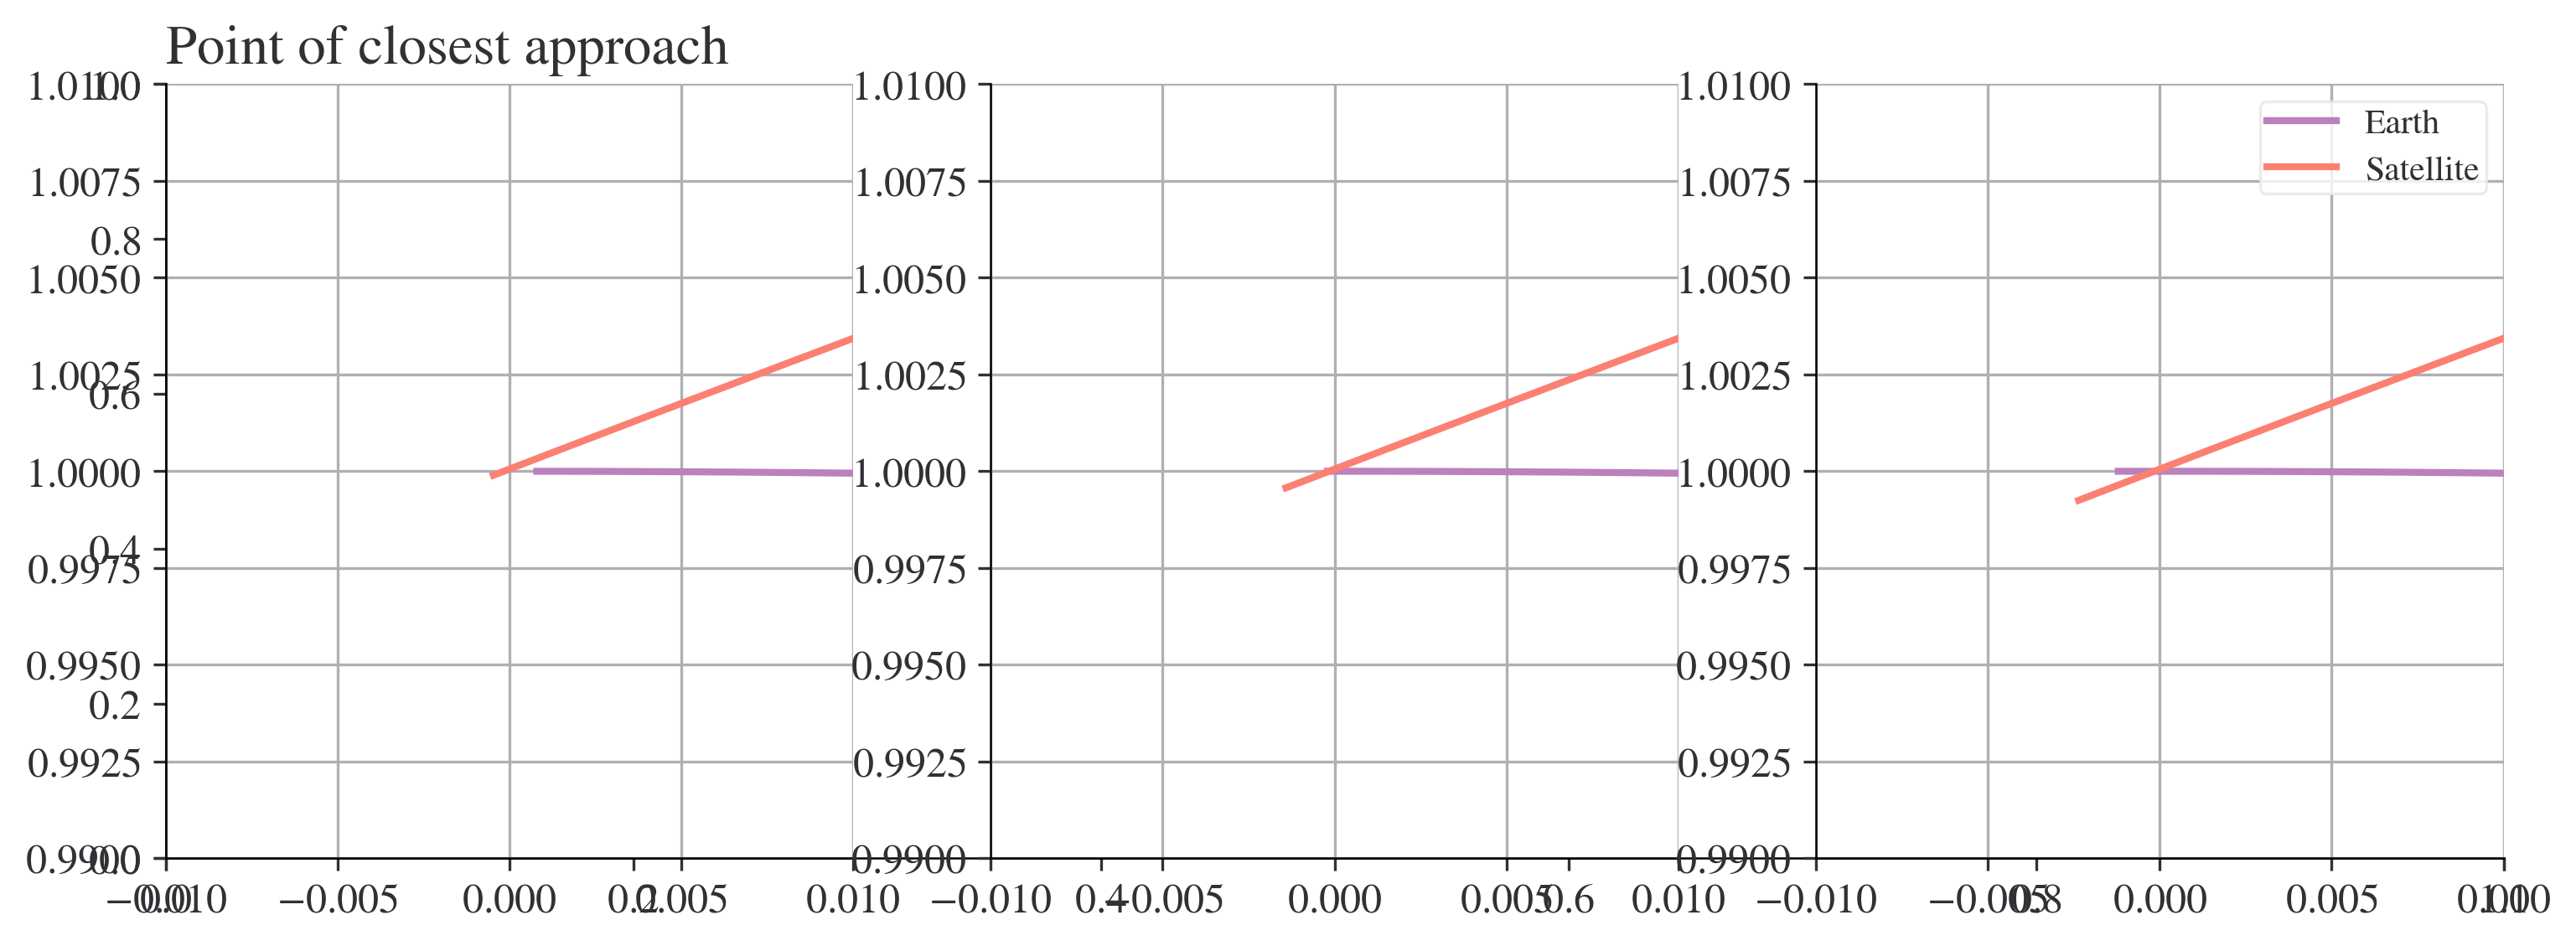

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist to reduce velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Earth')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Earth\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.01, 0.01)
ax2.set_ylim(-0.01, 0.01)
ax2.plot(0,0,'o',label='Earth')
ax2.grid()
ax2.legend()

fig.savefig('earth_decrease1.png')

simend = 1570
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + 1*i,0], r2[:simend + 1*i,1], label='Earth')
    ax.plot(r3[:simend + 1*i,0], r3[:simend + 1*i,1], label='Satellite')
    ax.set_xlim(-0.01, 0.01)
    ax.set_ylim(0.99, 1.01)
    ax.grid()
plt.legend()


Initial velocity of planet 3: 1.0073969297048013
Final velocity of planet 3: 0.990690232880136
Initial velocity of planet 2: 1.0
Final velocity of planet 2: 0.9999998522490997
Point of closest approach: 0.001264688143906504


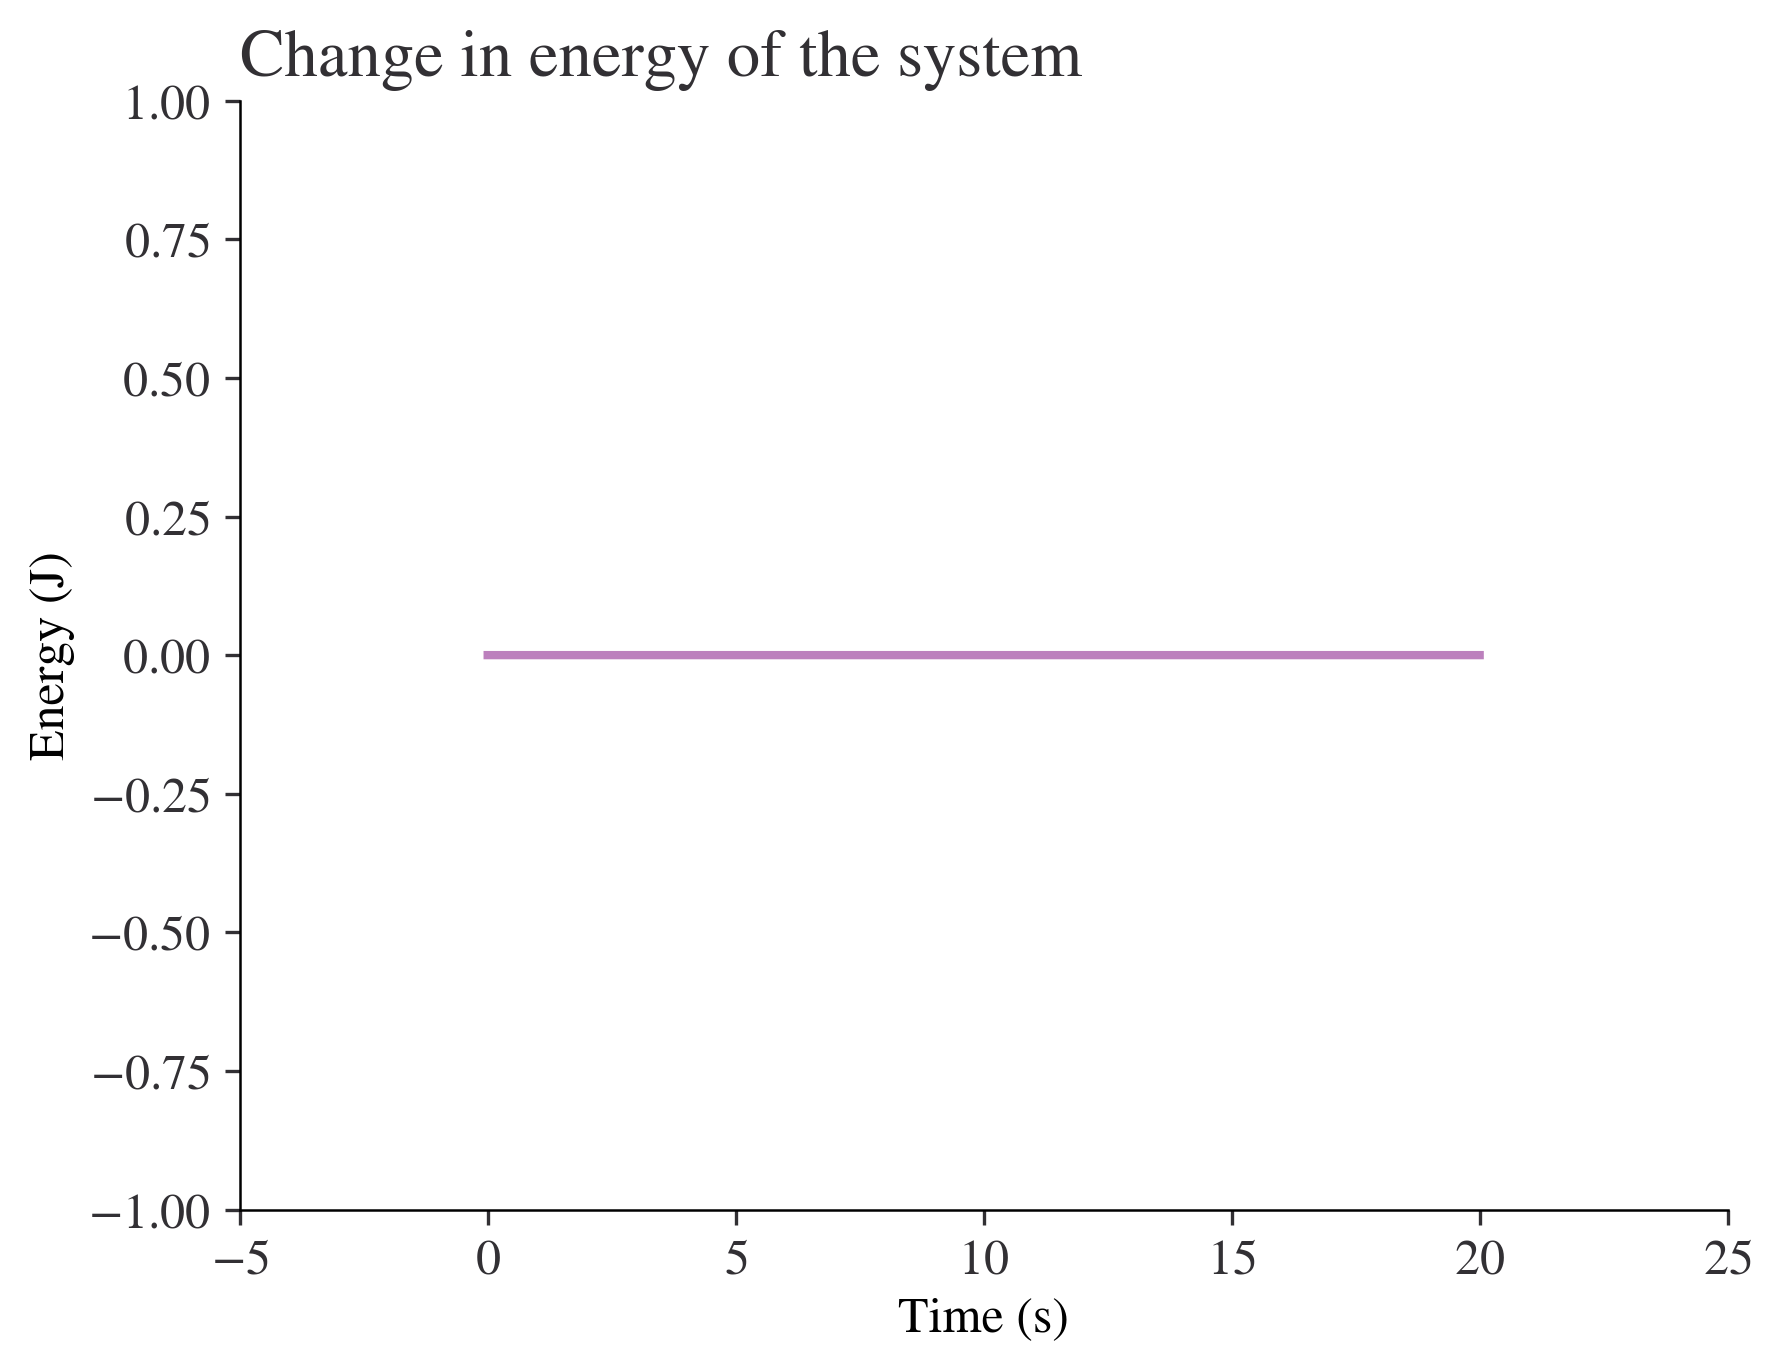

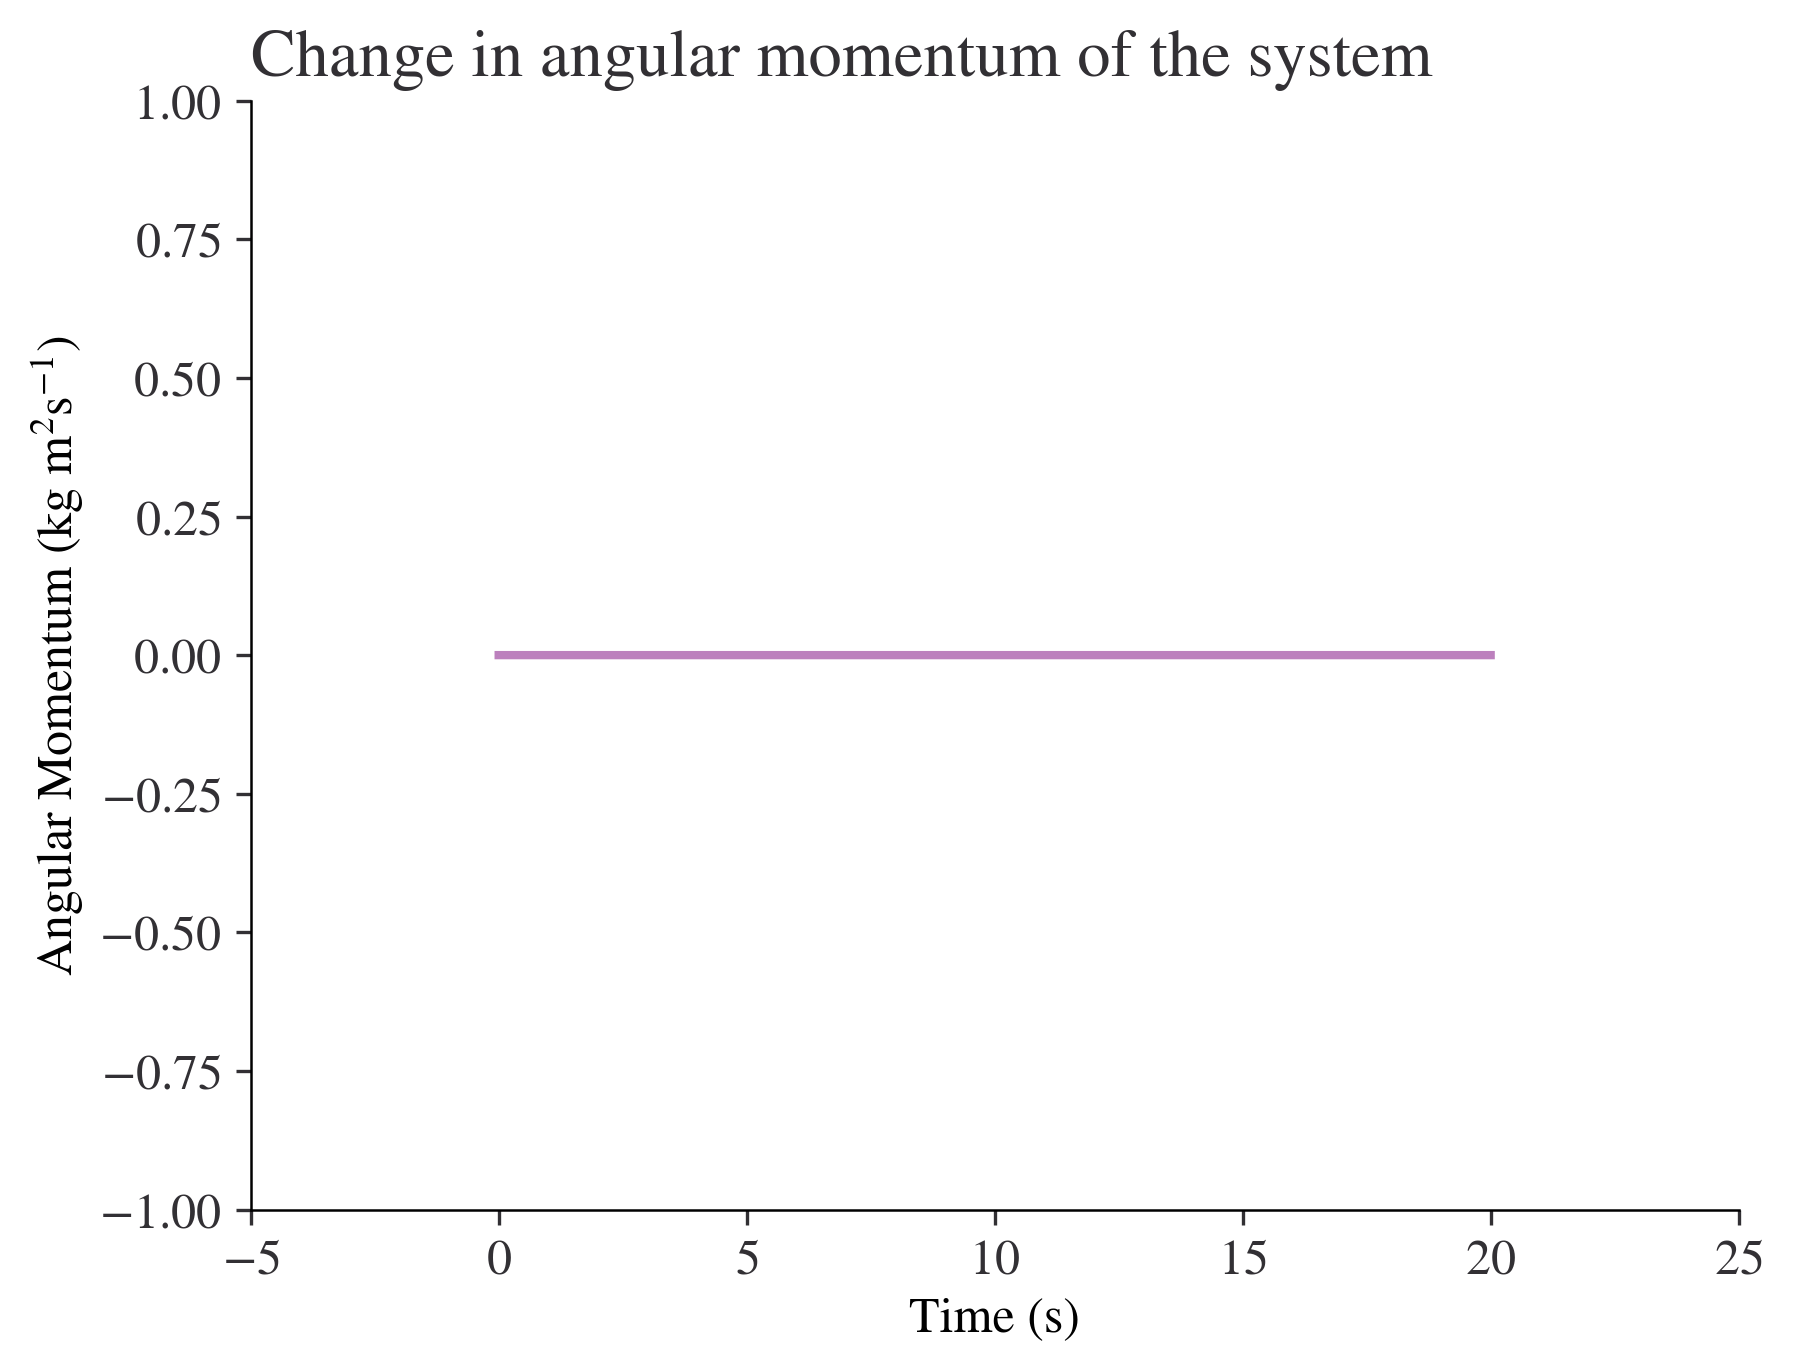

In [40]:
print(f'Initial velocity of planet 3: {np.linalg.norm(v3[0])}')
print(f'Final velocity of planet 3: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of planet 2: {np.linalg.norm(v2[0])}')
print(f'Final velocity of planet 2: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

"fig1 = plt.figure(figsize=(10,5))\nax1 = fig1.add_subplot(1,2,1)\nax1.plot(np.linalg.norm(v3,axis=1))\nax1.set_xlabel('Time step')\nax1.set_ylabel('Velocity')\n\nax1 = fig1.add_subplot(1,2,2)\nax1.plot(np.linalg.norm(v3_copy,axis=1))\nax1.set_xlabel('Time step')\nax1.set_ylabel('Velocity')\nfig1.suptitle('Changes in velocity')\n\nfig1.savefig('earth_velocity_change1.png')"

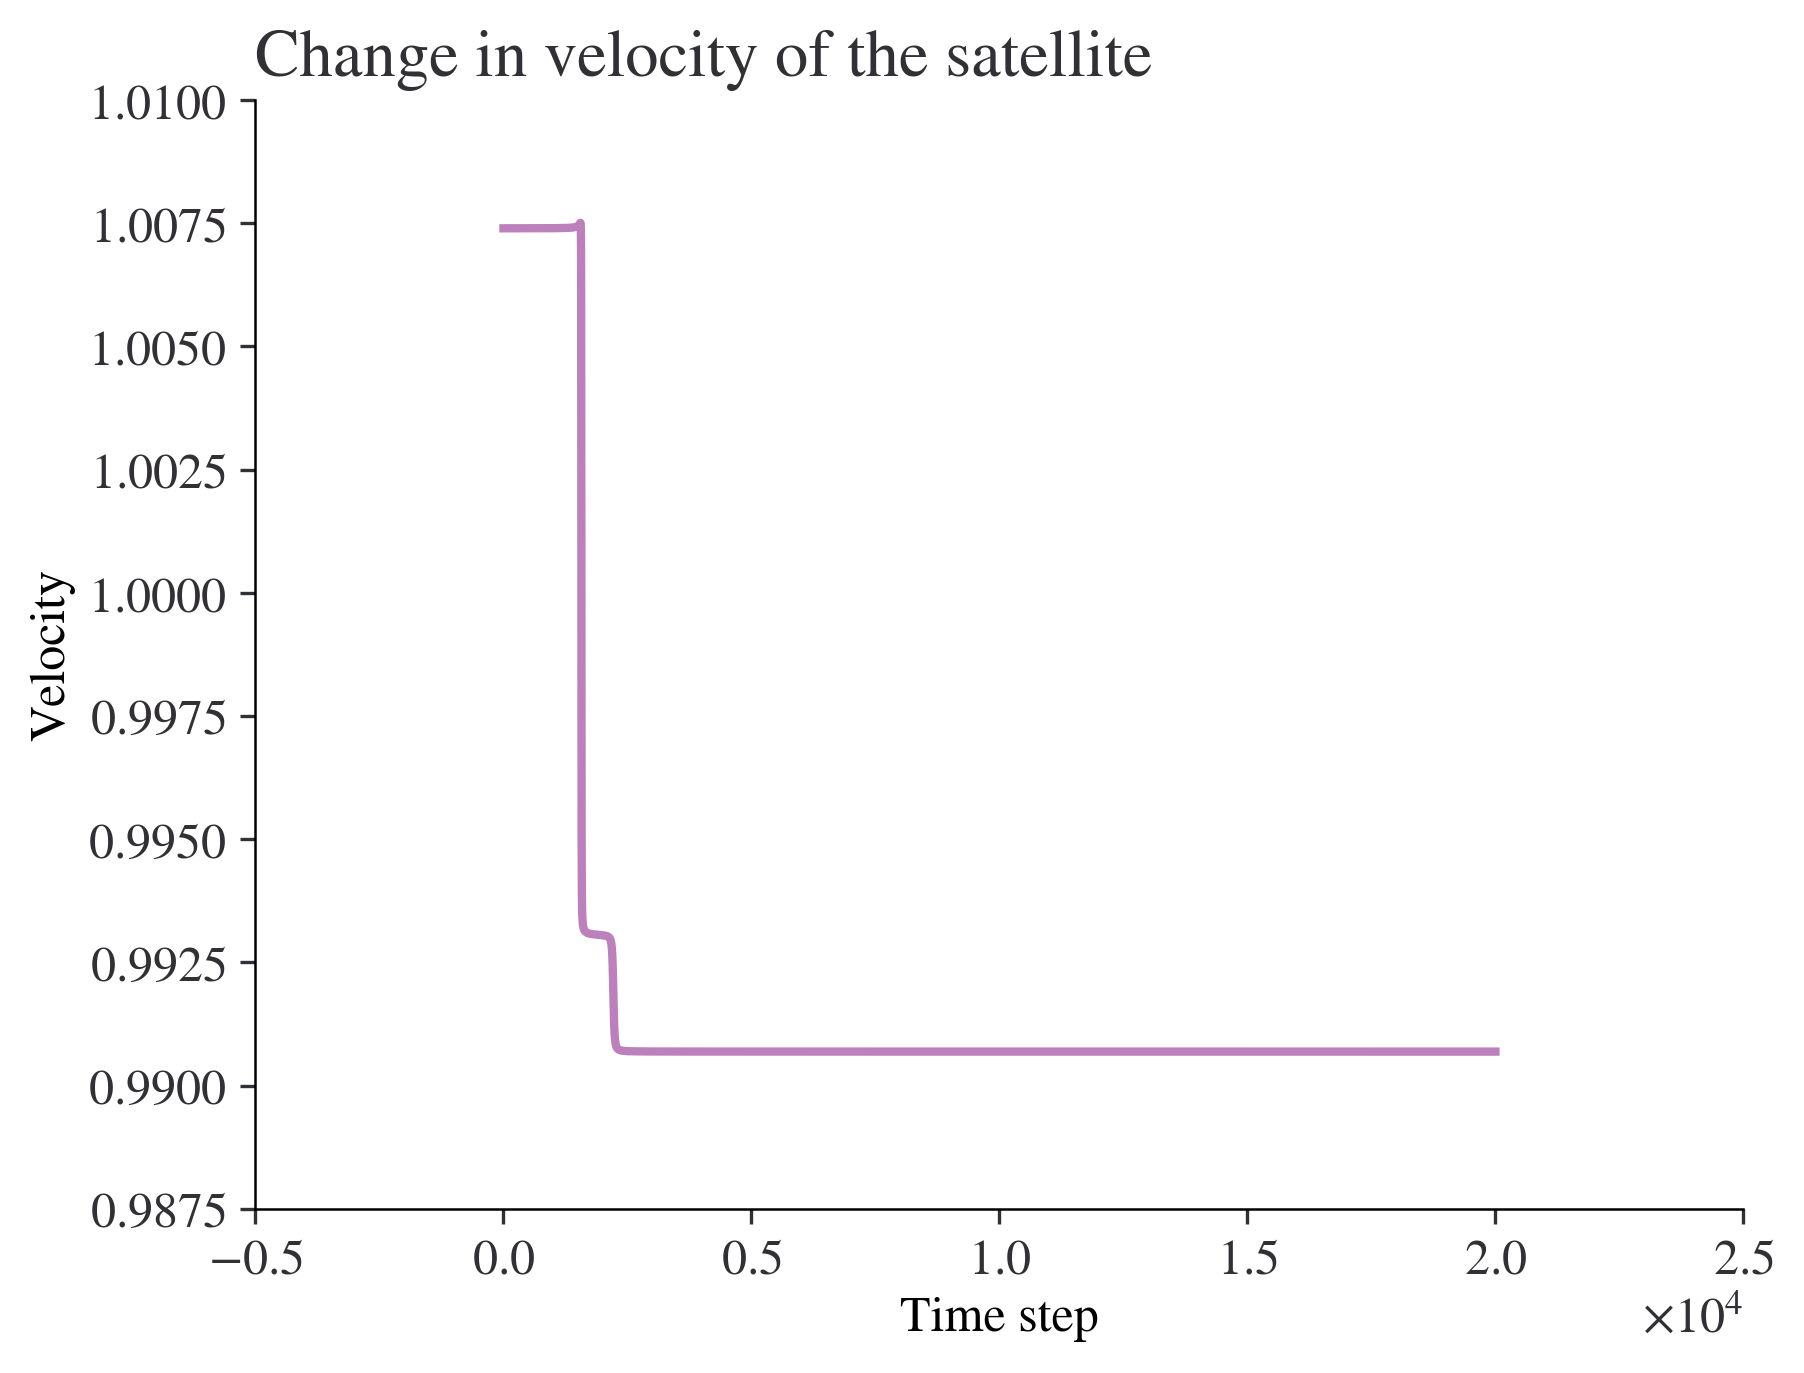

In [41]:
plt.plot(np.linalg.norm(v3,axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

'''fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(1,2,1)
ax1.plot(np.linalg.norm(v3,axis=1))
ax1.set_xlabel('Time step')
ax1.set_ylabel('Velocity')

ax1 = fig1.add_subplot(1,2,2)
ax1.plot(np.linalg.norm(v3_copy,axis=1))
ax1.set_xlabel('Time step')
ax1.set_ylabel('Velocity')
fig1.suptitle('Changes in velocity')

fig1.savefig('earth_velocity_change1.png')'''

Like the case previously, we see a slight decrease in velocity of the satellite, as measured in the frame of reference of the Sun.

# Attempting a large slingshot with a larger mass
Continuing from here, we can set up a better-scaled model which can achieve some a more extreme velocity change. As opposed to considering a system comprised of Earth and the Sun, we will now explore one of Jupiter and the Sun. Upon constructing this two-body system, we will explore the motion of another satellite into the gravitational field of Jupiter. For the sake of ease, we will use the same initial conditions as previously to assist in performing calculations, as well as the same initial position of the satellite in the system. The tolerance in the `collision_checker` function will be adjusted to match the fraction of Jupiter's radius to the distance from Jupiter to the Sun ($\approx 9 \times 10^{-5}$).

In [42]:
def collision_checker(r1, r2):
    '''
    A function to check to see if two objects have collided.
    The tolerance was chosen based on earlier calculations

    Inputs:
    r1, r2   Positions of the two bodies
    '''
    if np.linalg.norm(r1 - r2) <= 9e-5:
        print('Collision!')

In [43]:
G = 1
m1 = 1
m2 = 1e-3
m3 = 1e-27
Ndim = 2     
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

r2[0] = np.array((1.0, 0))
r3[0] = np.array((1.5, 1.5)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((1/1.57*(-1.5), 
                  1/1.57*(1-1.5)))

In [44]:
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) #+ force(r3[i], r1[i], m3, m1)

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    collision_checker(r2[i], r3[i])

    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) #+ force(r3[i+1], r1[i+1], m3, m1)

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



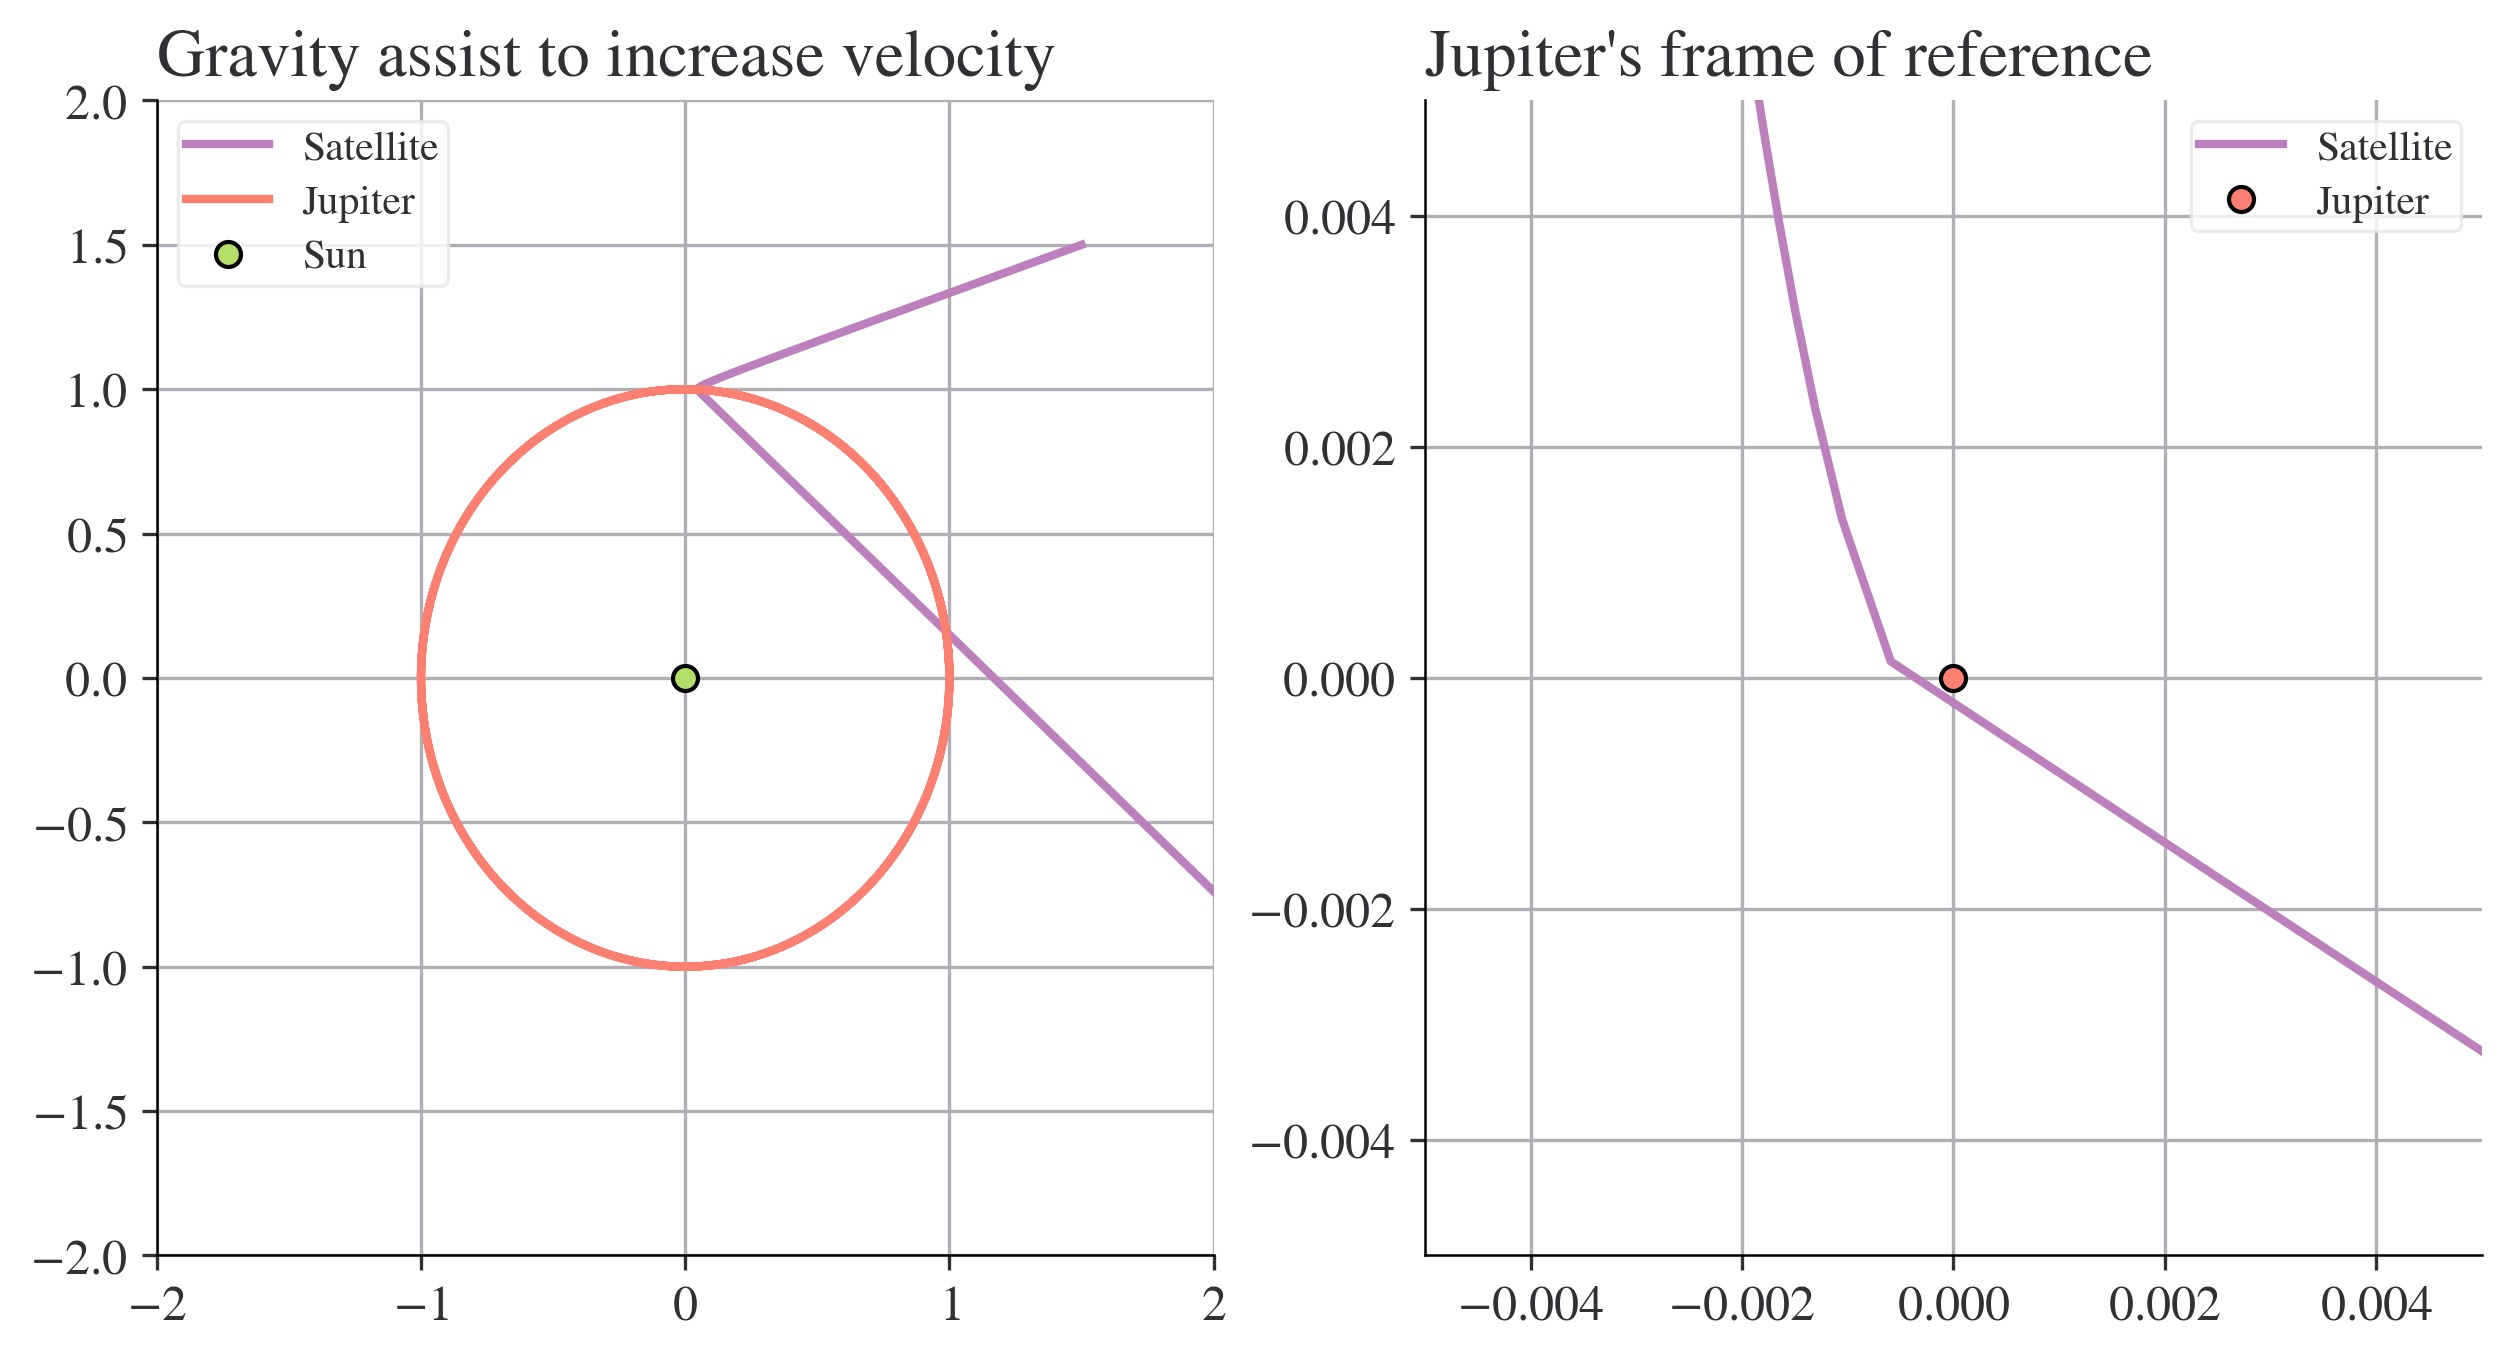

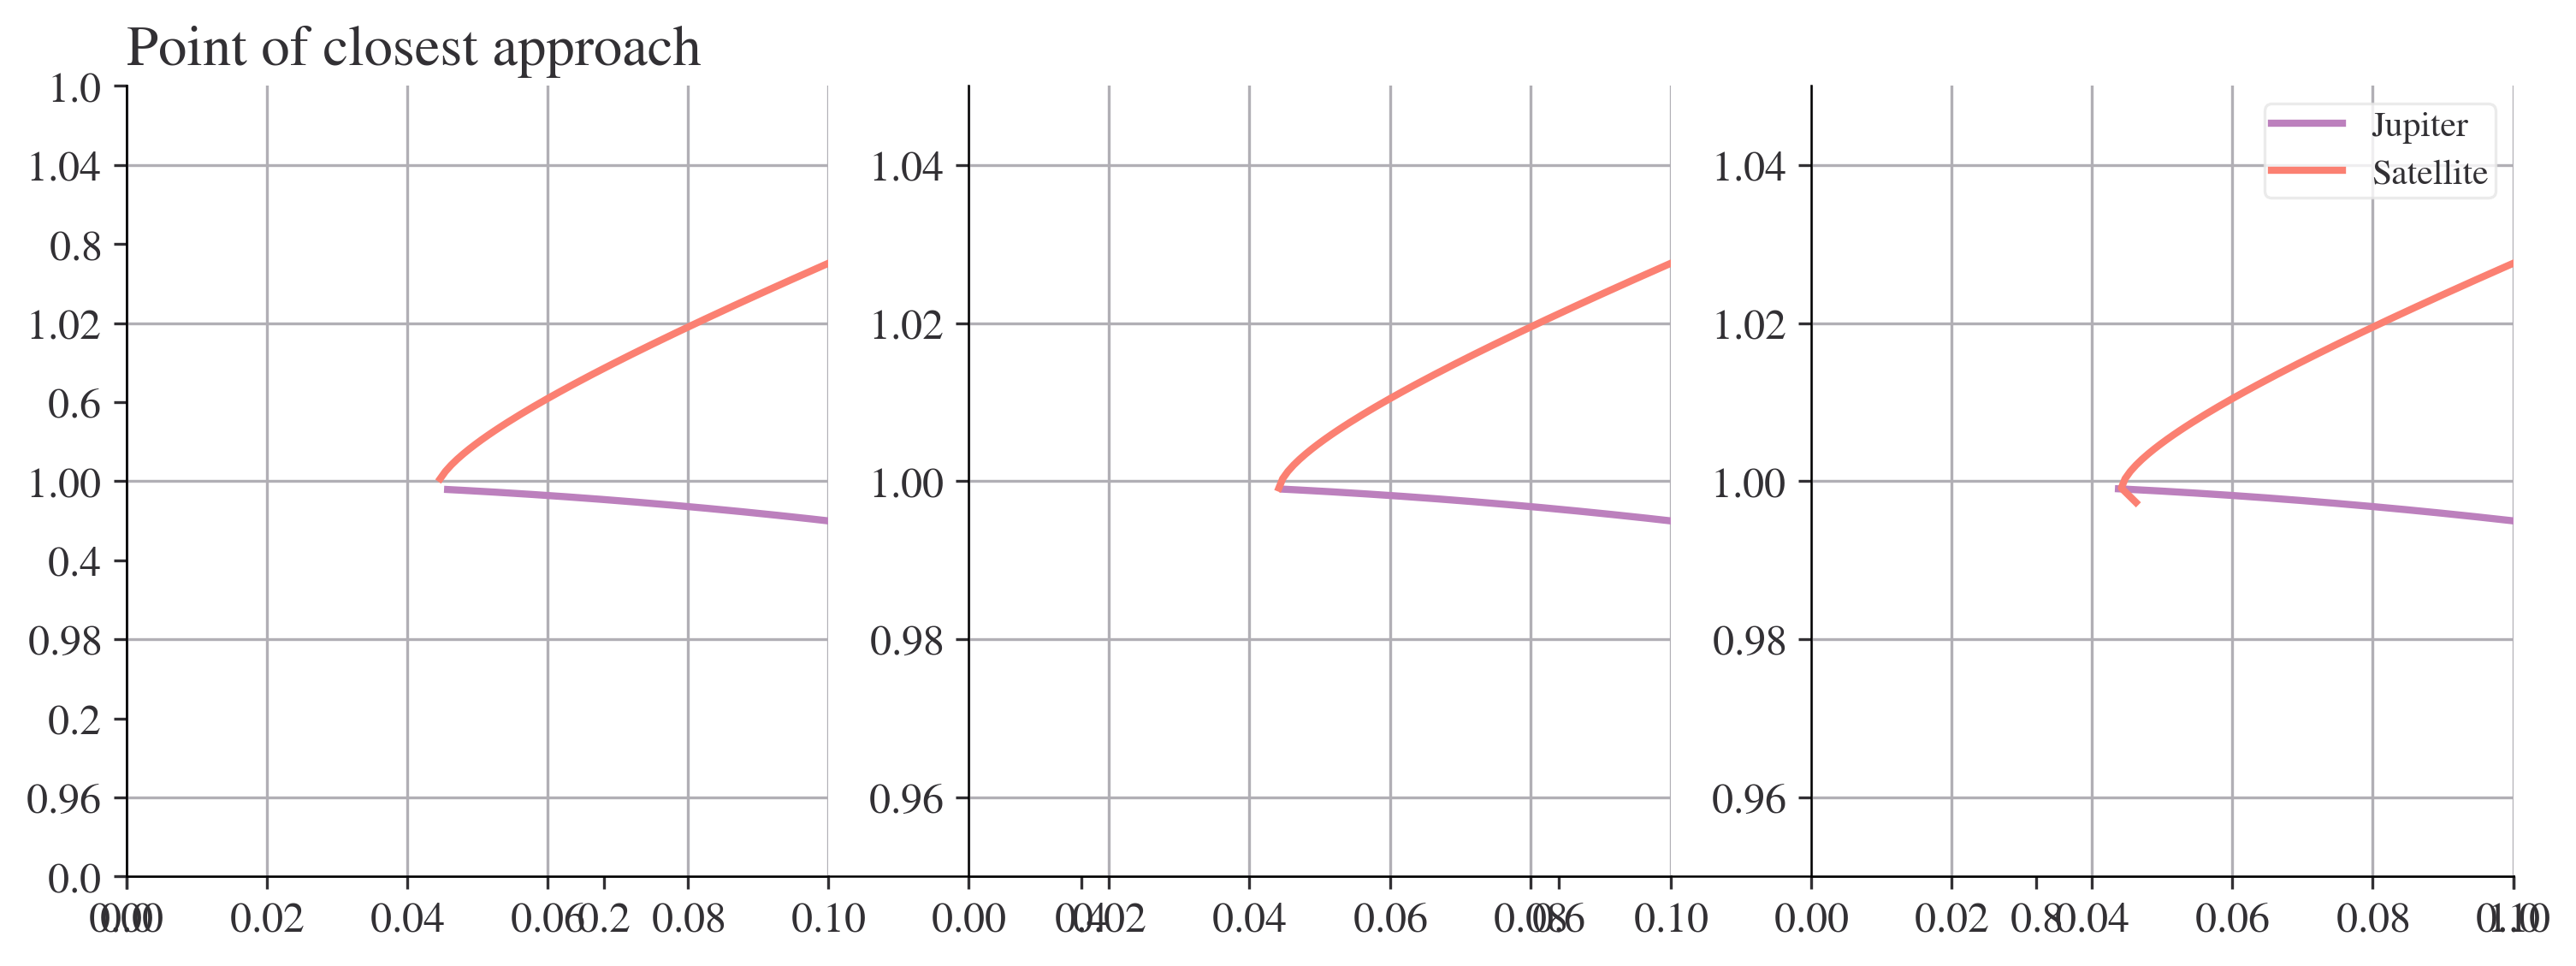

In [45]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist to increase velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.005, 0.005)
ax2.set_ylim(-0.005, 0.005)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()


simend = 1525
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + 1*i,0], r2[:simend + 1*i,1], label='Jupiter')
    ax.plot(r3[:simend + 1*i,0], r3[:simend + 1*i,1], label='Satellite')
    ax.set_xlim(0,0.1)
    ax.set_ylim(0.95, 1.05)
    ax.grid()
plt.legend()


Initial velocity of satellite: 1.0070947962319678
Final velocity of satellite: 2.592455377016387
Initial velocity of Jupiter: 1.0
Final velocity of Jupiter: 0.9999998522491199
Point of closest approach: 0.000609534962930454


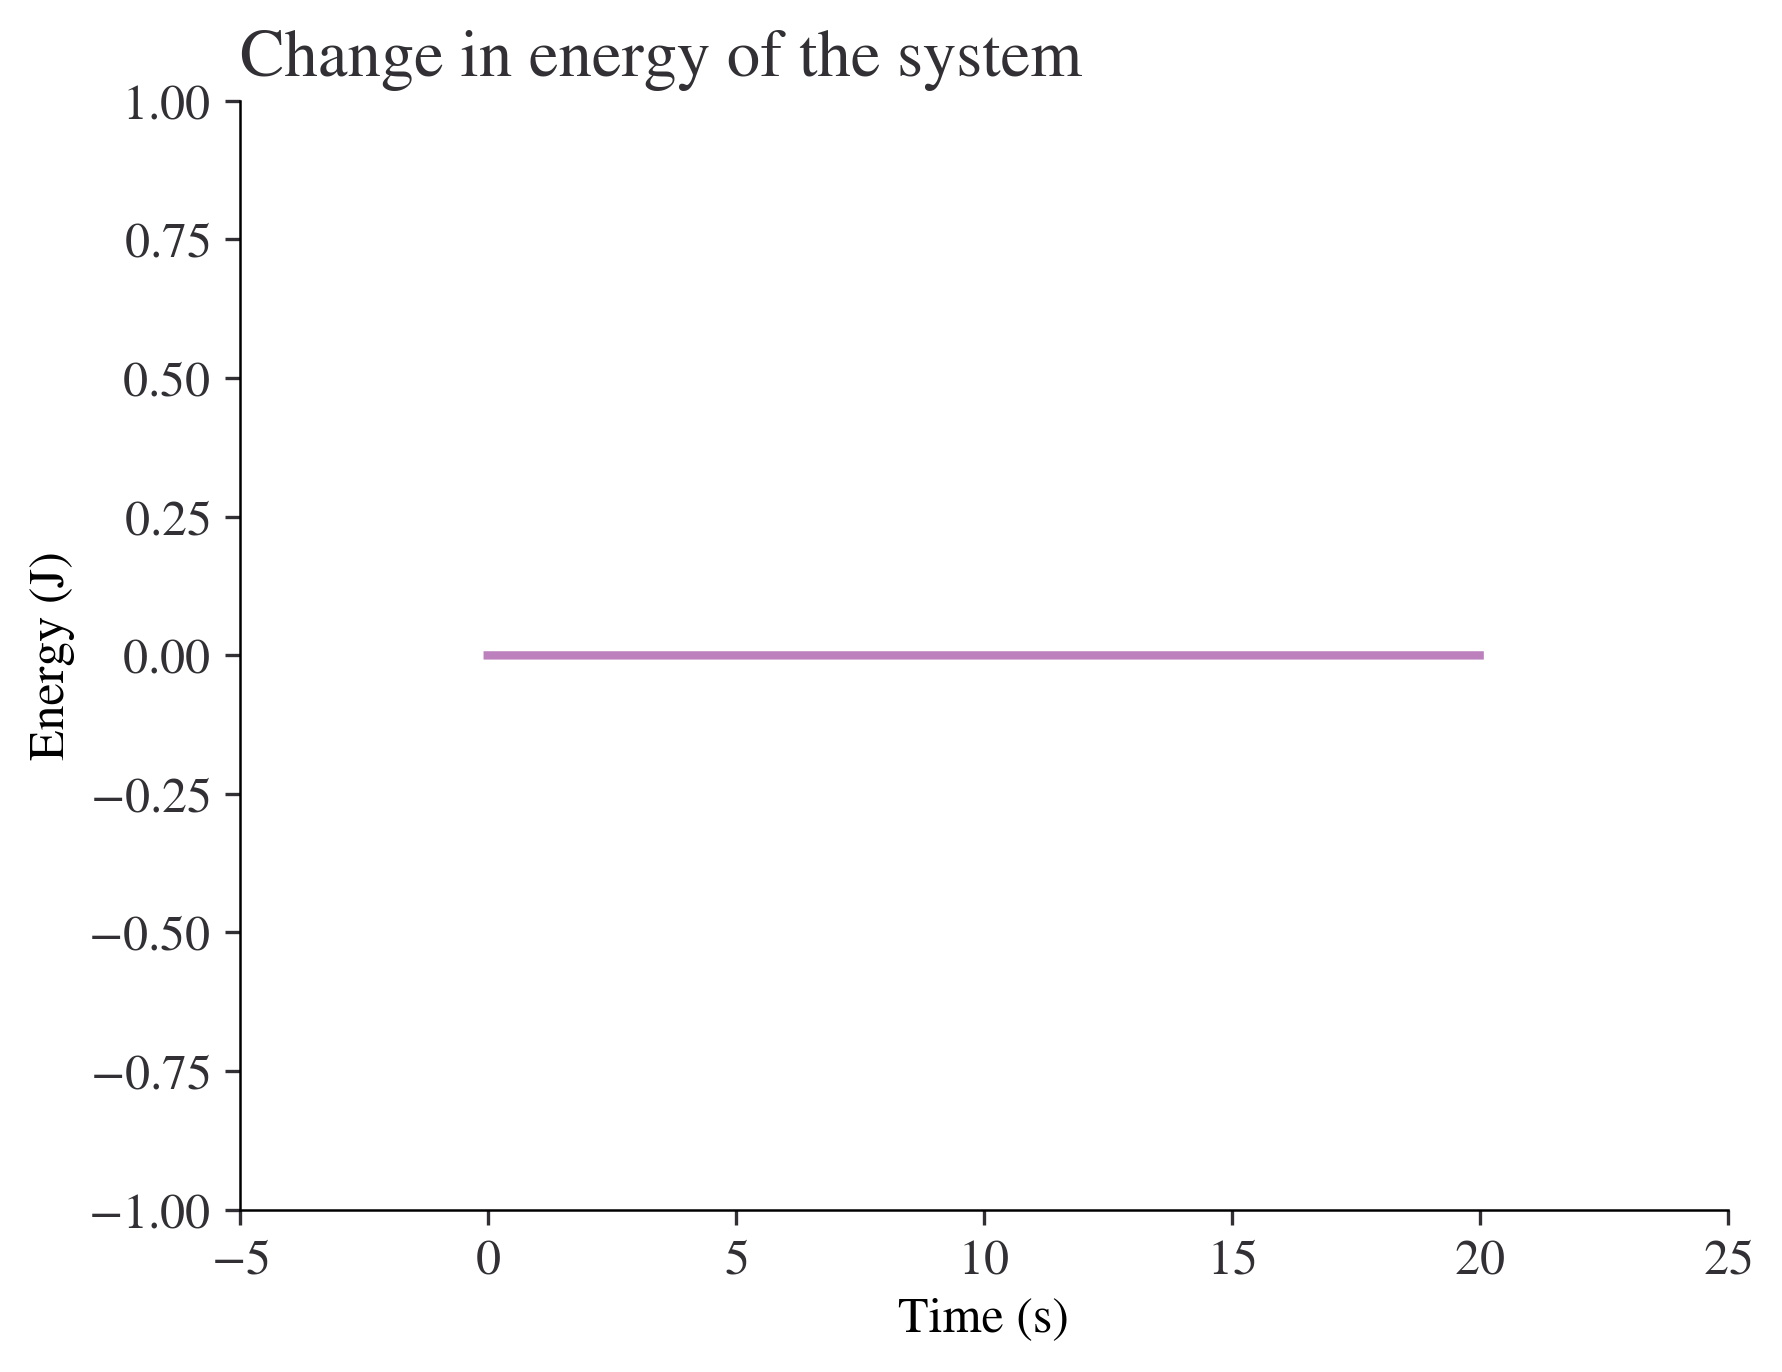

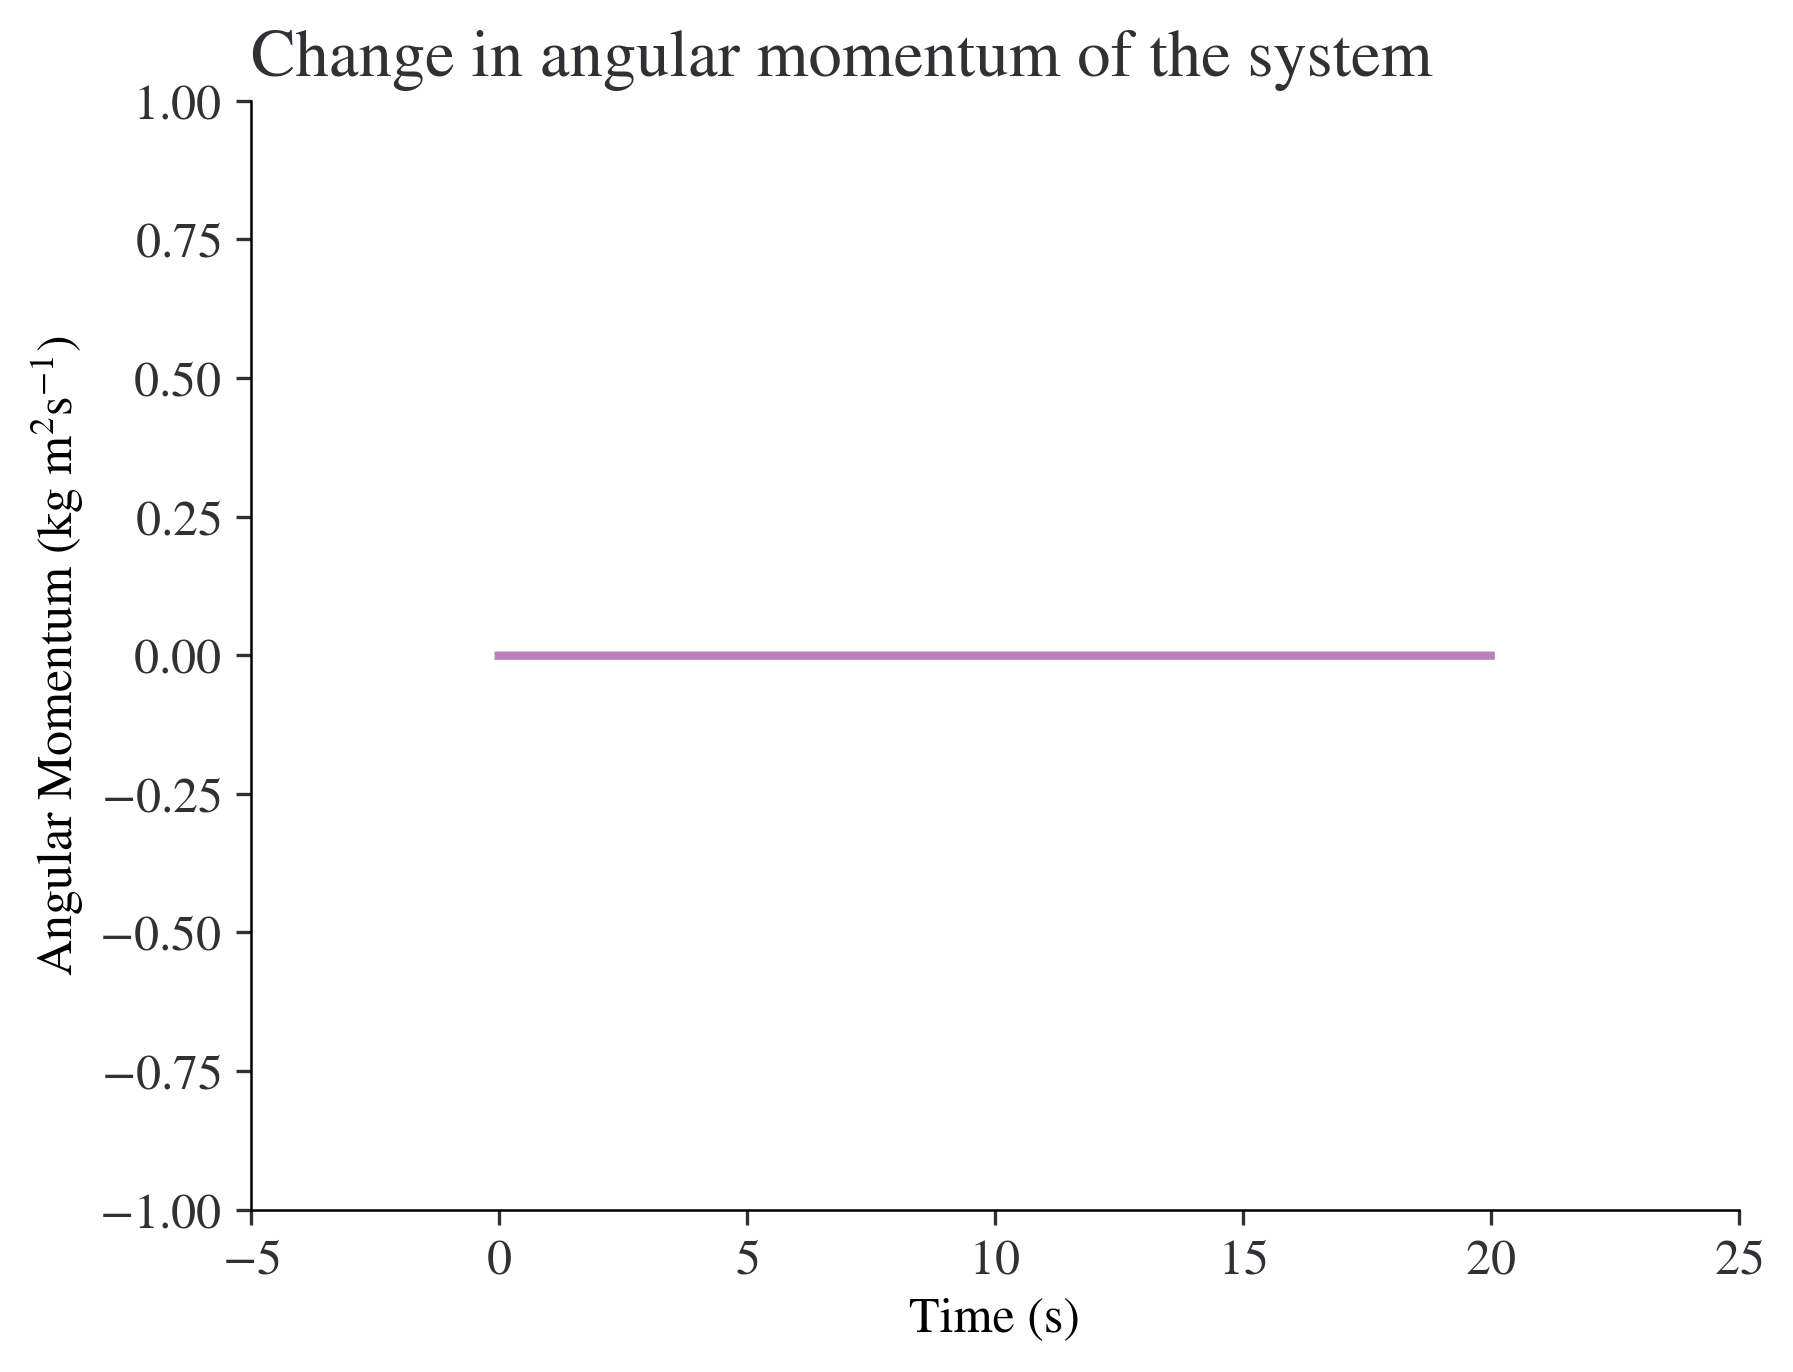

In [46]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of Jupiter: {np.linalg.norm(v2[0])}')
print(f'Final velocity of Jupiter: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

Text(0, 0.5, 'Velocity')

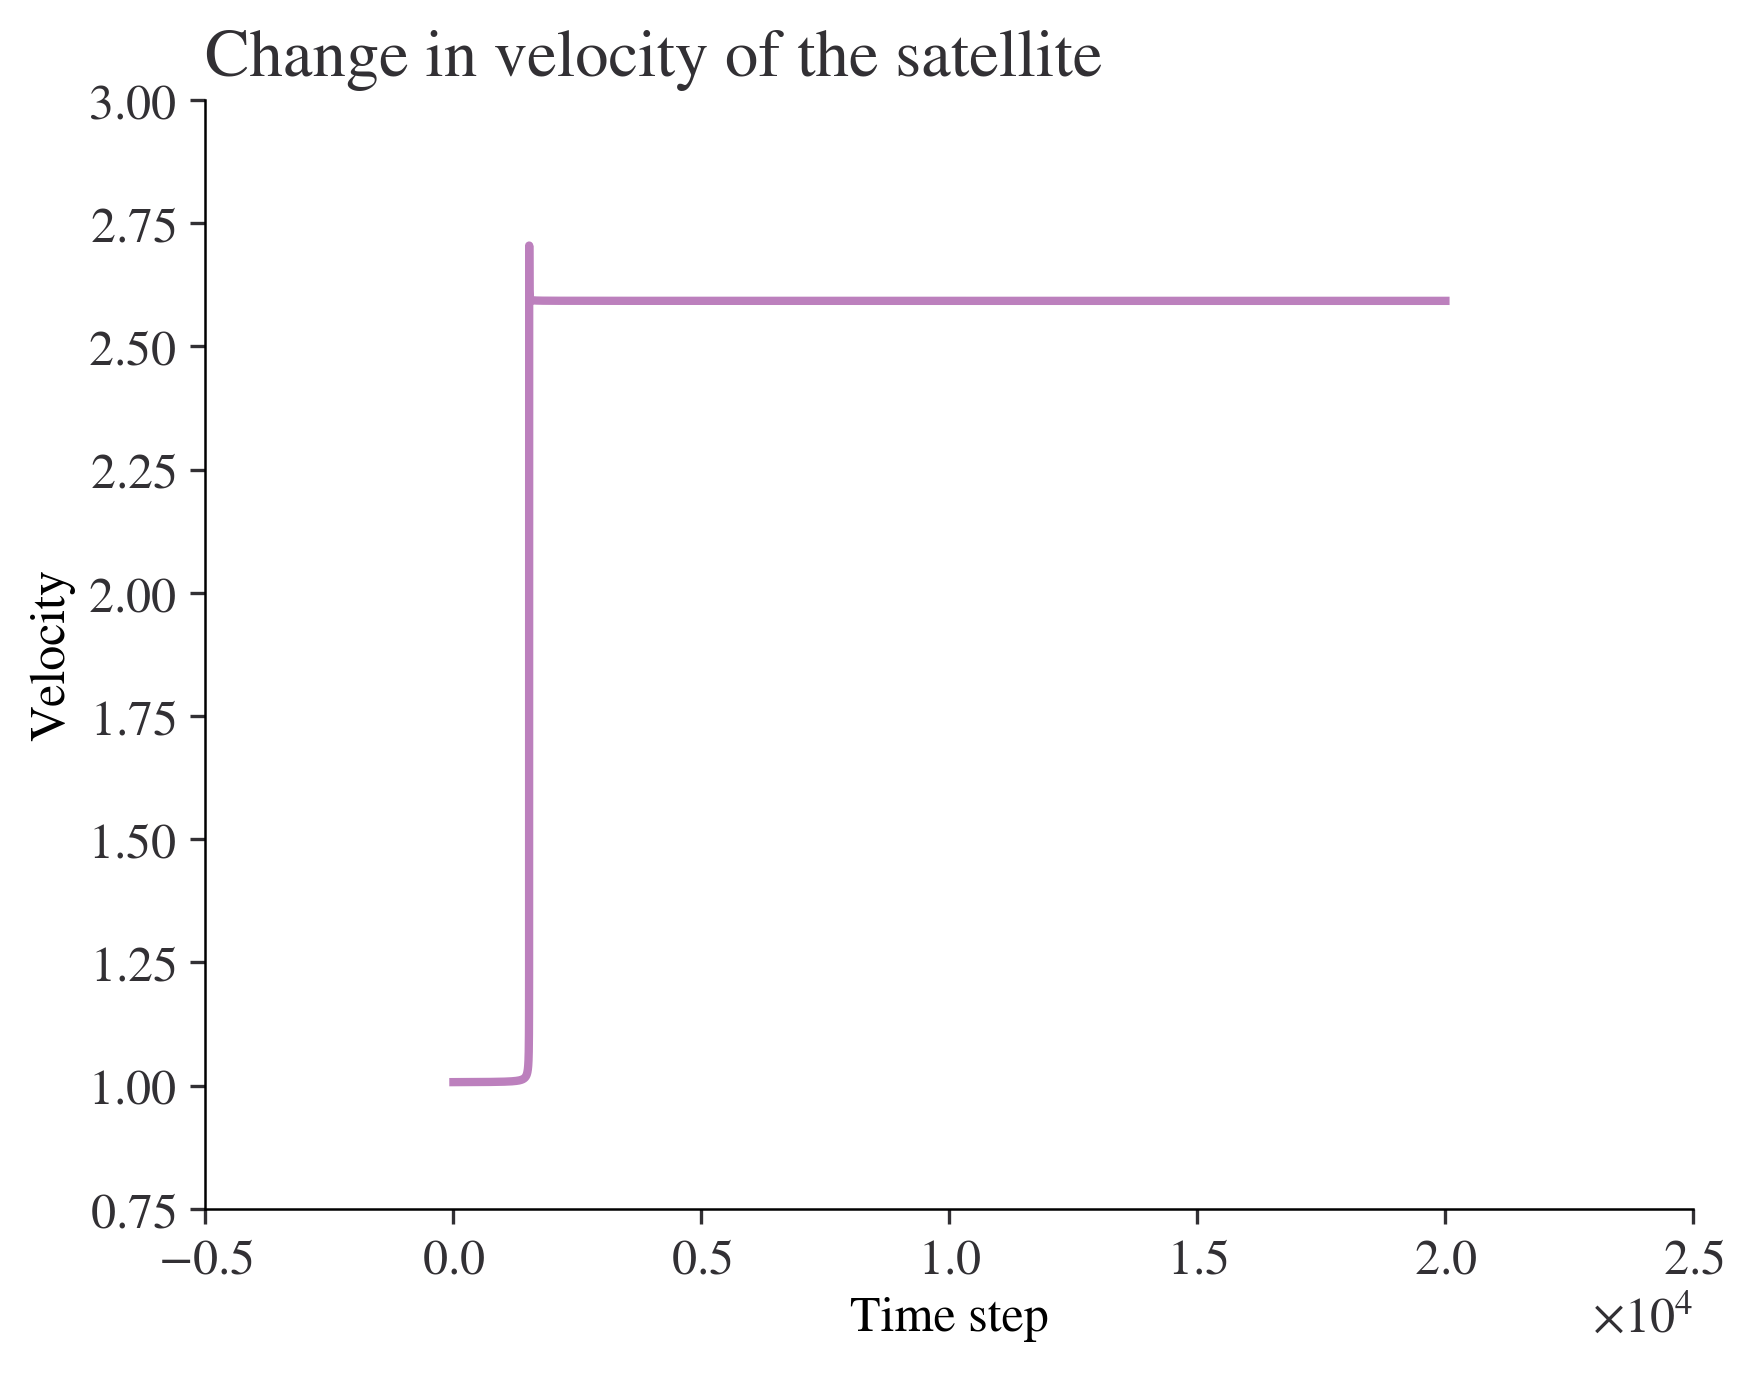

In [47]:
'''fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Gravity assist to increase velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.005, 0.005)
ax2.set_ylim(-0.005, 0.005)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(np.linalg.norm(v3,axis=1))
ax3.set_title('Change in velocity of the satellite')
ax3.set_xlabel('Time step')
ax3.set_ylabel('Velocity')

fig.savefig('jupiter_big_increase')'''

plt.figure()
plt.plot(np.linalg.norm(v3,axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

In [48]:
d = np.linalg.norm(r2-r3, axis=1)
closest_timestep = np.where(d == min(d))
print(closest_timestep)

print(min(d))

(array([1526]),)
0.000609534962930454


From the above simulation, we achieve over a two times increase in the velocity of the satellite after it passes Jupiter. This is comparable to the increase of Pioneer 10 after its gravity assist.

## Reducing Initial Velocity
While this result is satisfactory, it would be greatly beneficial to instead consider the satellite moving at a slower velocity, as this means that it can move at a greater distance from the object and still be affected by the gravitational forces. Earlier, I noticed that there is somewhat of an issue involving the timestep. Without increasing the timestep, the planet jumps, making it difficult to place the satellite either in front or behind the orbit to reduce or increase its velocity. This issue could be rectified by increasing timestep, but this comes with a large increase in processing time. Moving the starting position of the satellite closer, reducing its velocity, and increasing the point of closest approach, I should have a system that is much easier to control but also allows for good slingshots and the same processing time.

In [49]:
G = 1
m1 = 1
m2 = 1e-3
m3 = 1e-27
Ndim = 2 
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

r2[0] = np.array((1.0, 0))
r3[0] = np.array((0.25, 1.25)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((1/1.57*(0.05-0.25), 
                  1/1.57*(1-1.25)))

In [50]:
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) #+ force(r3[i], r1[i], m3, m1)

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    collision_checker(r2[i], r3[i])

    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) #+ force(r3[i+1], r1[i+1], m3, m1)

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2))
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



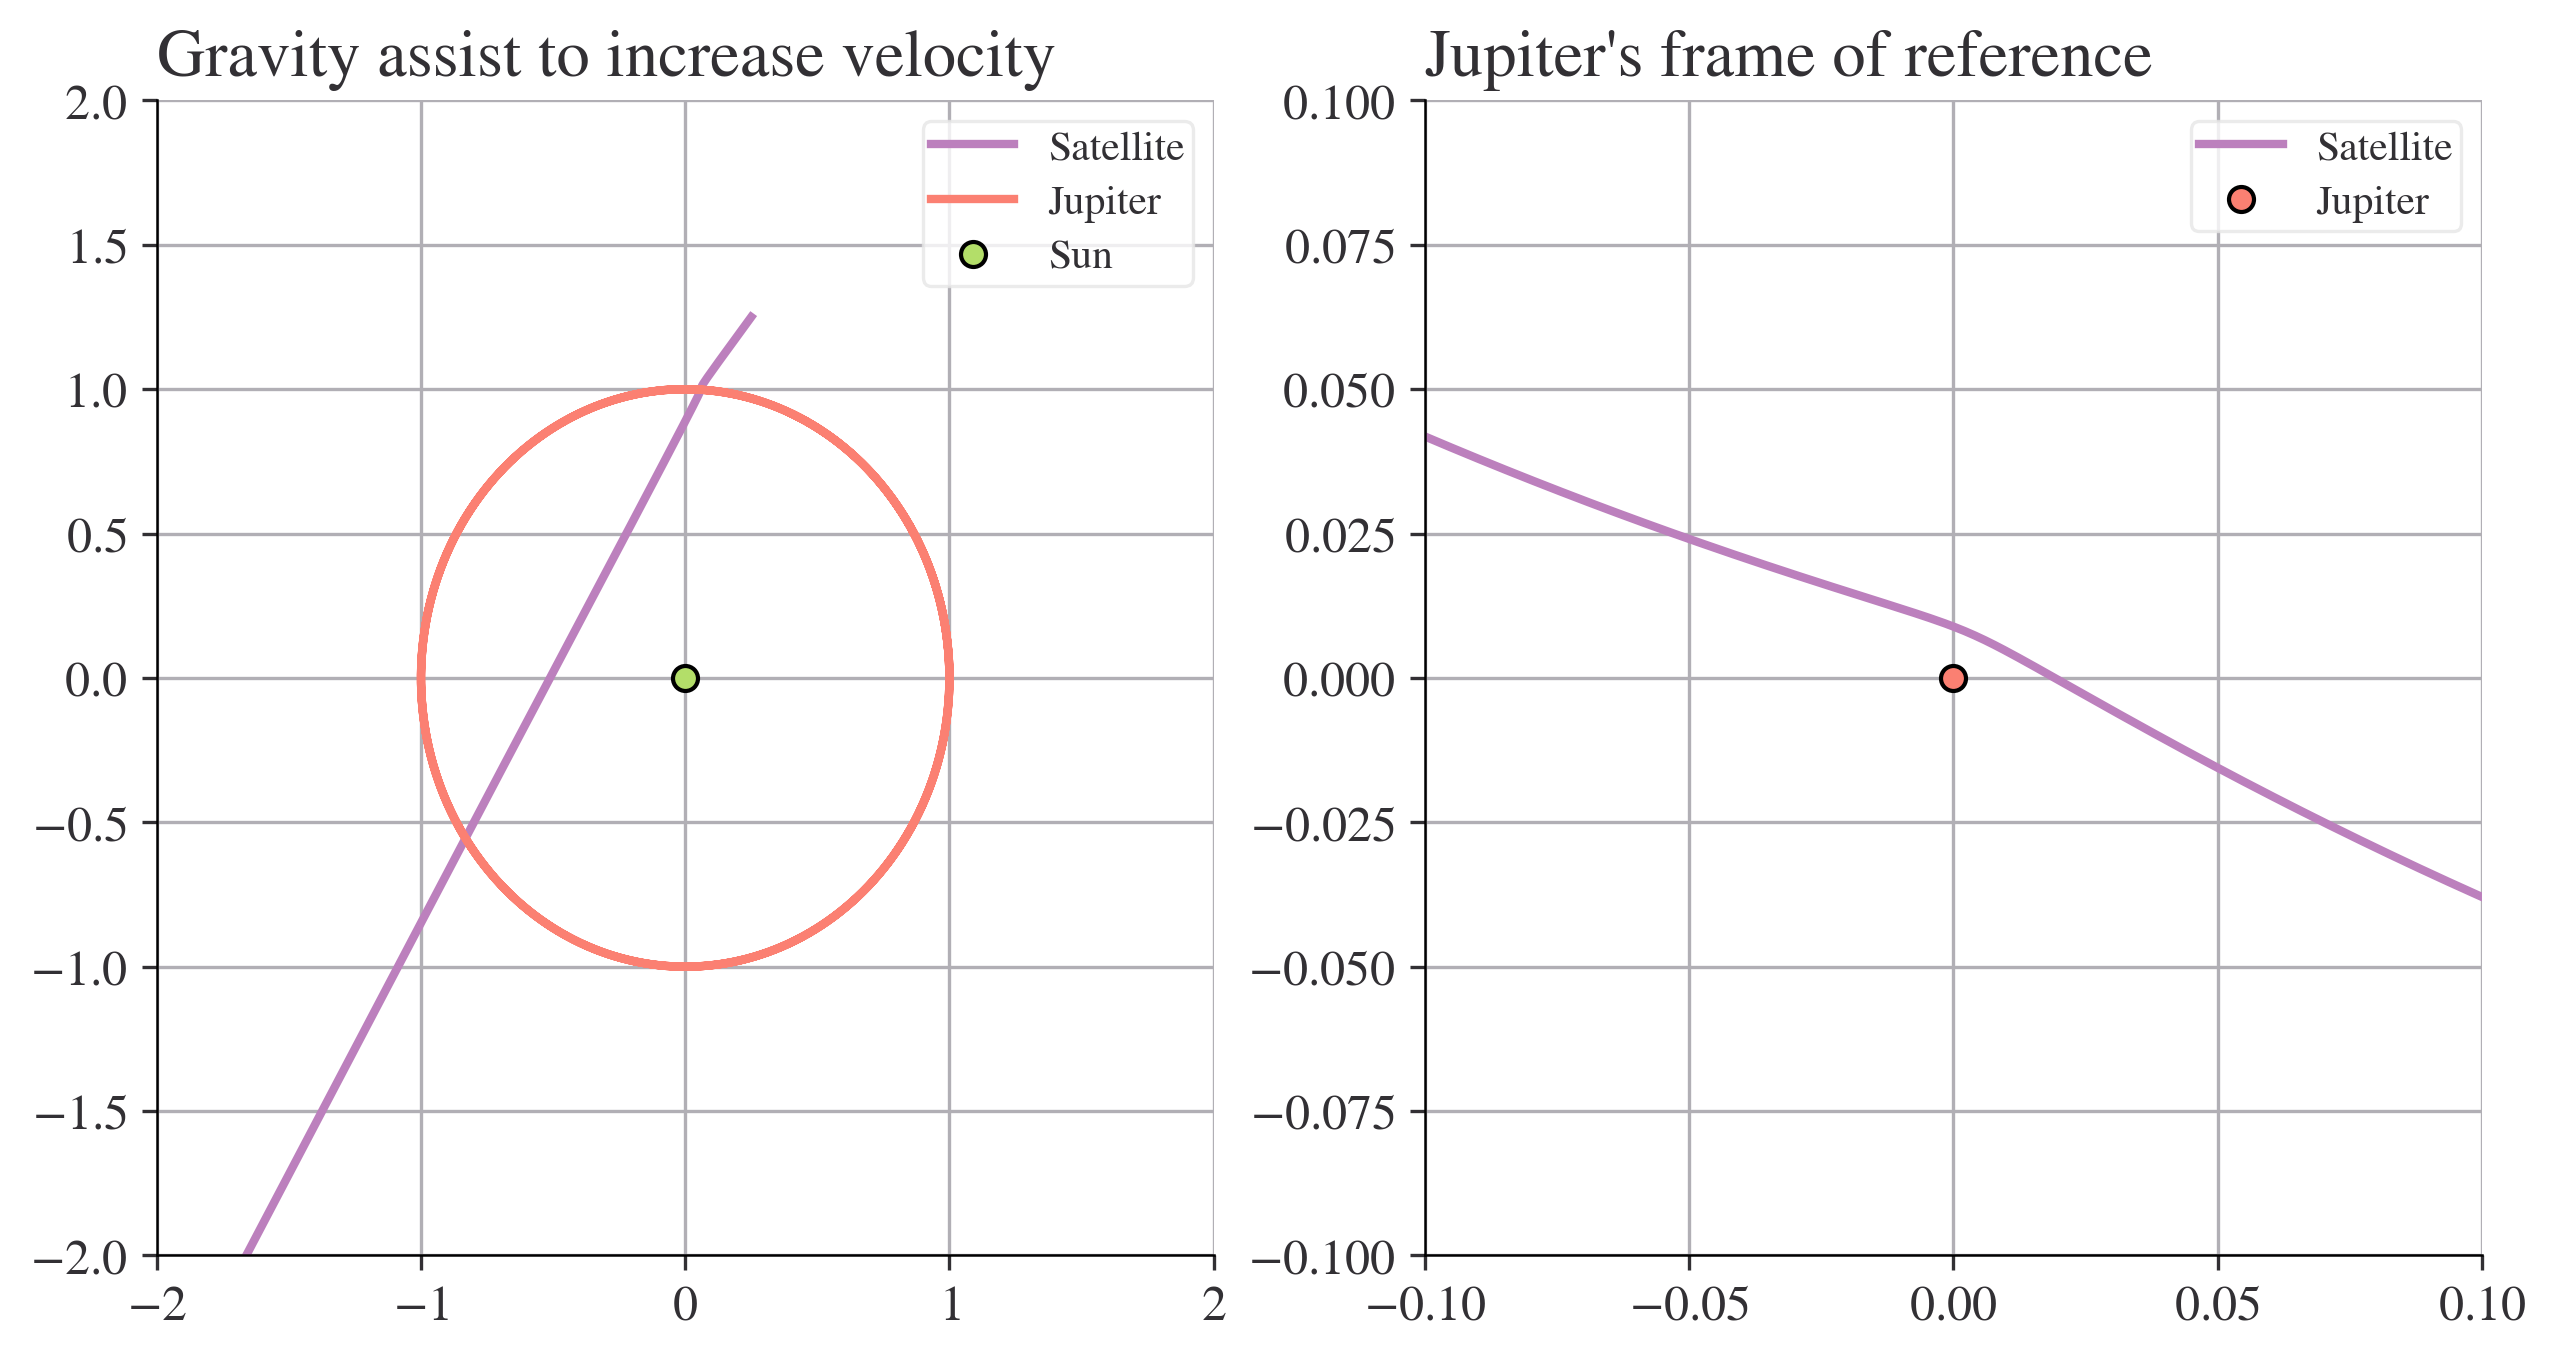

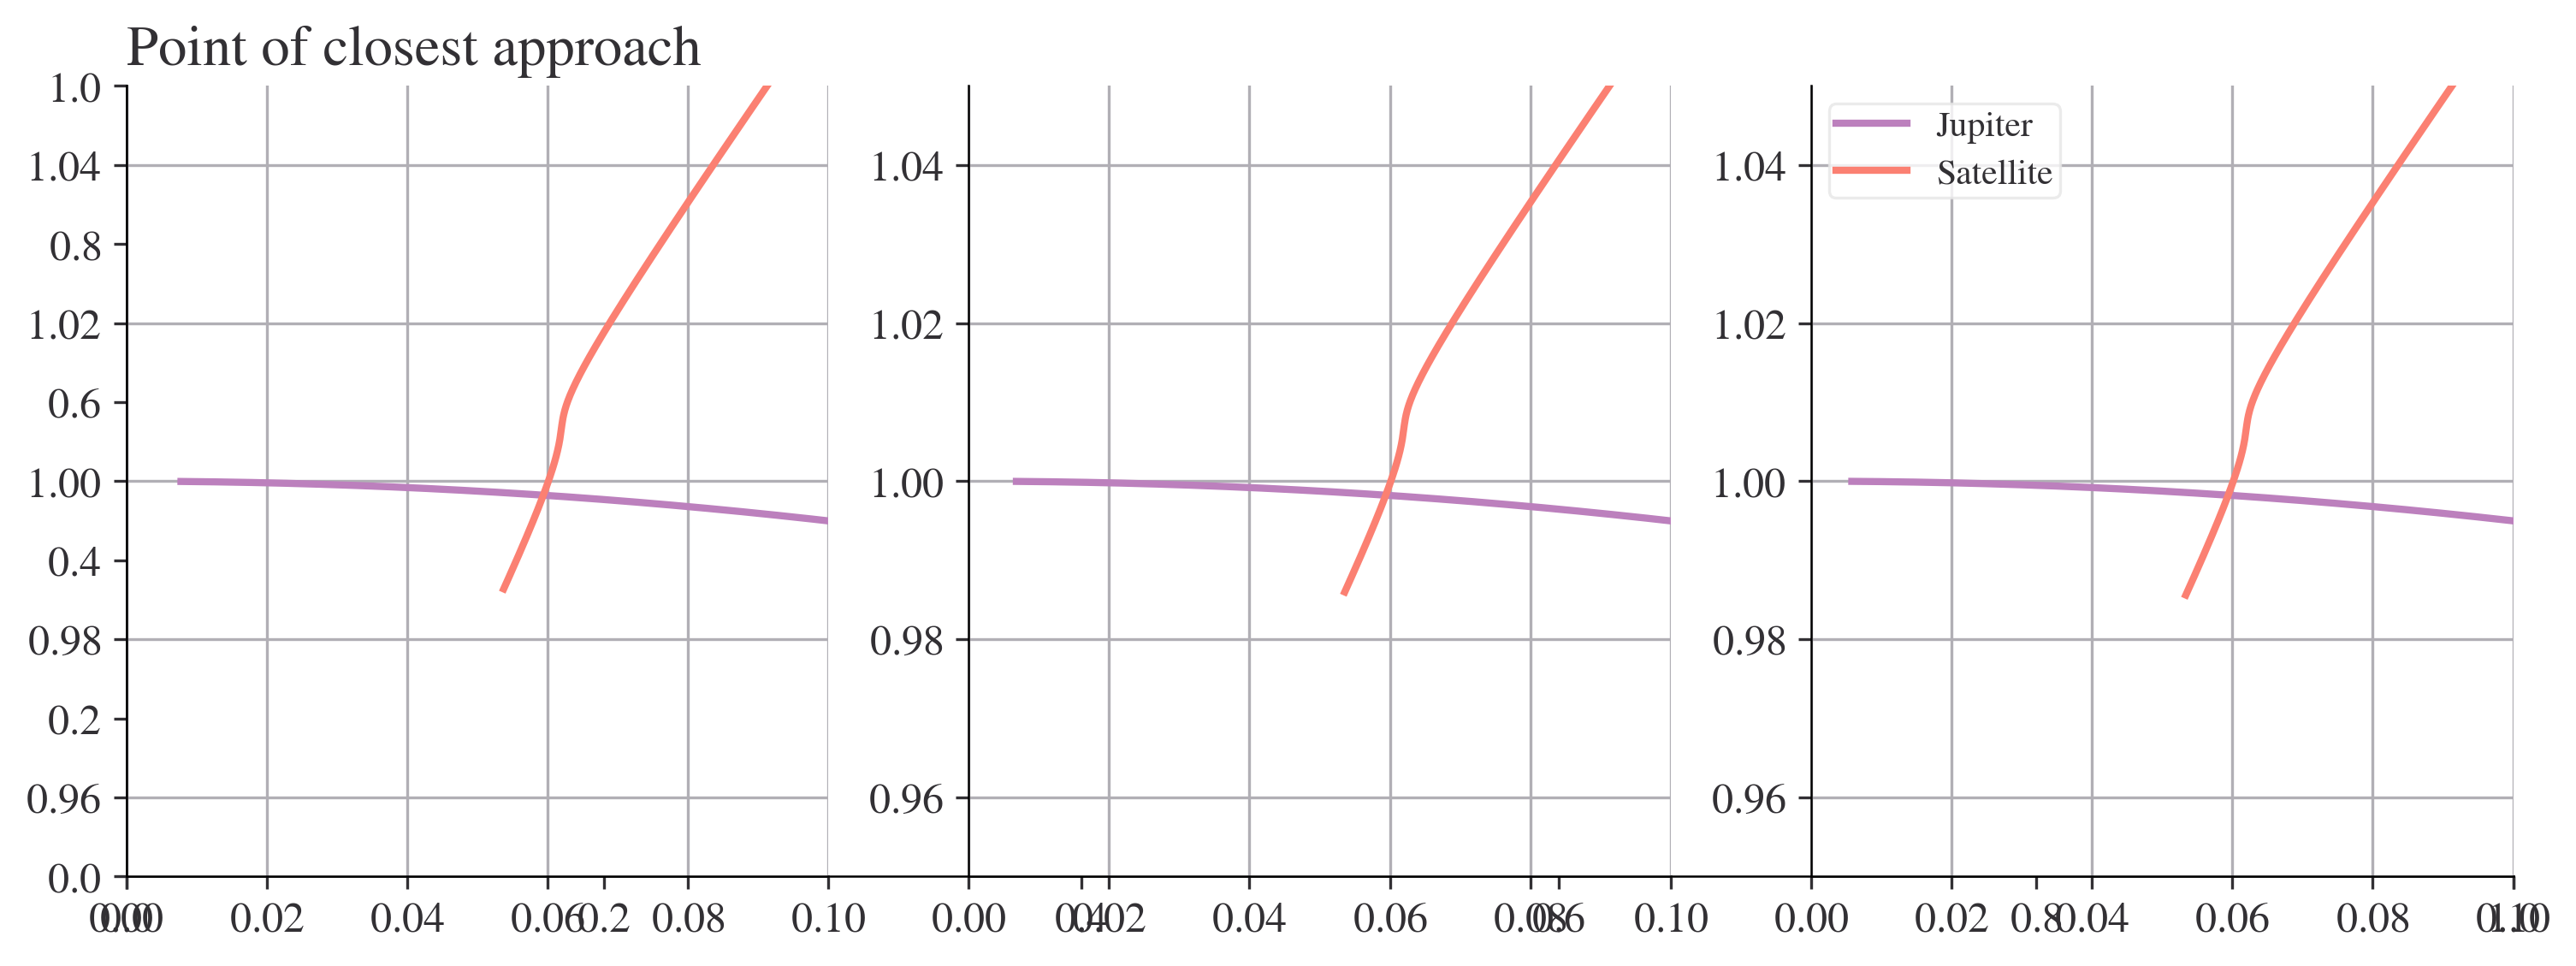

In [51]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist to increase velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

simend = 1563
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + 1*i,0], r2[:simend + 1*i,1], label='Jupiter')
    ax.plot(r3[:simend + 1*i,0], r3[:simend + 1*i,1], label='Satellite')
    ax.set_xlim(0,0.1)
    ax.set_ylim(0.95, 1.05)
    ax.grid()
plt.legend()


Initial velocity of satellite: 0.20392115405837097
Final velocity of satellite: 0.4392498008497535
Initial velocity of Jupiter: 1.0
Final velocity of Jupiter: 0.9999998522491199
Point of closest approach: 0.008334288441073576


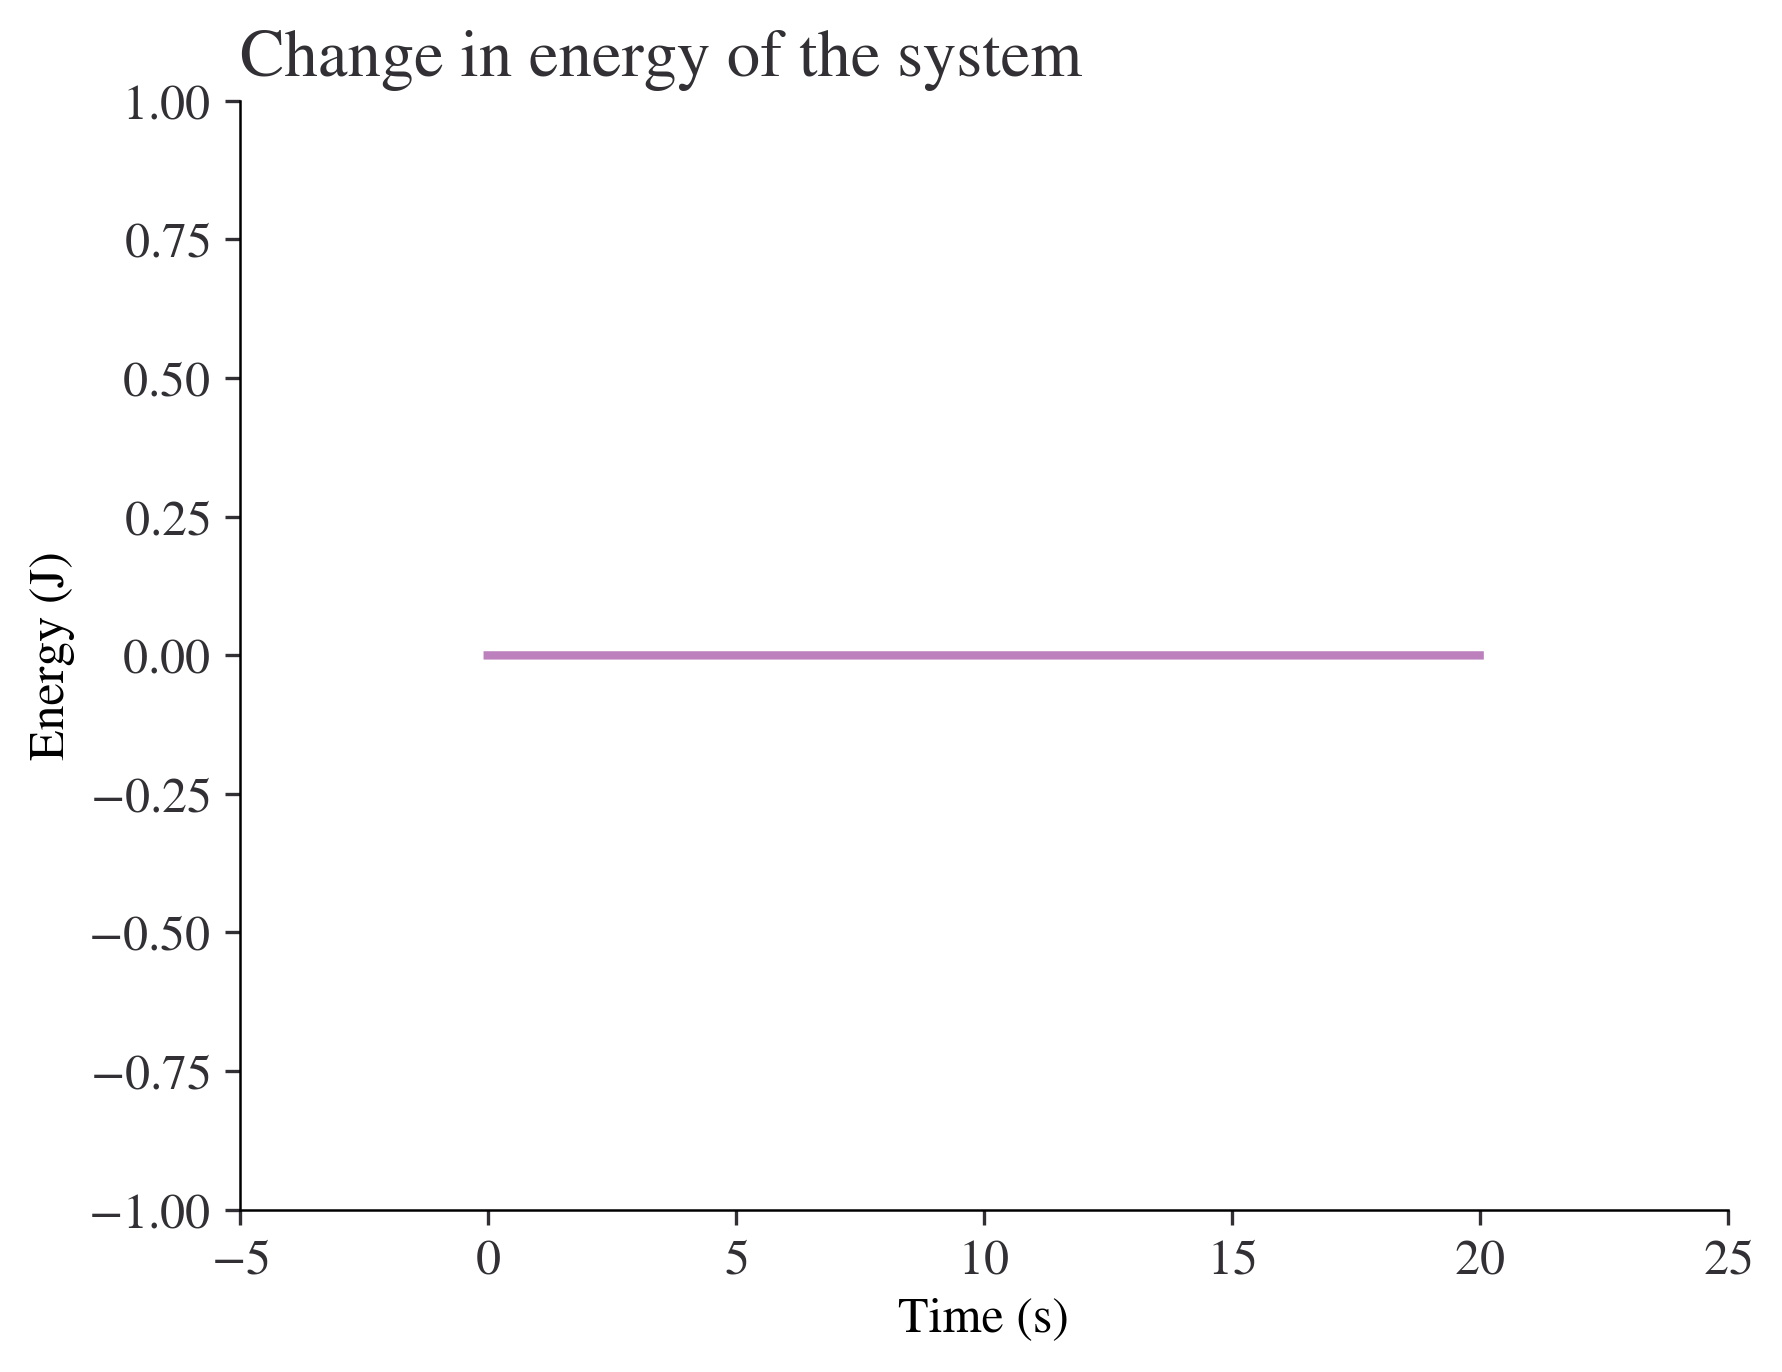

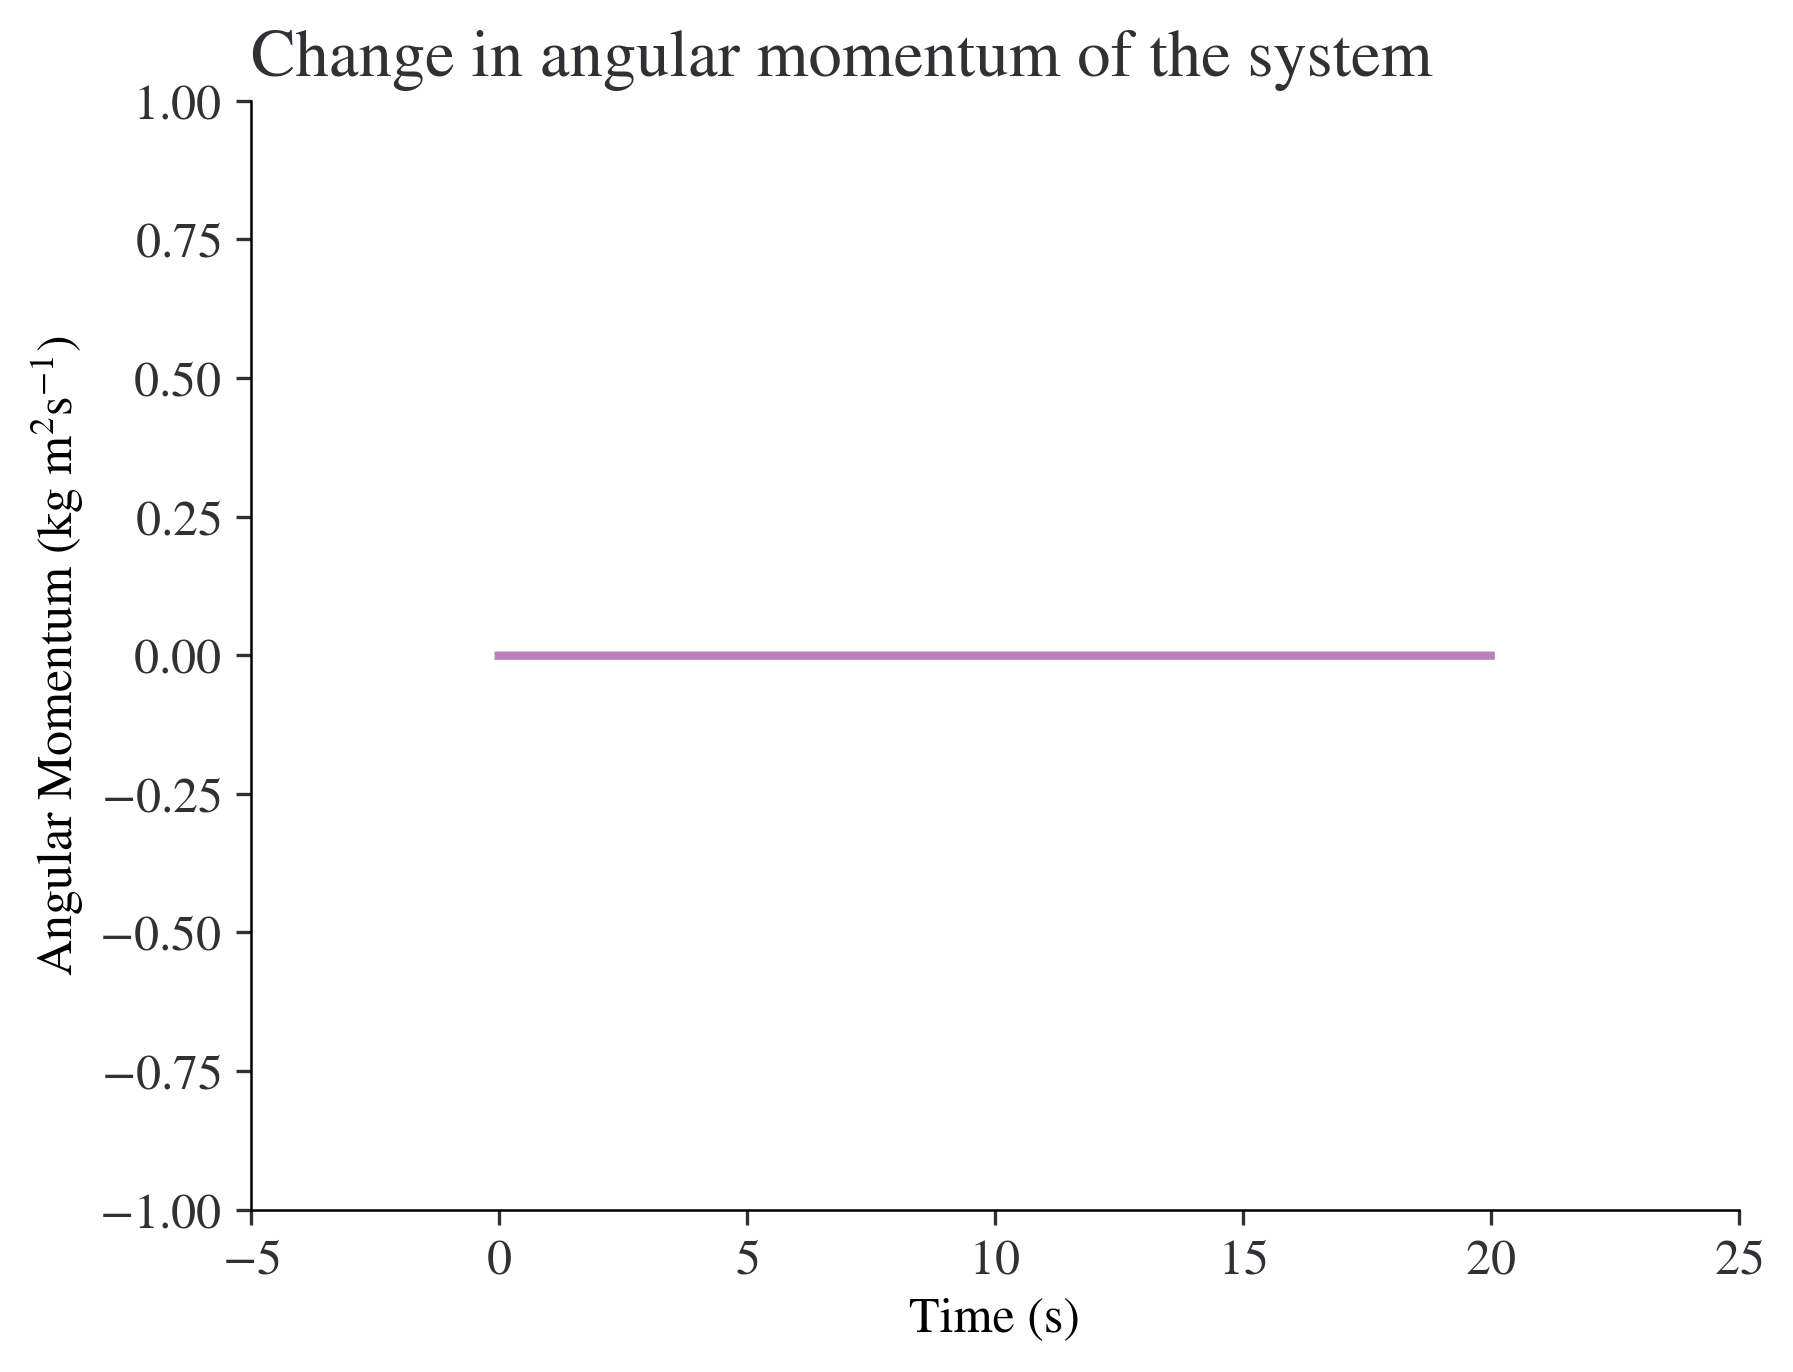

In [52]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of Jupiter: {np.linalg.norm(v2[0])}')
print(f'Final velocity of Jupiter: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

(array([1475]),)


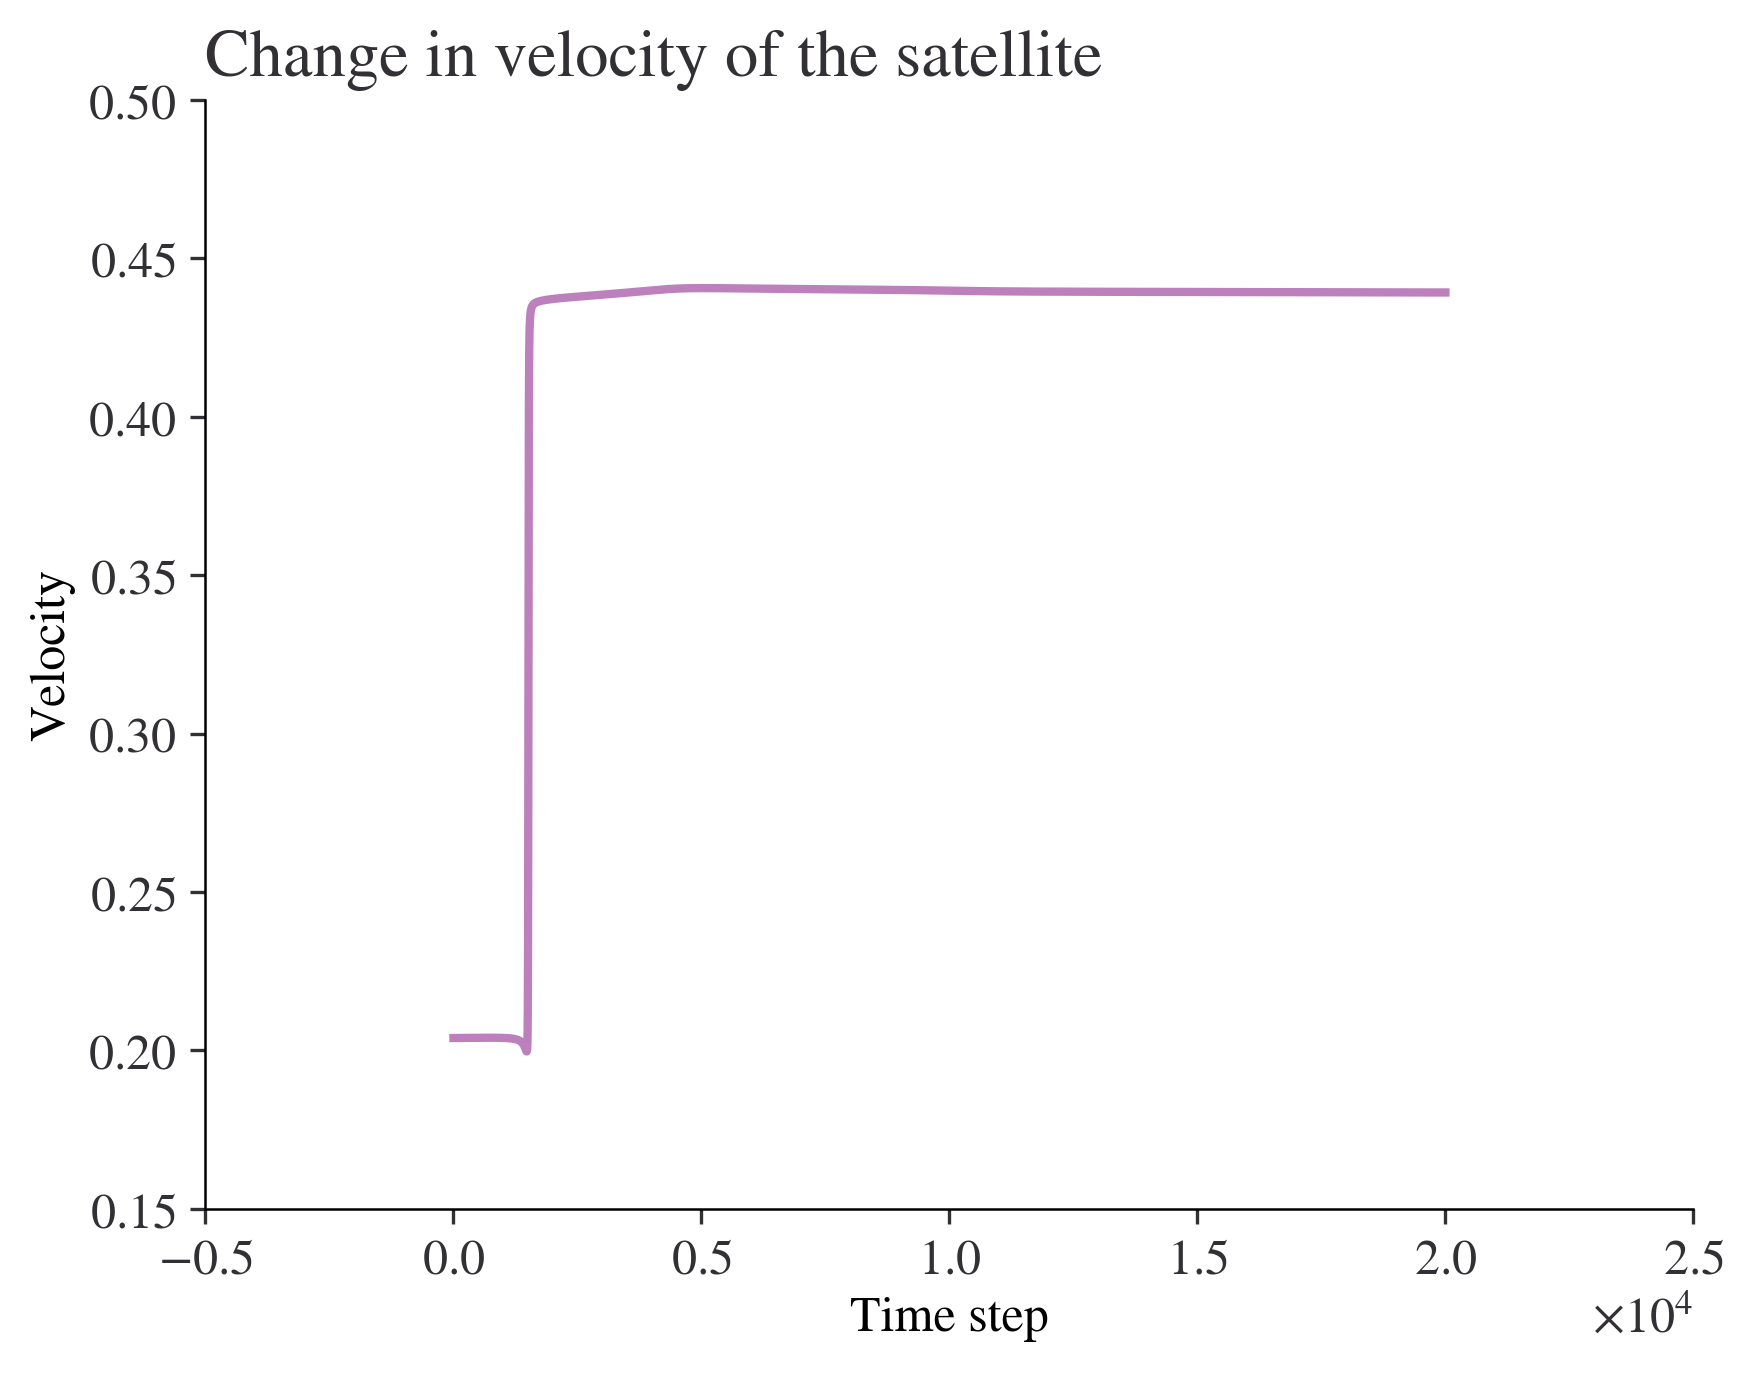

In [53]:
'''fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Gravity assist to increase velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(np.linalg.norm(v3,axis=1))
ax3.set_title('Change in velocity of the satellite')
ax3.set_xlabel('Time step')
ax3.set_ylabel('Velocity')

fig.savefig('jupiter_reduced_vel.png')'''

plt.figure()
plt.plot(np.linalg.norm(v3,axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

print(np.where(np.linalg.norm(v3, axis=1) == min(np.linalg.norm(v3, axis=1))))

In [54]:
G = 1
m1 = 1
m2 = 1e-3
m3 = 1e-27
Ndim = 2    
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

r2[0] = np.array((1.0, 0))
r3[0] = np.array((-0.25, 1.25)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[0] = np.array((1/1.57*(-0.1+0.25), 
                  1/1.57*(1-1.25)))

In [55]:
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)
    f3 = force(r3[i], r2[i], m3, m2) #+ force(r3[i], r1[i], m3, m1)

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)
    r3[i+1] = r3[i] + dt*v3[i] + (dt**2)*f3/(2*m3)

    collision_checker(r2[i], r3[i])

    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)
    f3new = force(r3[i+1], r2[i+1], m3, m2) #+ force(r3[i+1], r1[i+1], m3, m1)

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2)) 
    v3[i+1] = v3[i] + dt*((f3+f3new) / (2*m3))



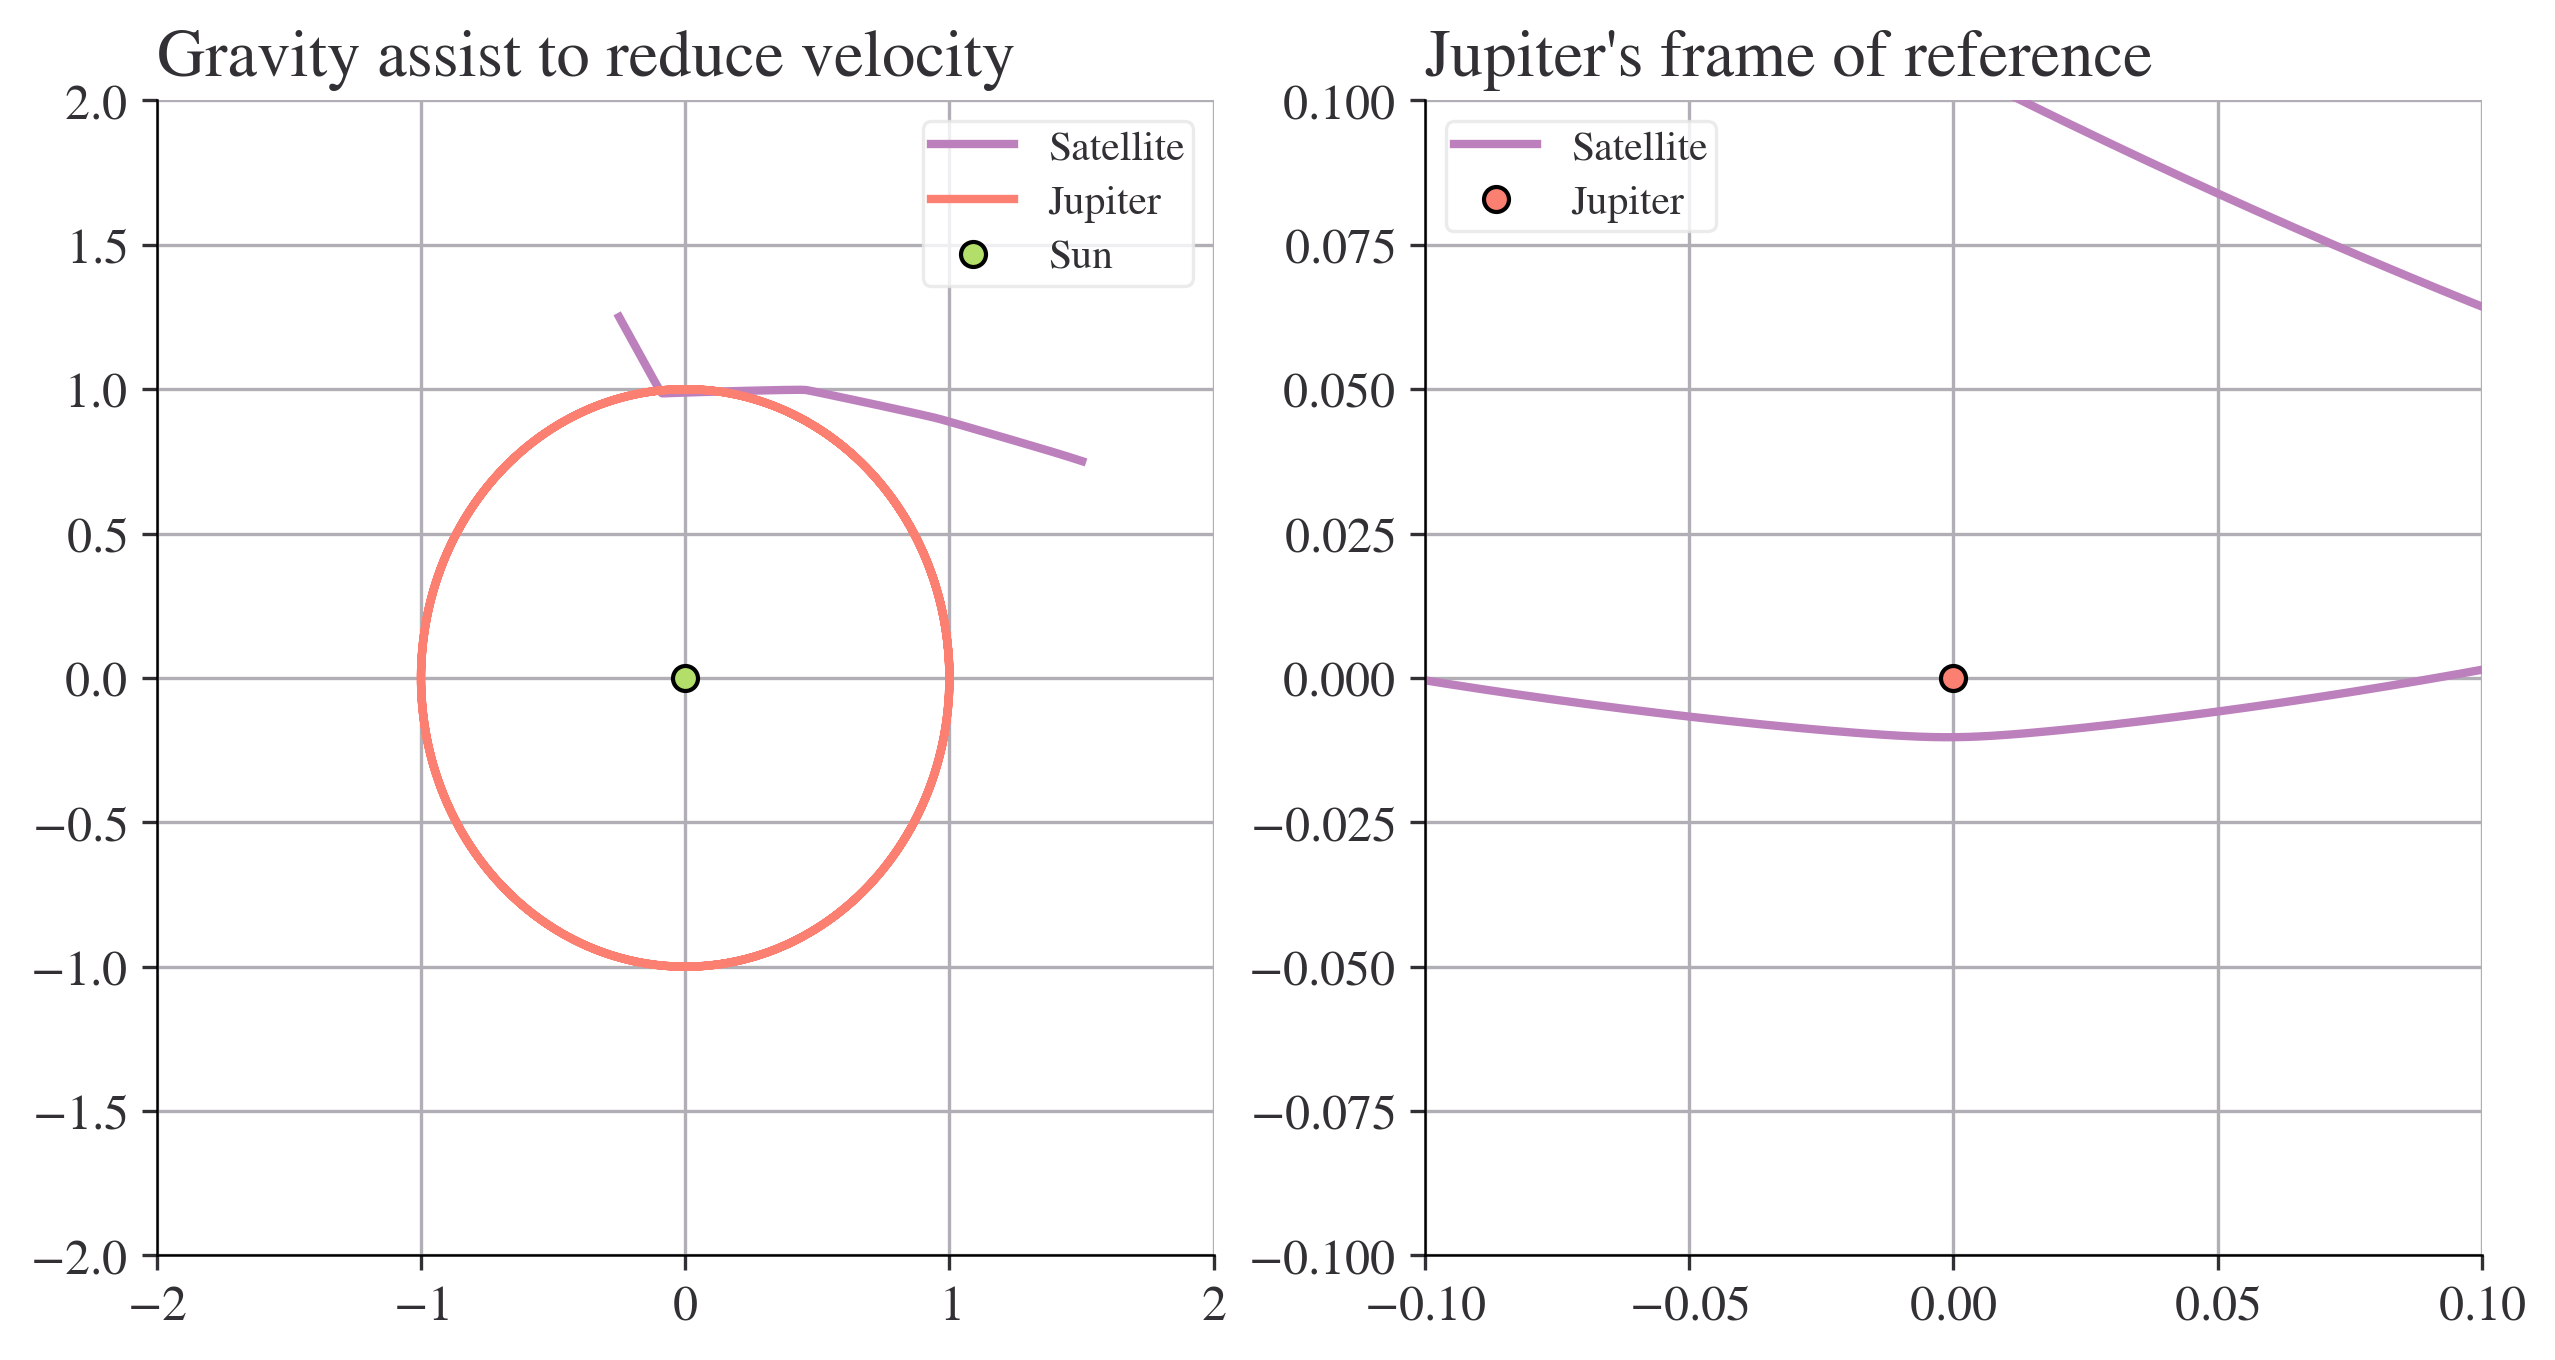

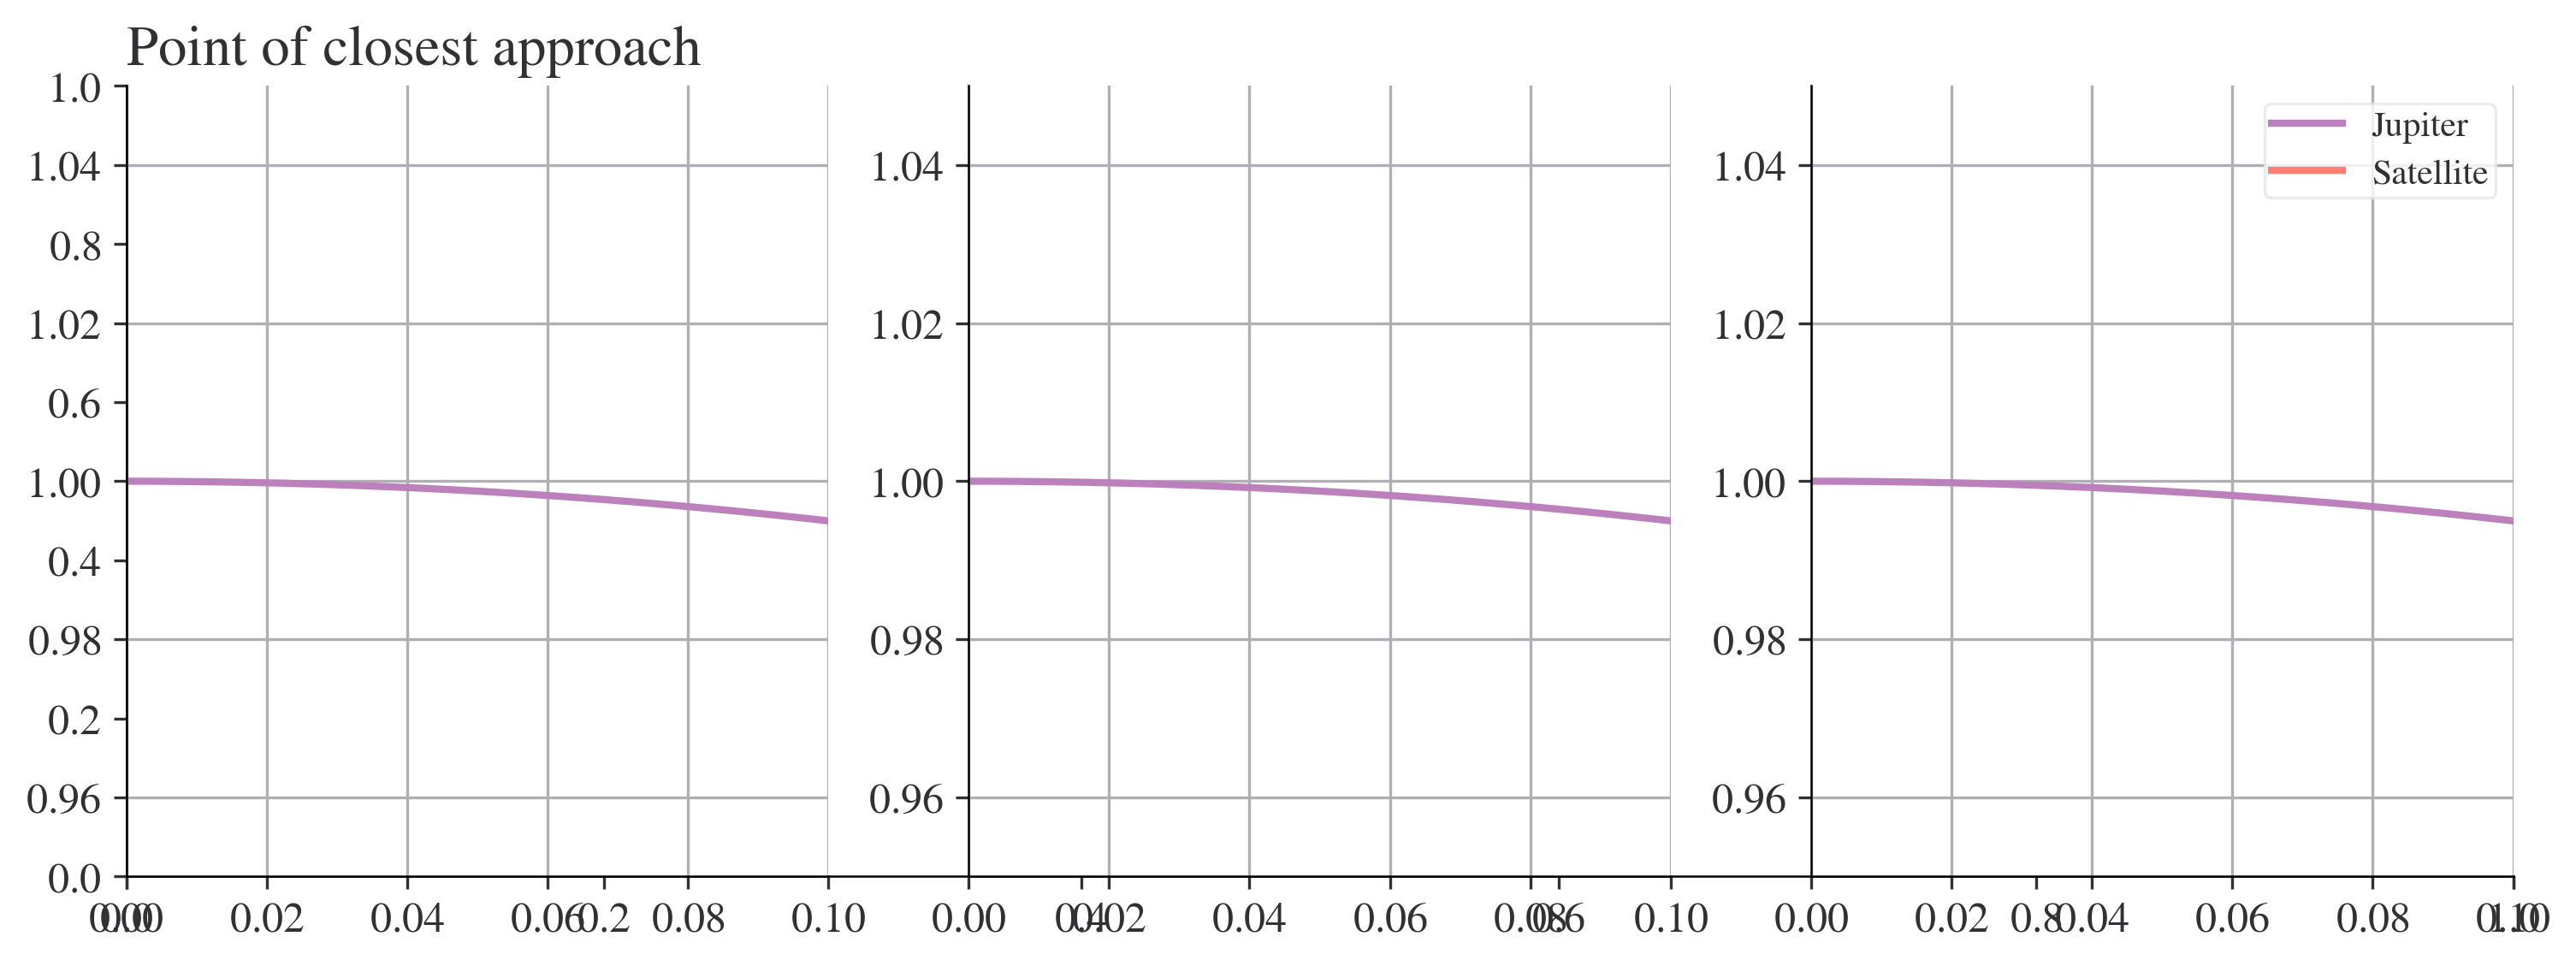

In [56]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist to reduce velocity')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

simend = 1570
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + 1*i,0], r2[:simend + 1*i,1], label='Jupiter')
    ax.plot(r3[:simend + 1*i,0], r3[:simend + 1*i,1], label='Satellite')
    ax.set_xlim(0,0.1)
    ax.set_ylim(0.95, 1.05)
    ax.grid()
plt.legend()

Initial velocity of satellite: 0.18569910493137898
Final velocity of satellite: 0.08193778122751921
Initial velocity of Jupiter: 1.0
Final velocity of Jupiter: 0.9999998522491199
Point of closest approach: 0.01027001259176871


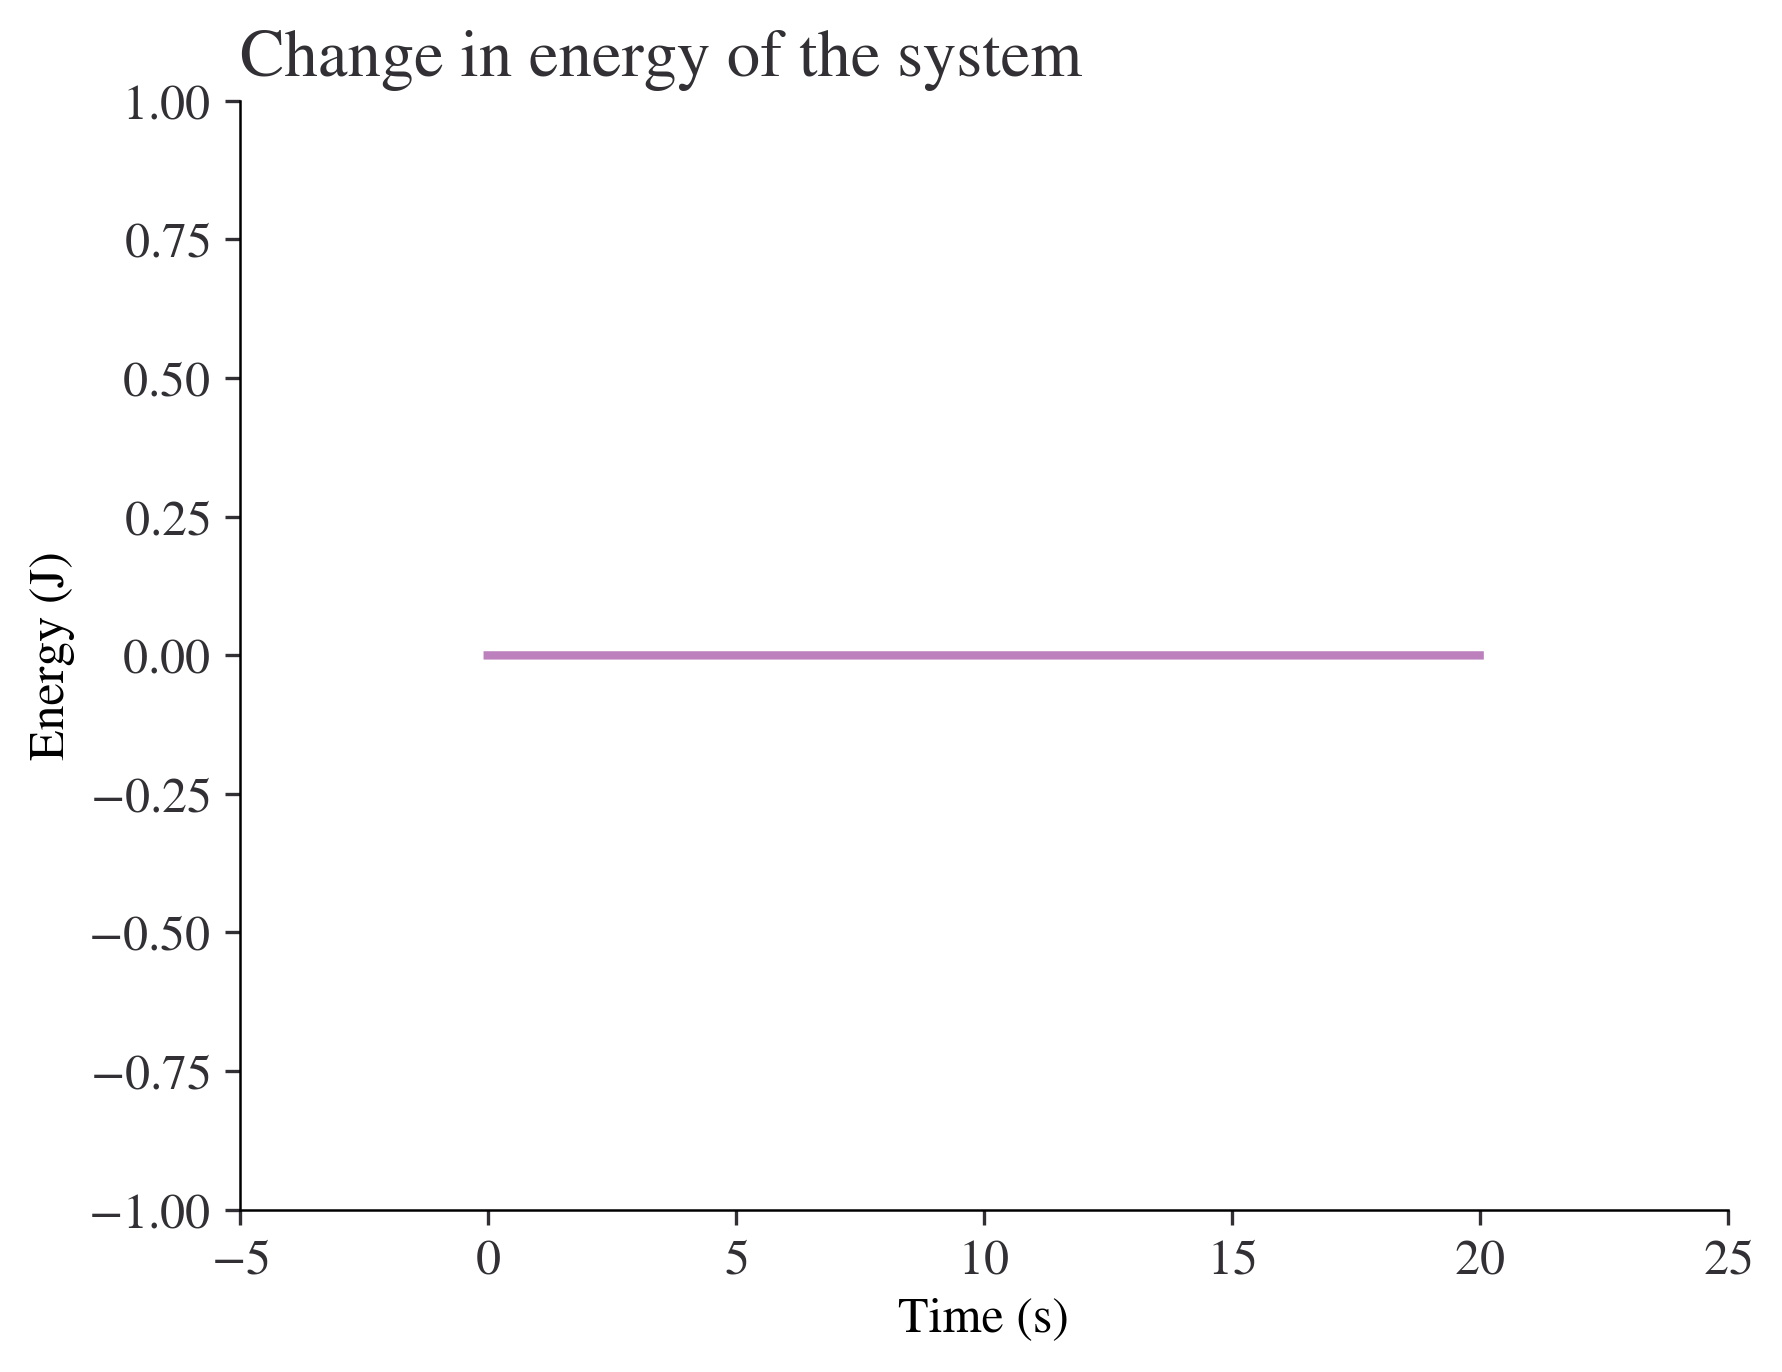

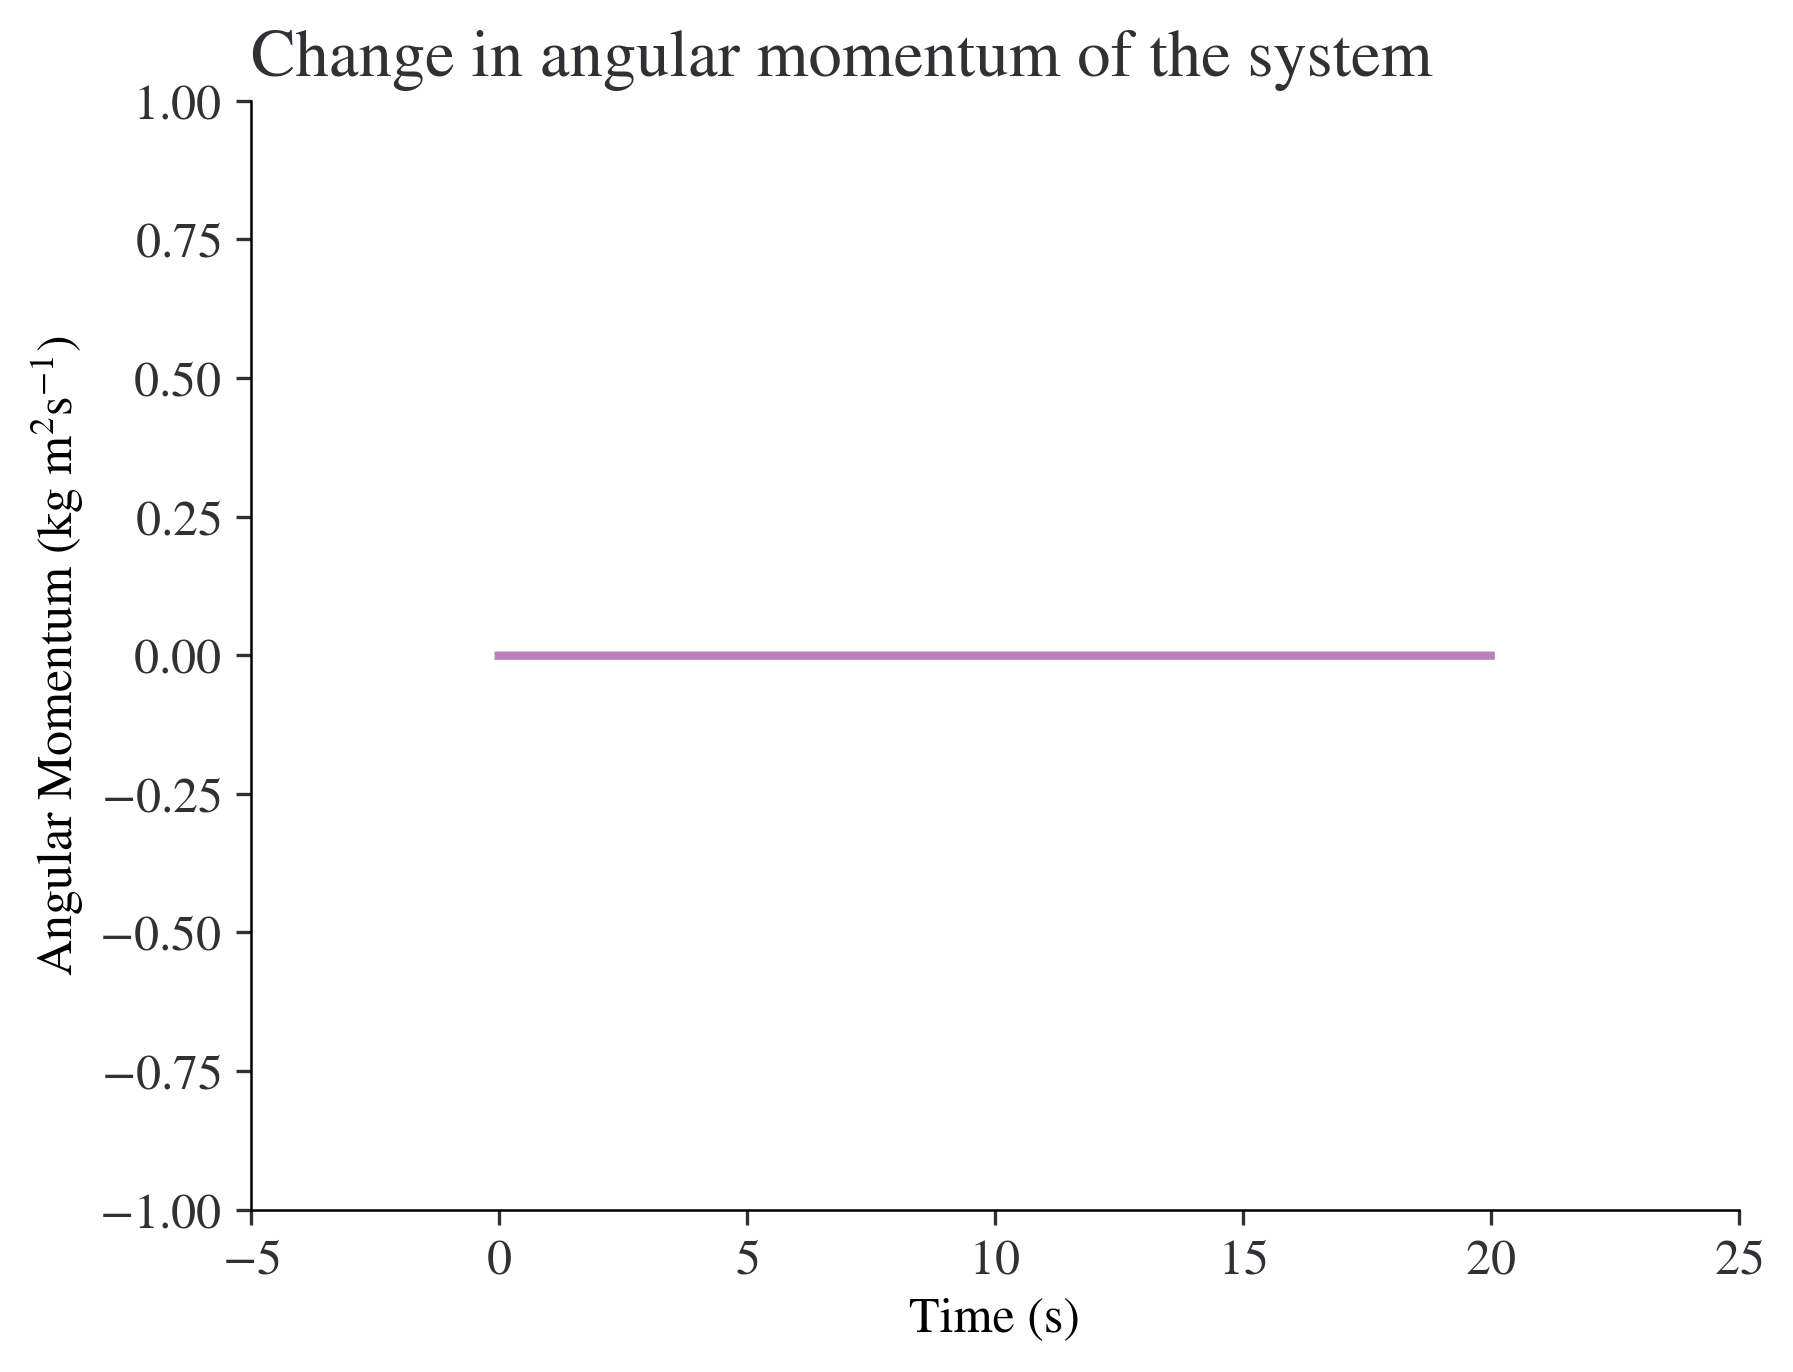

In [57]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of Jupiter: {np.linalg.norm(v2[0])}')
print(f'Final velocity of Jupiter: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

(array([19999]),)


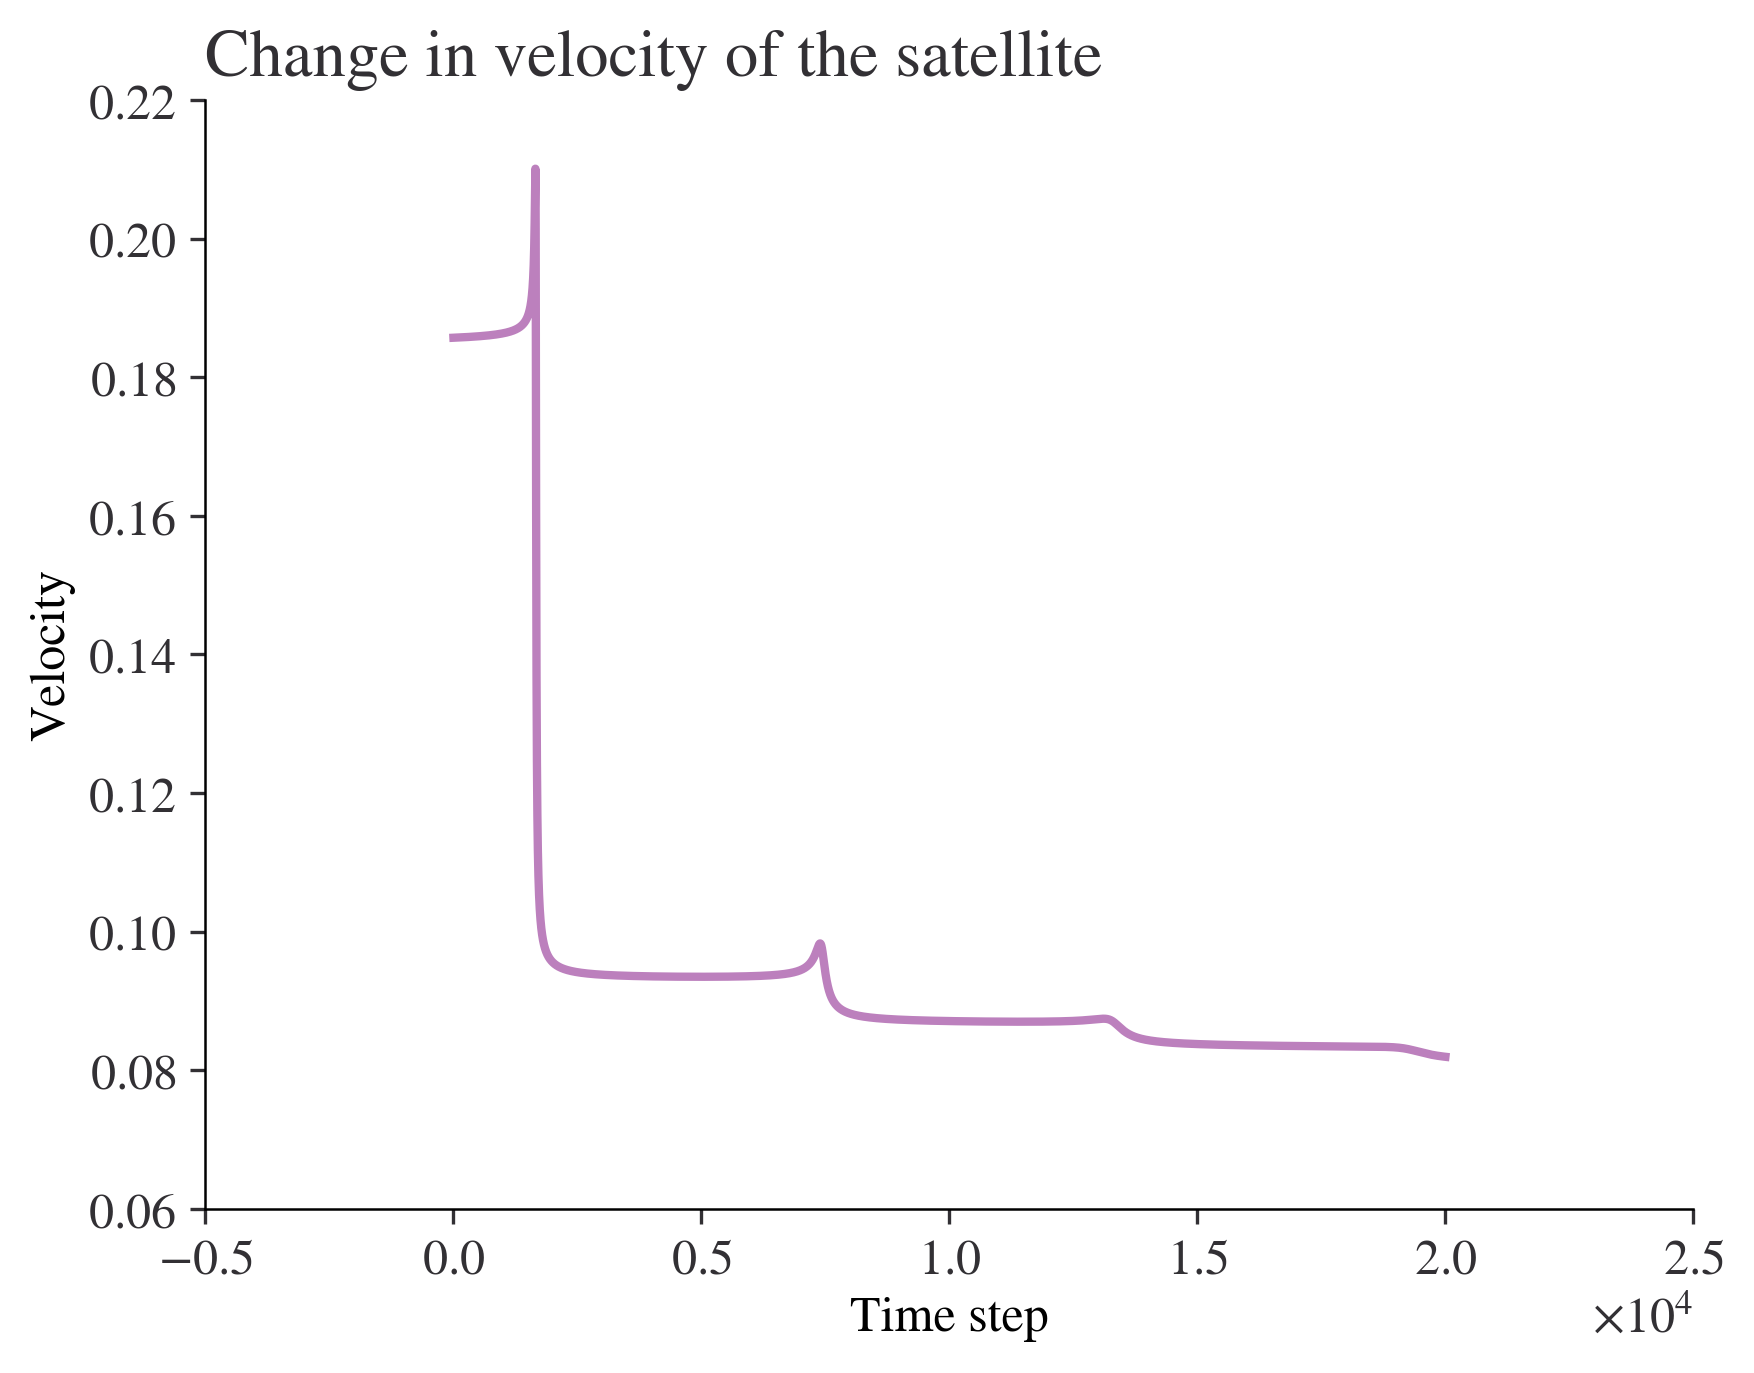

In [58]:
plt.plot(np.linalg.norm(v3,axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

print(np.where(np.linalg.norm(v3, axis=1) == min(np.linalg.norm(v3, axis=1))))

As we can see during both cases, it is very much feasible to scale velocity to much greater extents by reducing the velocity of the satellite.

# Including circular orbit around the sun

Up to this point, circular orbits have not been including the influence of the sun on the satellite. As a result, these simulations are not yet good enough models for motion around the solar system. As is seen below, the method used to send the satellite to the interception point involves placing it in an elliptical orbit. To make things easier, the satellite is held stationary for a finite time, before it is deployed with the elliptical orbit. This delay was determined by the difference between the time taken for the satellite and the planet to reach the interception point.

In [59]:
G = 1
m1 = 1
m2 = 1e-3
m3 = 1e-27
Ndim = 2     
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))

#lag = 1570 - 664 - this is the maximum lag before the satellite gets dangerously close to Jupiter
lag = 1570 - 654


r2[0] = np.array((1.0, 0))
r3[:lag+1] = np.array((0.5, 0)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v3[:lag+1] = np.array((0, np.sqrt(G*m1/0.25)))


In [60]:
# Splitting up the velocity Verlet to facilitate the delay
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) + force(r2[i], r3[i], m2, m3)

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)

    collision_checker(r2[i], r3[i])

    f2new = force(r2[i+1], r1[i+1], m2, m1) + force(r2[i+1], r3[i+1], m2, m3)

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2)) 

for j in range(lag,Nsteps-1):
    f3 = force(r3[j], r2[j], m3, m2) + force(r3[j], r1[j], m3, m1)

    r3[j+1] = r3[j] + dt*v3[j] + (dt**2)*f3/(2*m3)

    collision_checker(r2[j], r3[j])

    f3new = force(r3[j+1], r2[j+1], m3, m2) + force(r3[j+1], r1[j+1], m3, m1)

    v3[j+1] = v3[j] + dt*((f3+f3new) / (2*m3))



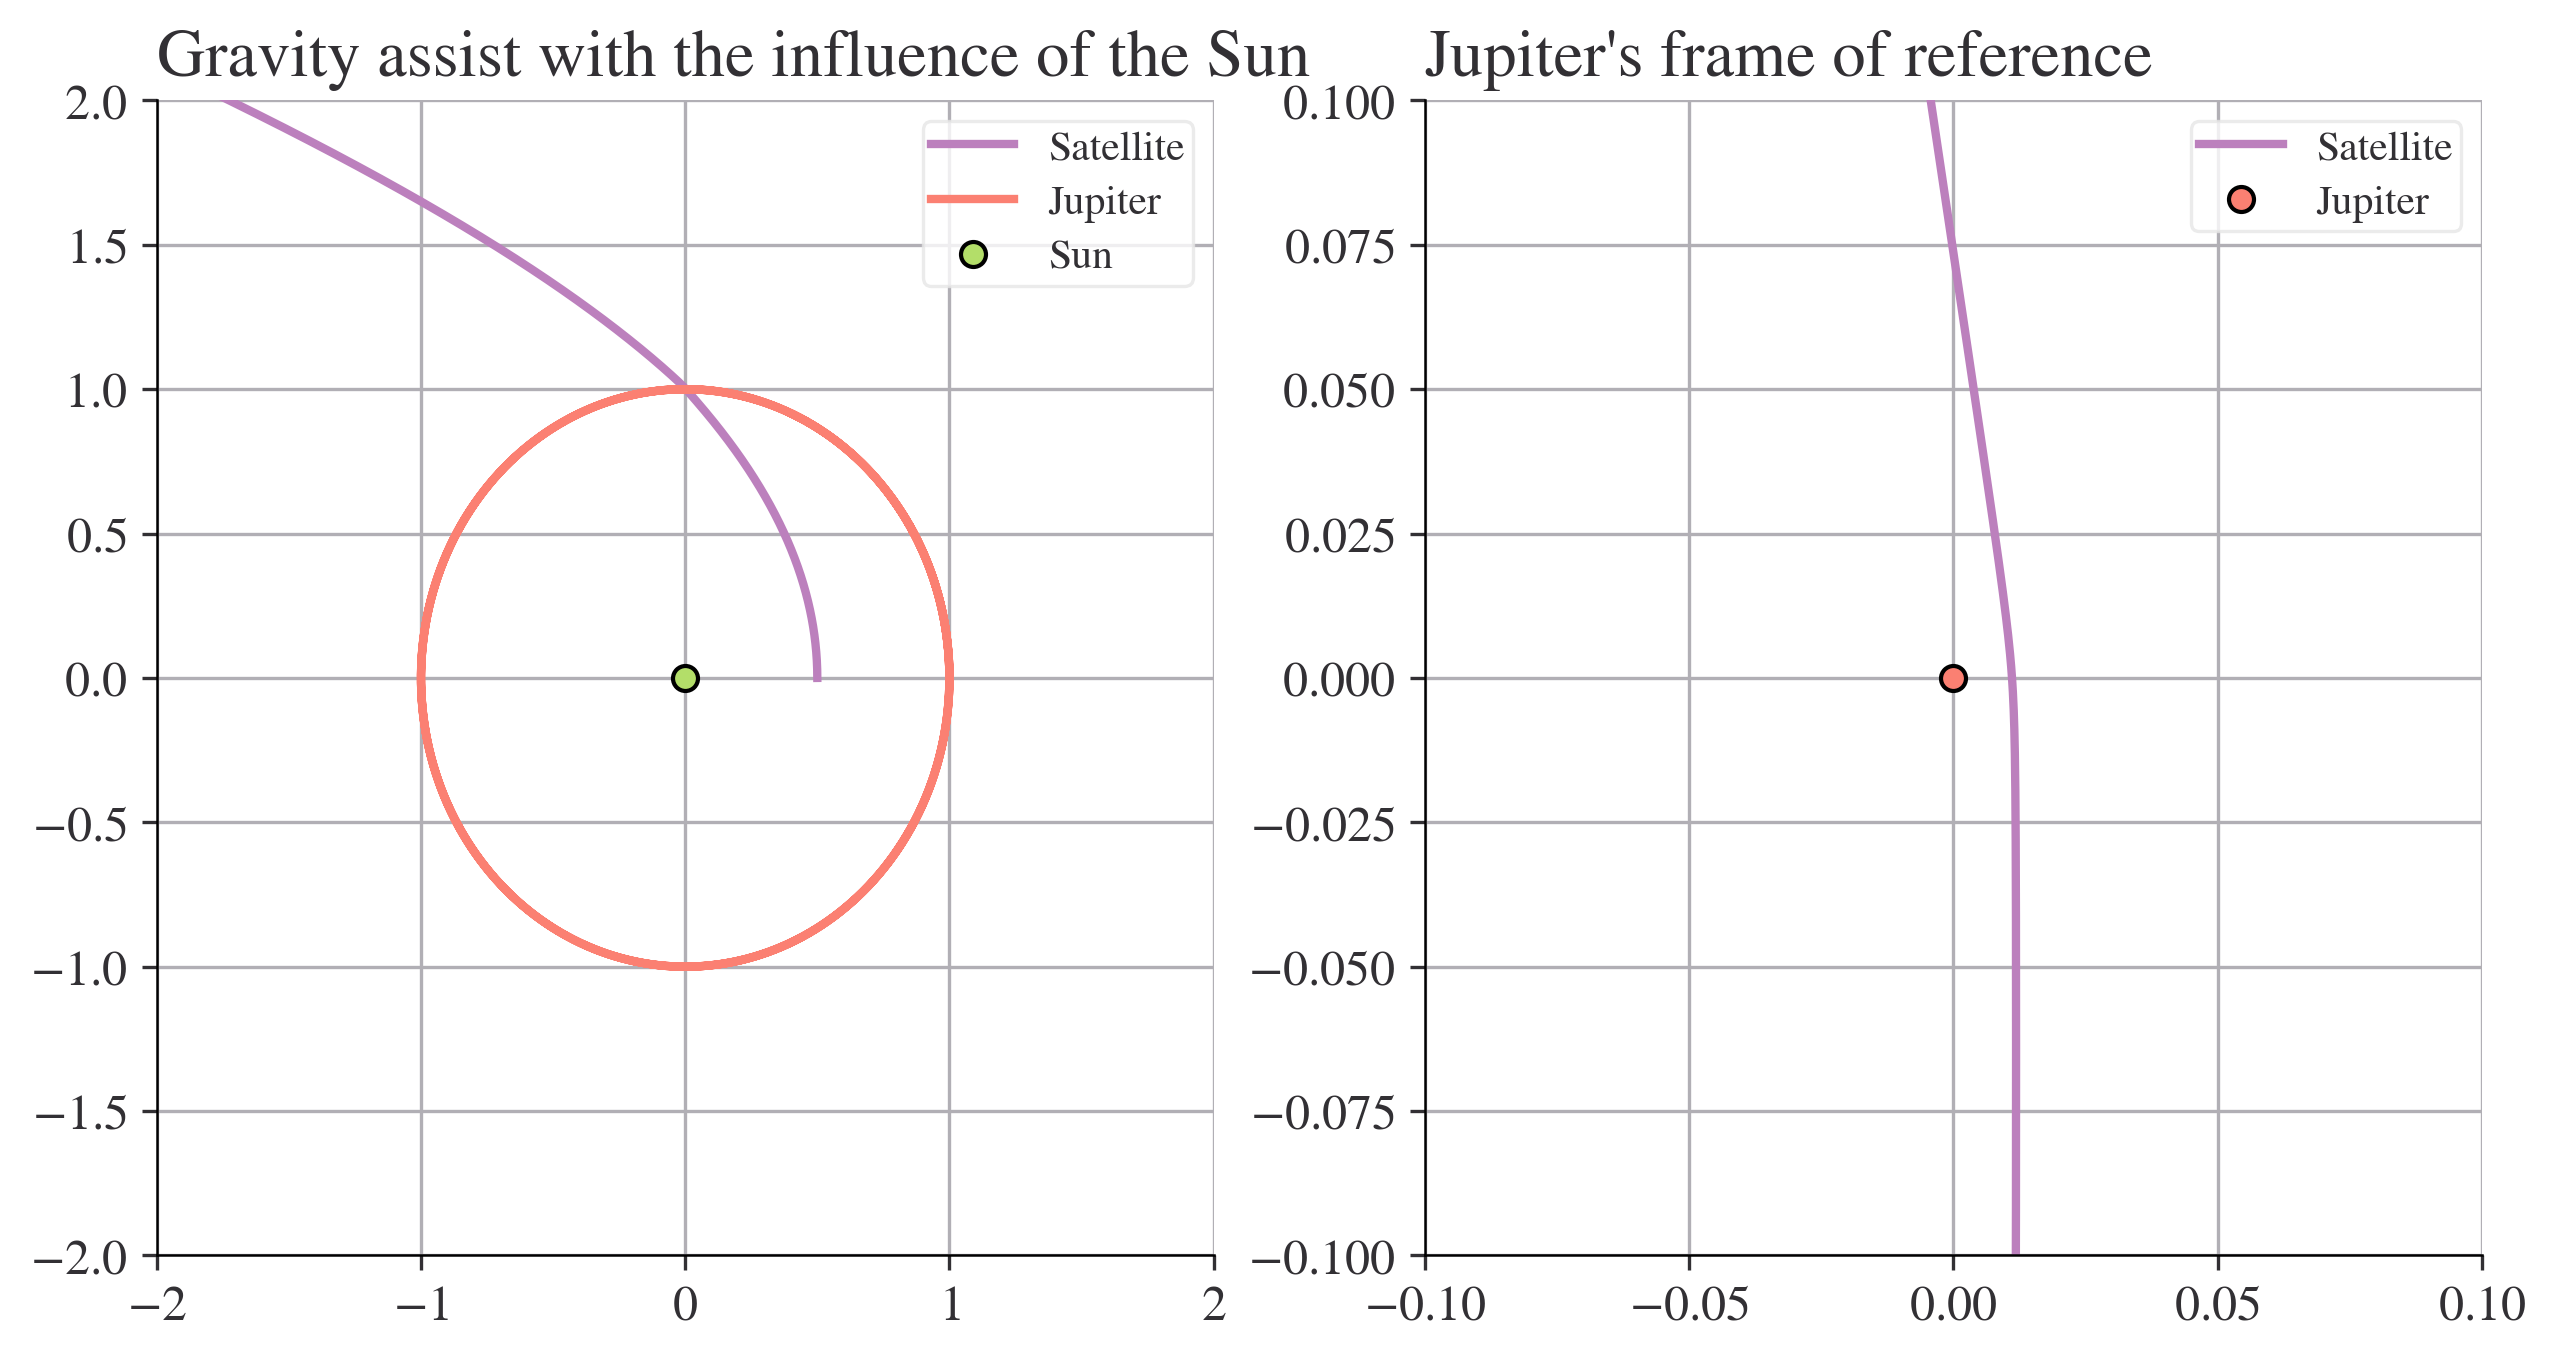

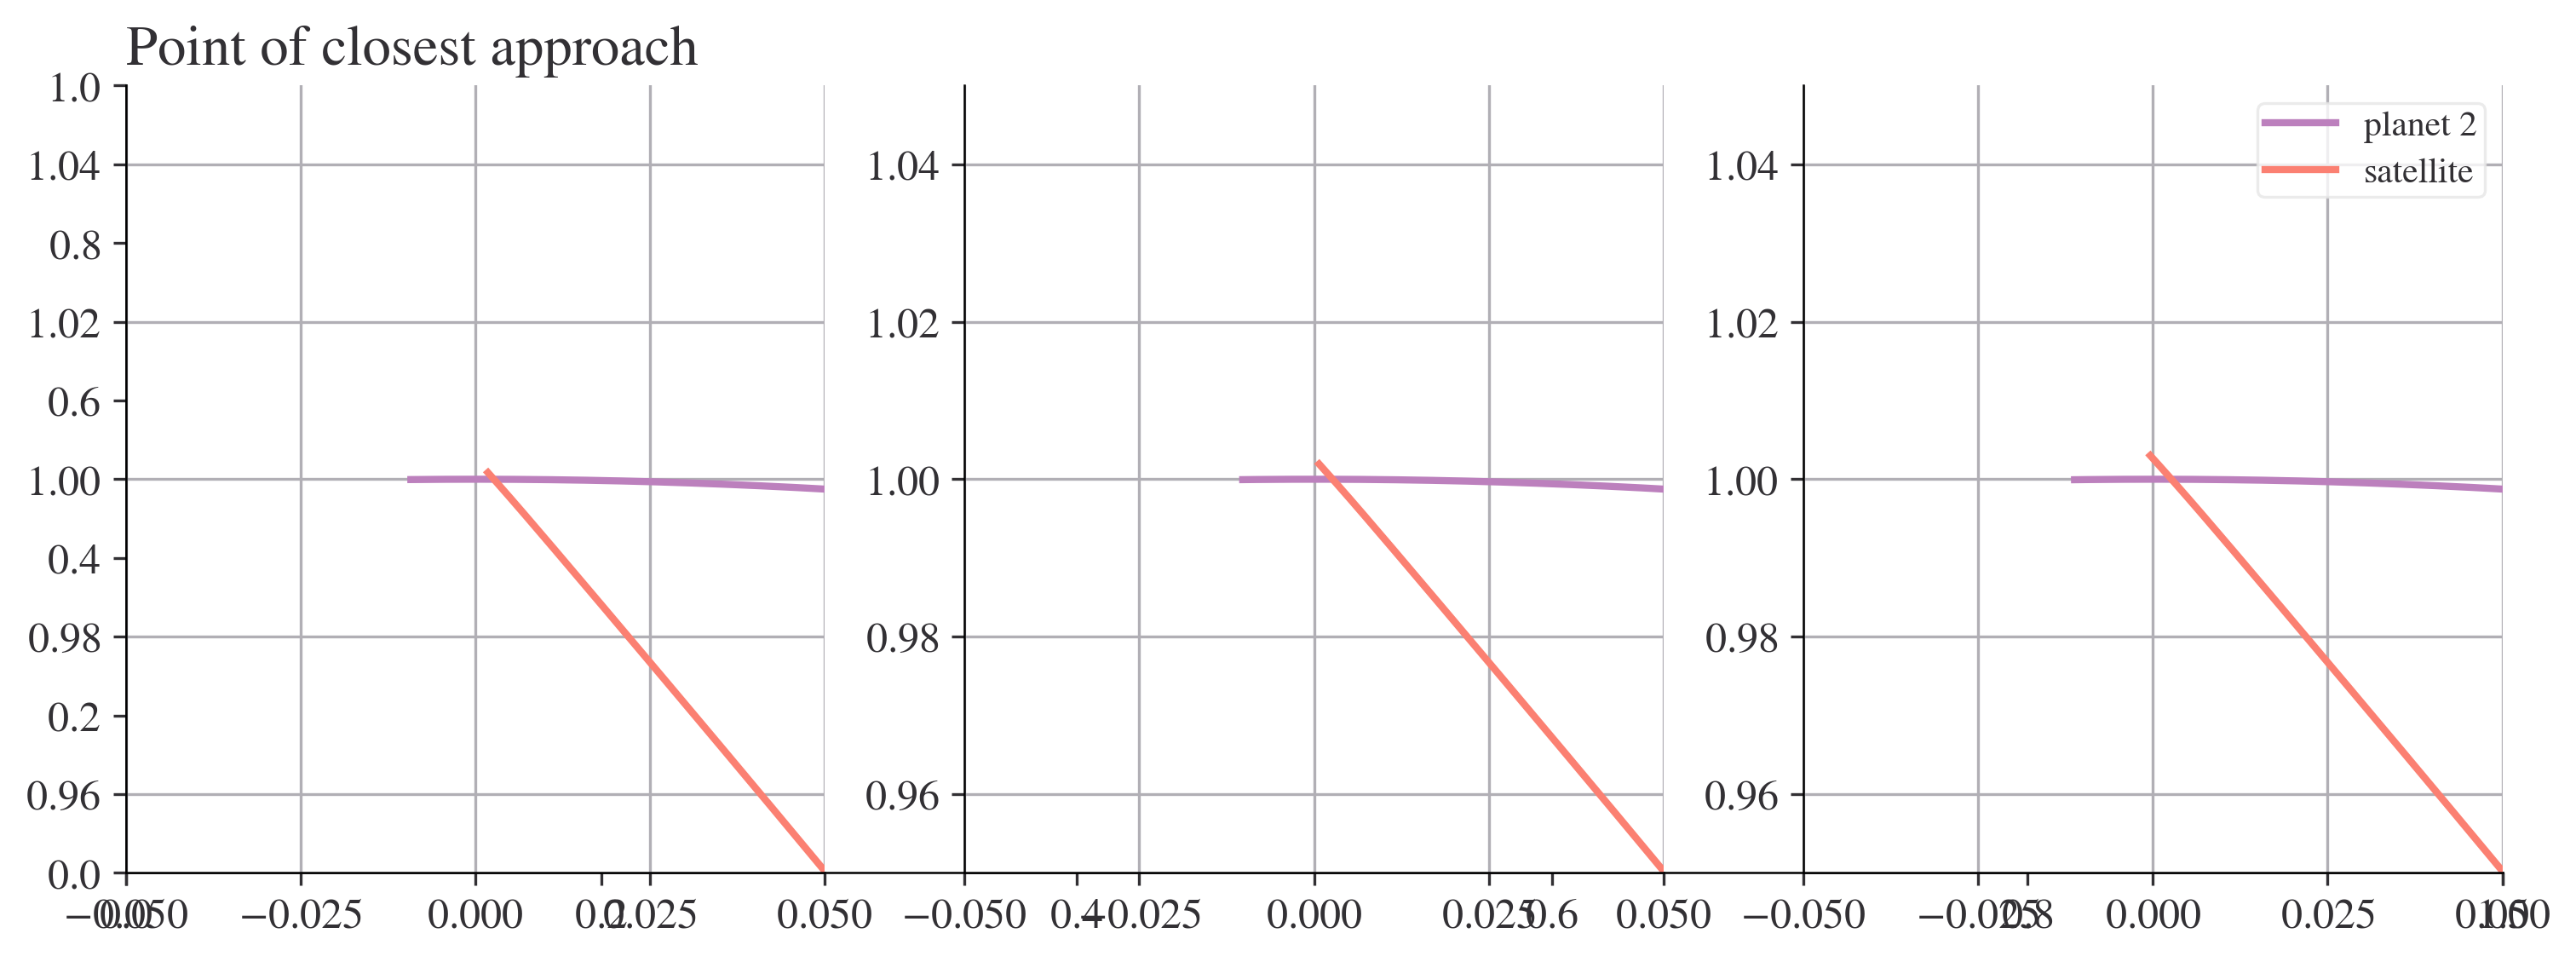

In [61]:
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Gravity assist with the influence of the Sun')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

simend = 1580
n = 1
fig = plt.figure(figsize=(12,4))
plt.title('Point of closest approach')
for i in range(1,4):
    ax = fig.add_subplot(1,3,i)
    ax.plot(r2[:simend + n*i,0], r2[:simend + n*i,1], label='planet 2')
    ax.plot(r3[:simend + n*i,0], r3[:simend + n*i,1], label='satellite')
    ax.set_xlim(-0.05,0.05)
    ax.set_ylim(0.95, 1.05)
    ax.grid()
plt.legend()


Initial velocity of satellite: 2.0
Final velocity of satellite: 0.6864416238540269
Initial velocity of Jupiter: 1.0
Final velocity of Jupiter: 0.9999998522491199
Point of closest approach: 0.011061329643319073


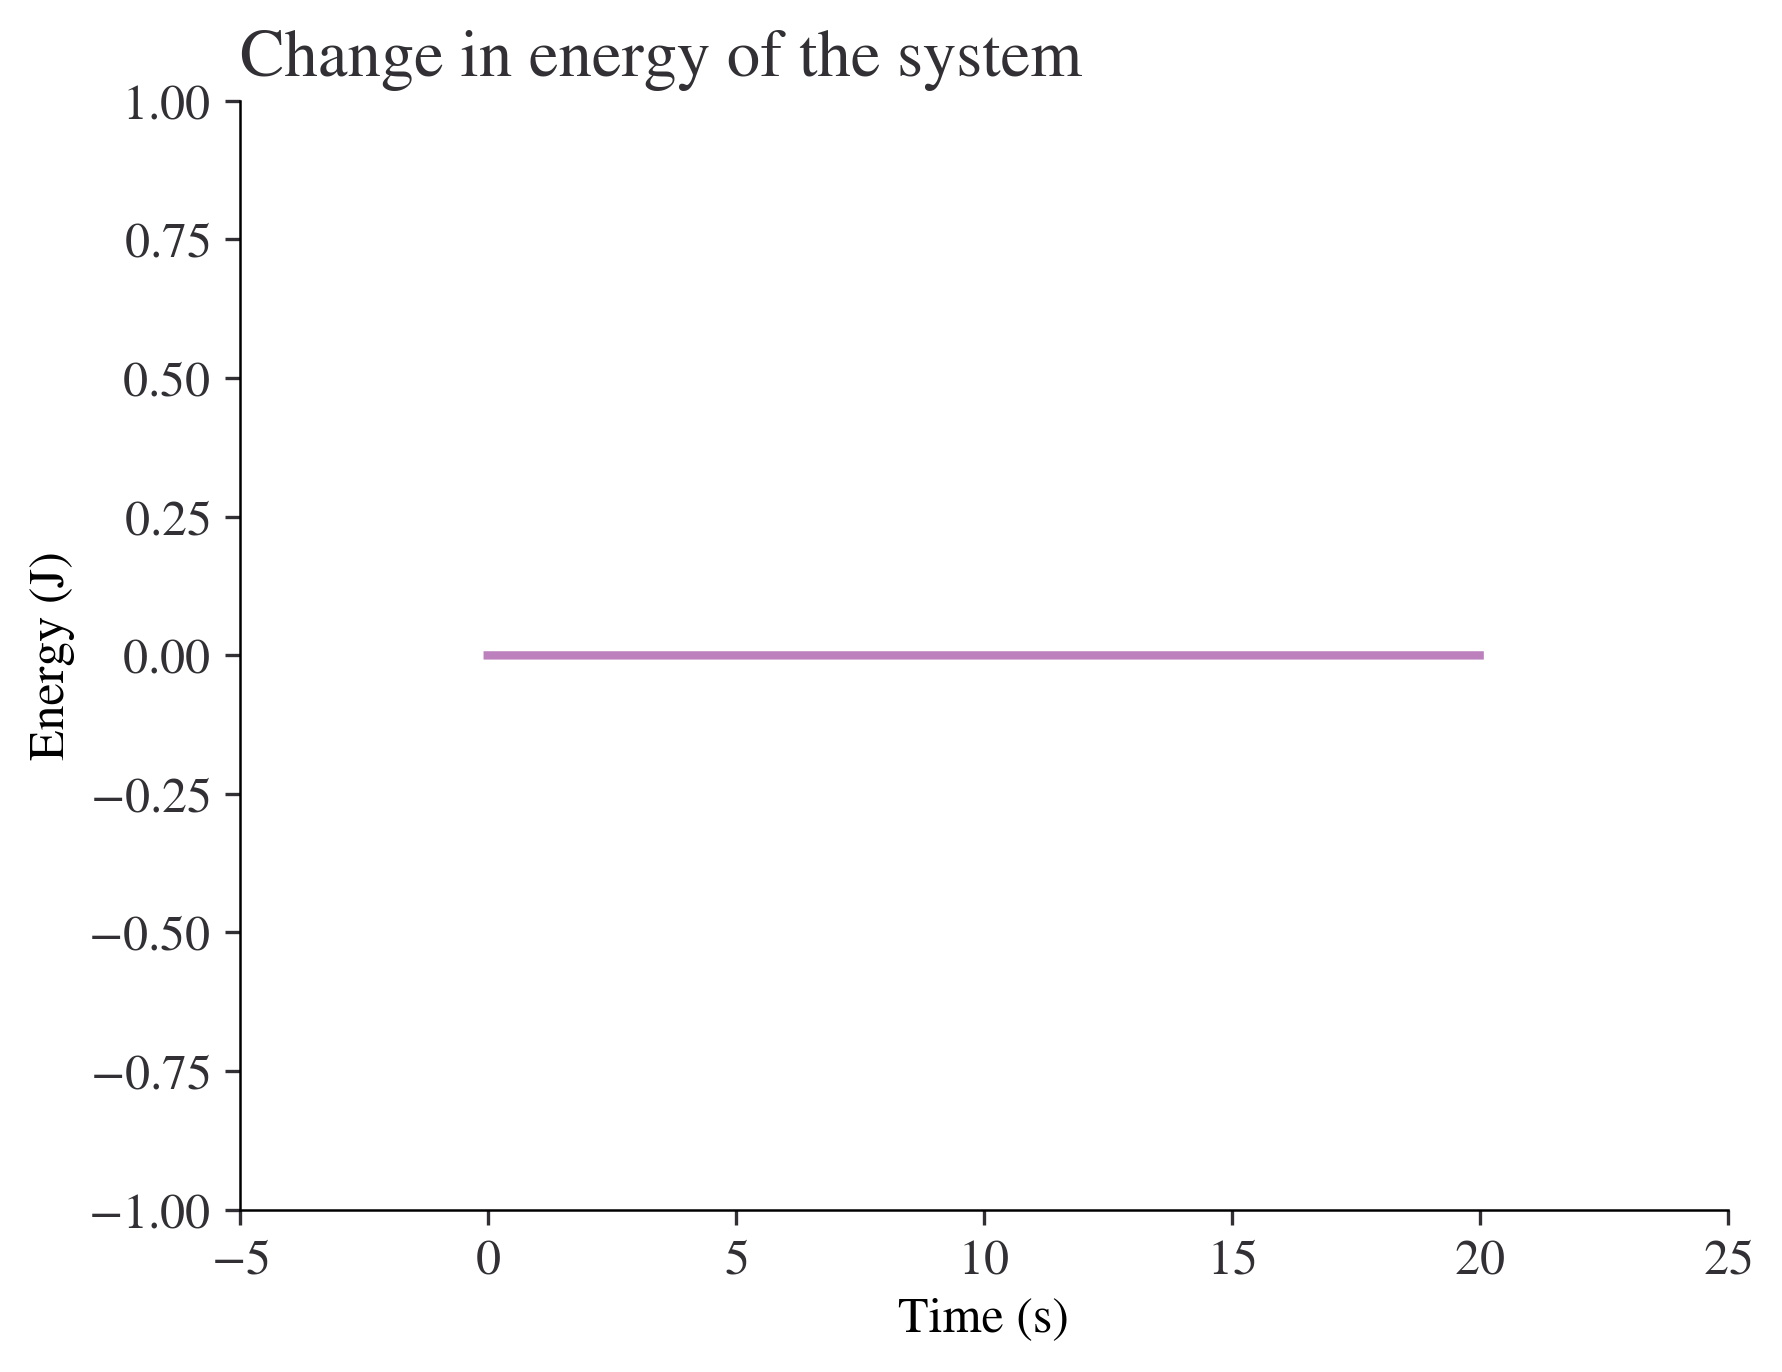

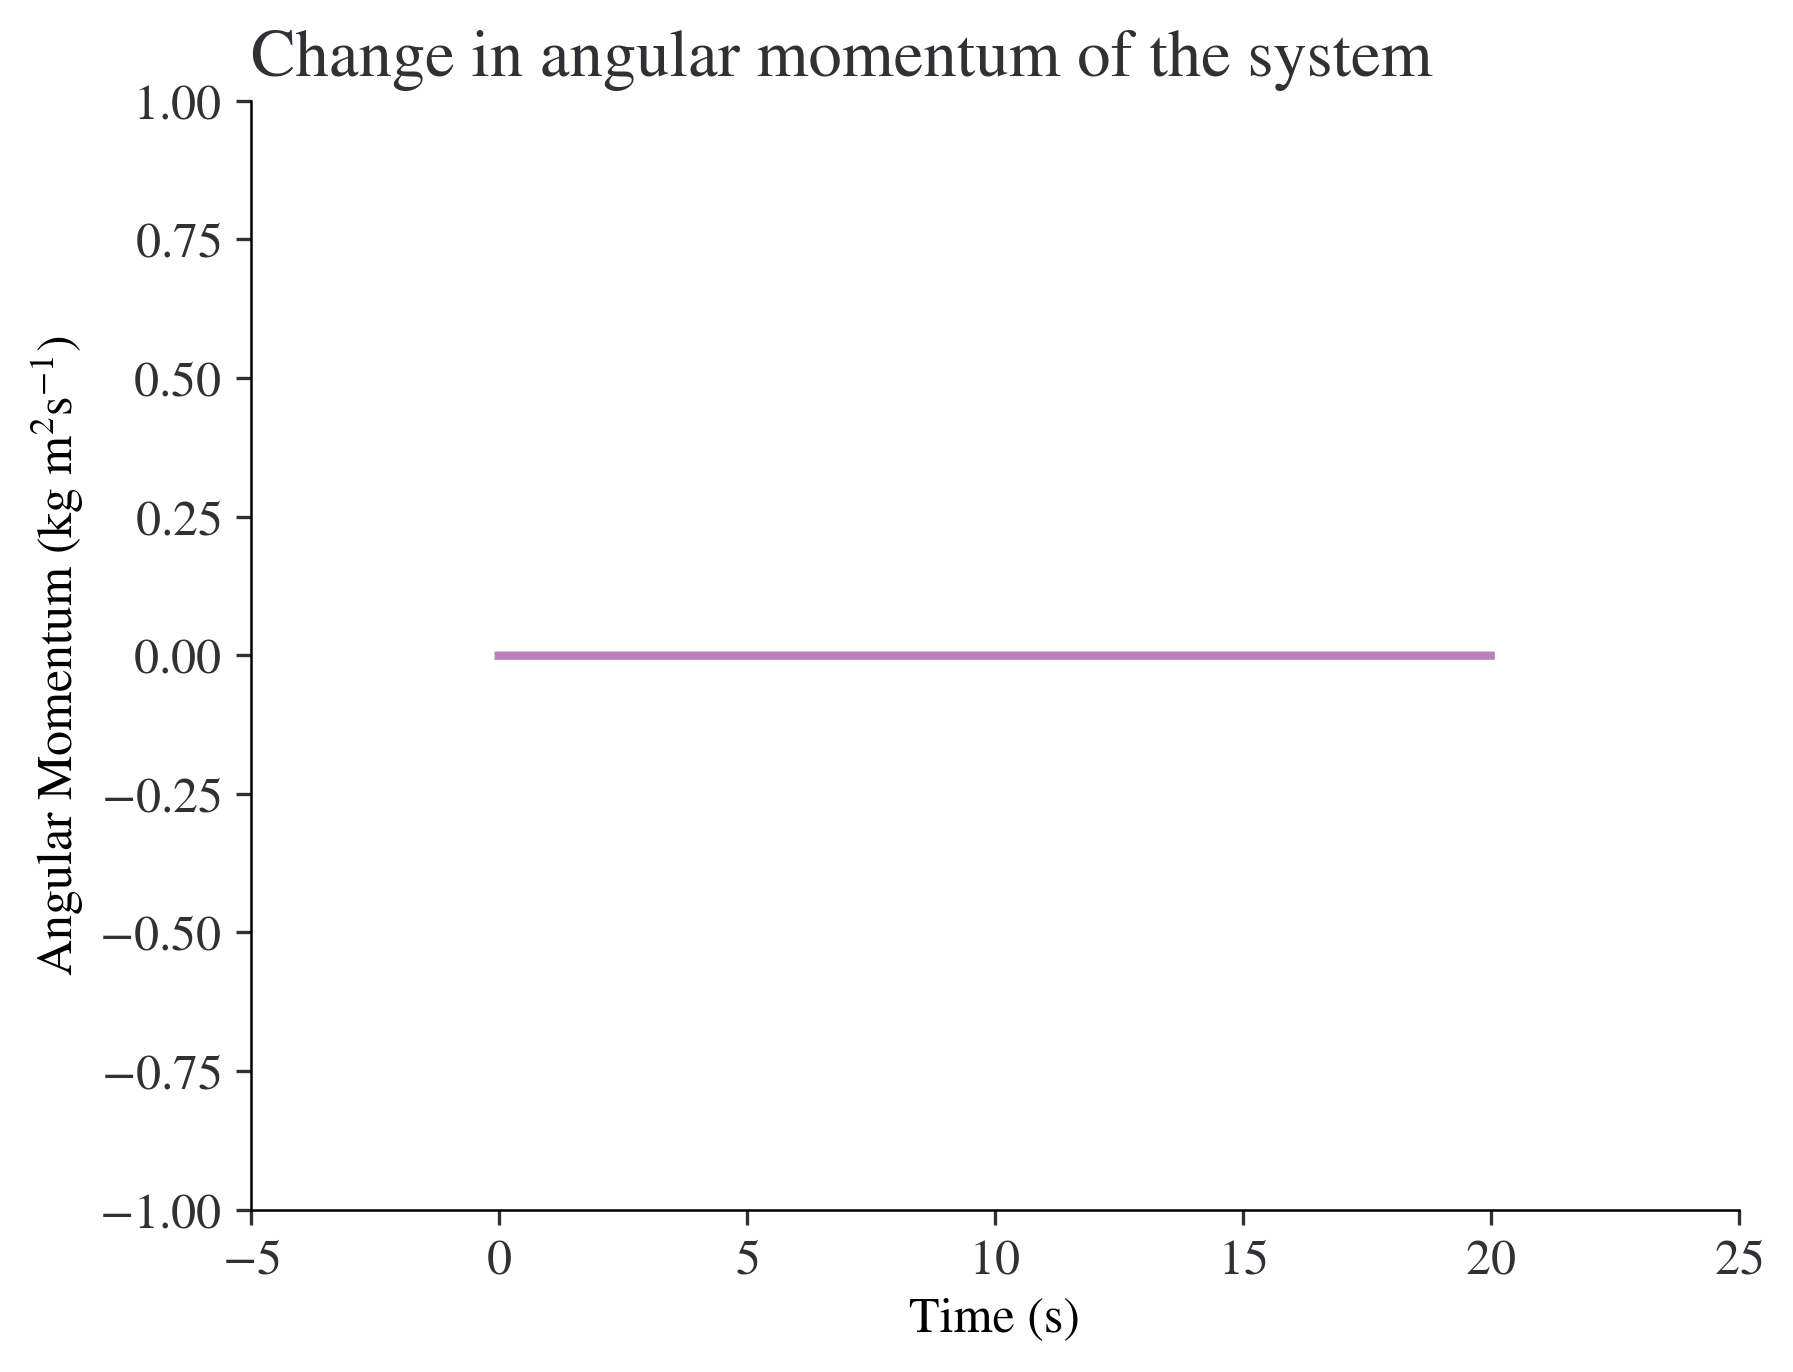

In [62]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of Jupiter: {np.linalg.norm(v2[0])}')
print(f'Final velocity of Jupiter: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2) - G*m1*m3/np.linalg.norm(r1-r3, axis=1) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')

"plt.plot(np.linalg.norm(v3[lag:],axis=1))\nplt.title('Change in velocity of the satellite')\nplt.xlabel('Time step')\nplt.ylabel('Velocity')\n\nprint(np.where(np.linalg.norm(v3, axis=1) == min(np.linalg.norm(v3, axis=1))))"

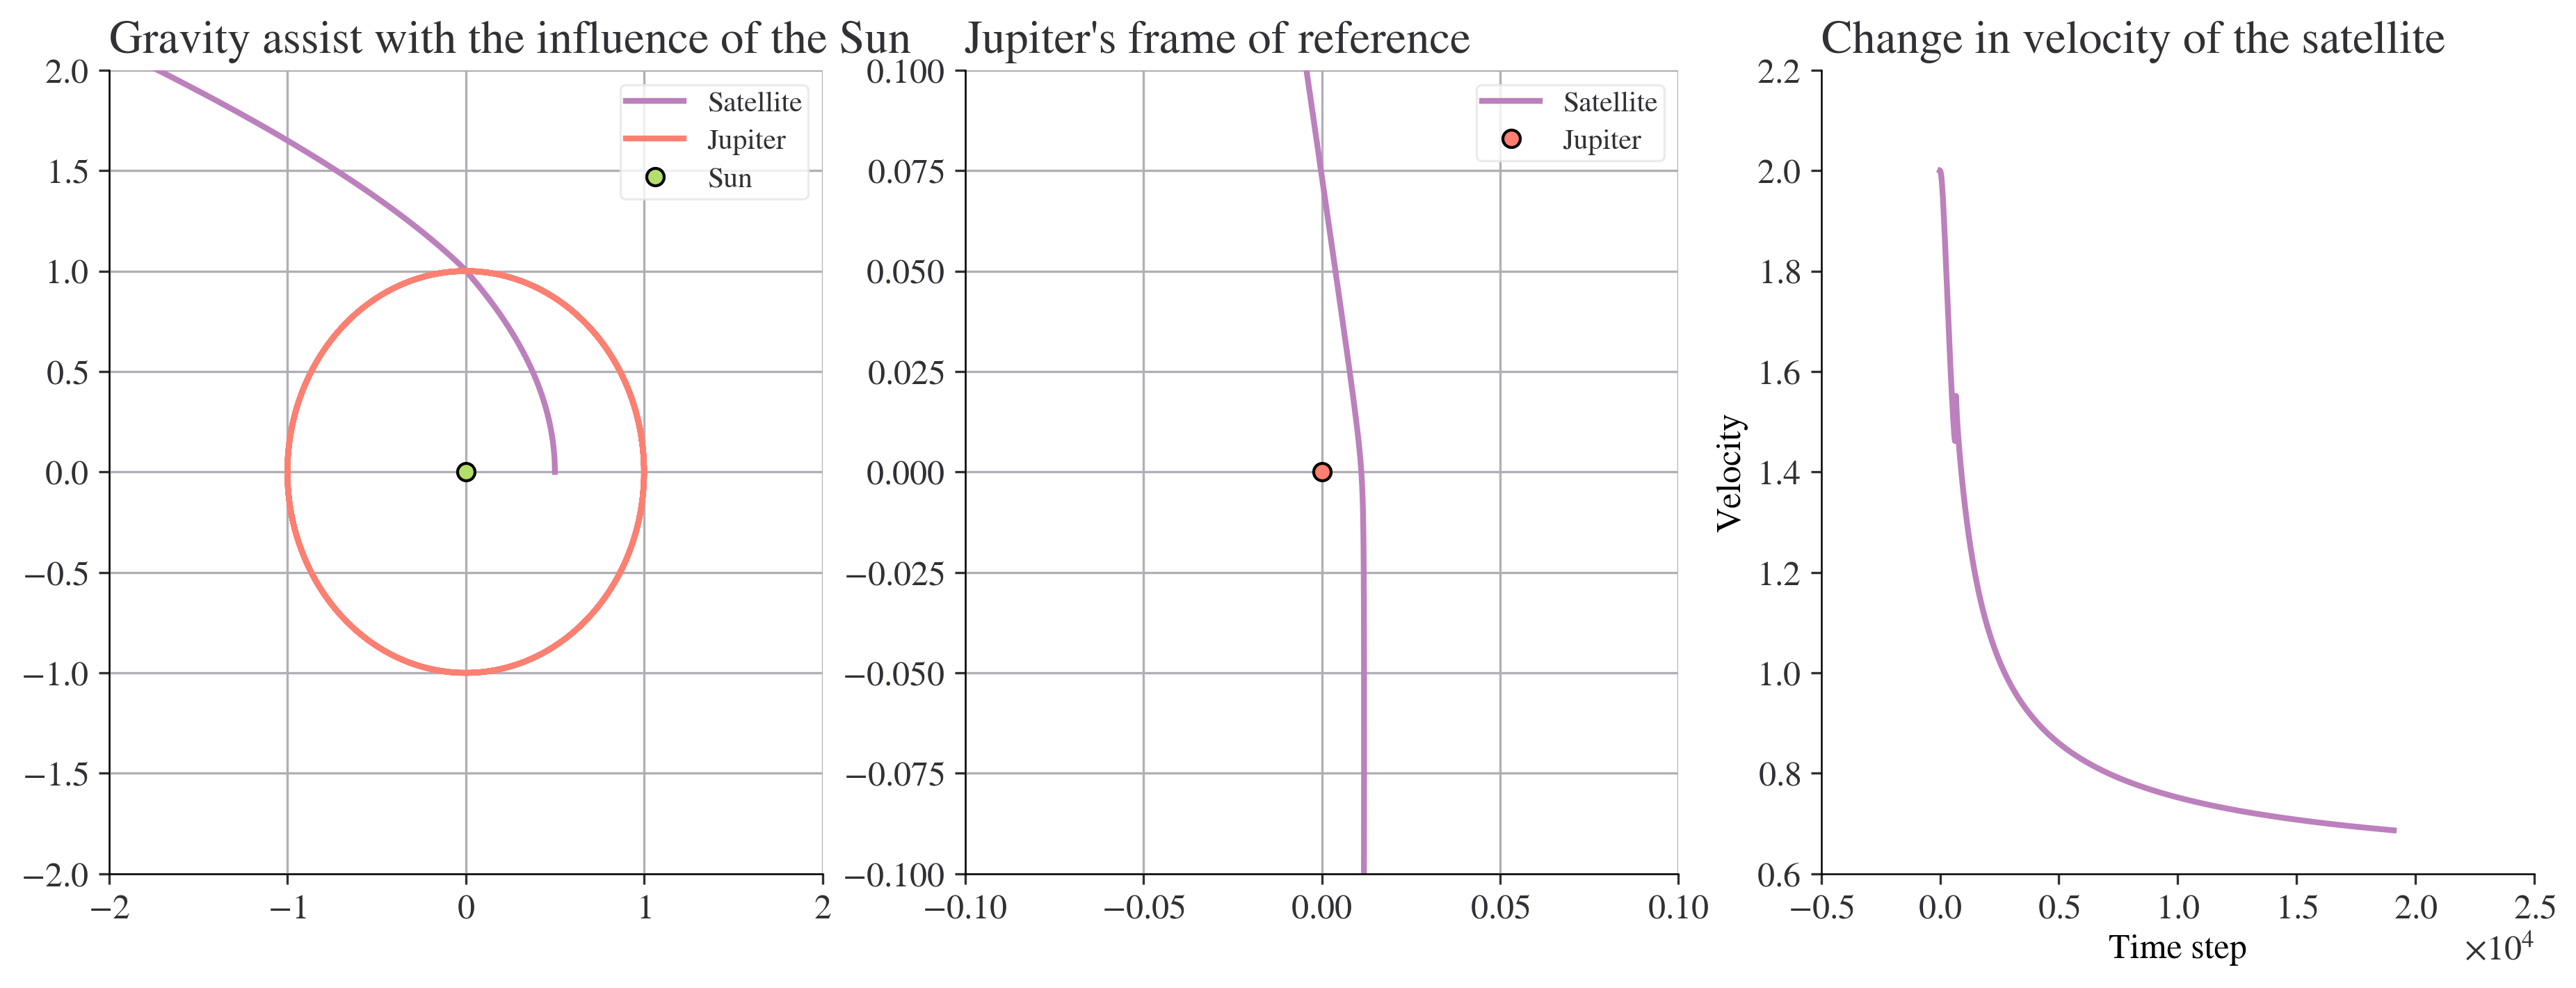

In [63]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Gravity assist with the influence of the Sun')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.plot(np.linalg.norm(v3[lag:],axis=1))
ax3.set_title('Change in velocity of the satellite')
ax3.set_xlabel('Time step')
ax3.set_ylabel('Velocity')

fig.savefig('circularmotion.png')

'''plt.plot(np.linalg.norm(v3[lag:],axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

print(np.where(np.linalg.norm(v3, axis=1) == min(np.linalg.norm(v3, axis=1))))'''

We can see here that we get a very satisfactory gravity assist from Jupiter by lagging the satellite s.t. it intersects it at the right point in time.

# Introducing a fourth body
Given my success with the previous part, I will attempt to model a fourth body which the satellite can subsequently slingshot off. The planet in question will be Saturn, with the orbital radius and mass approximately reflecting this. A similar approach to earlier parts was taken, with the orbit of Saturn also delayed so that it reaches the intersection point with the satellite.

In [64]:
G = 1
m1 = 1
m2 = 1e-3
m3 = 1e-27
m4 = 1e-4
Ndim = 2     
Nsteps = 20000
dt = 0.001

r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
r3 = np.zeros((Nsteps, Ndim))
r4 = np.zeros((Nsteps, Ndim))

v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
v3 = np.zeros((Nsteps, Ndim))
v4 = np.zeros((Nsteps, Ndim))

#lag = 1570 - 664 - this is the maximum lag before the satellite gets dangerously close to Jupiter
lag = 1570 - 659

#lag2 = 2511 - 6898 - see above
#lag2 = 2511 - 6892
lag2 = 2511 - 6895

# Initial conditions
r2[0] = np.array((1.0, 0))
r4[:lag2+1] = np.array((0, 2.0))
r3[:lag+1] = np.array((0.5, 0)) 

v2[0] = np.array((0, np.sqrt(G*m1)))
v4[:lag2+1] = np.array((2.35*np.sqrt(G*m1/2), 0))
v3[:lag+1] = np.array((0, np.sqrt(G*m1/0.25)))

In [65]:
for i in range(Nsteps-1):
    f2 = force(r2[i], r1[i], m2, m1) 

    r2[i+1] = r2[i] + dt*v2[i] + (dt**2)*f2/(2*m2)

    f2new = force(r2[i+1], r1[i+1], m2, m1) 

    v2[i+1] = v2[i] + dt*((f2+f2new) / (2*m2)) 


for j in range(lag2, Nsteps-1):
    f4 = force(r4[j], r1[j], m4, m1) 

    r4[j+1] = r4[j] + dt*v4[j] + (dt**2)*f4/(2*m4)

    f4new = force(r4[j+1], r1[j+1], m2, m1) 

    v4[j+1] = v4[j] + dt*((f4+f4new) / (2*m4)) 


for k in range(lag,Nsteps-1):
    f3 = force(r3[k], r2[k], m3, m2) + force(r3[k], r4[k], m3, m2) + force(r3[k], r1[k], m3, m1)

    r3[k+1] = r3[k] + dt*v3[k] + (dt**2)*f3/(2*m3)

    f3new = force(r3[k+1], r2[k+1], m3, m2) + force(r3[k+1], r4[k+1], m3, m2) + force(r3[k+1], r1[k+1], m3, m1)

    v3[k+1] = v3[k] + dt*((f3+f3new) / (2*m3))


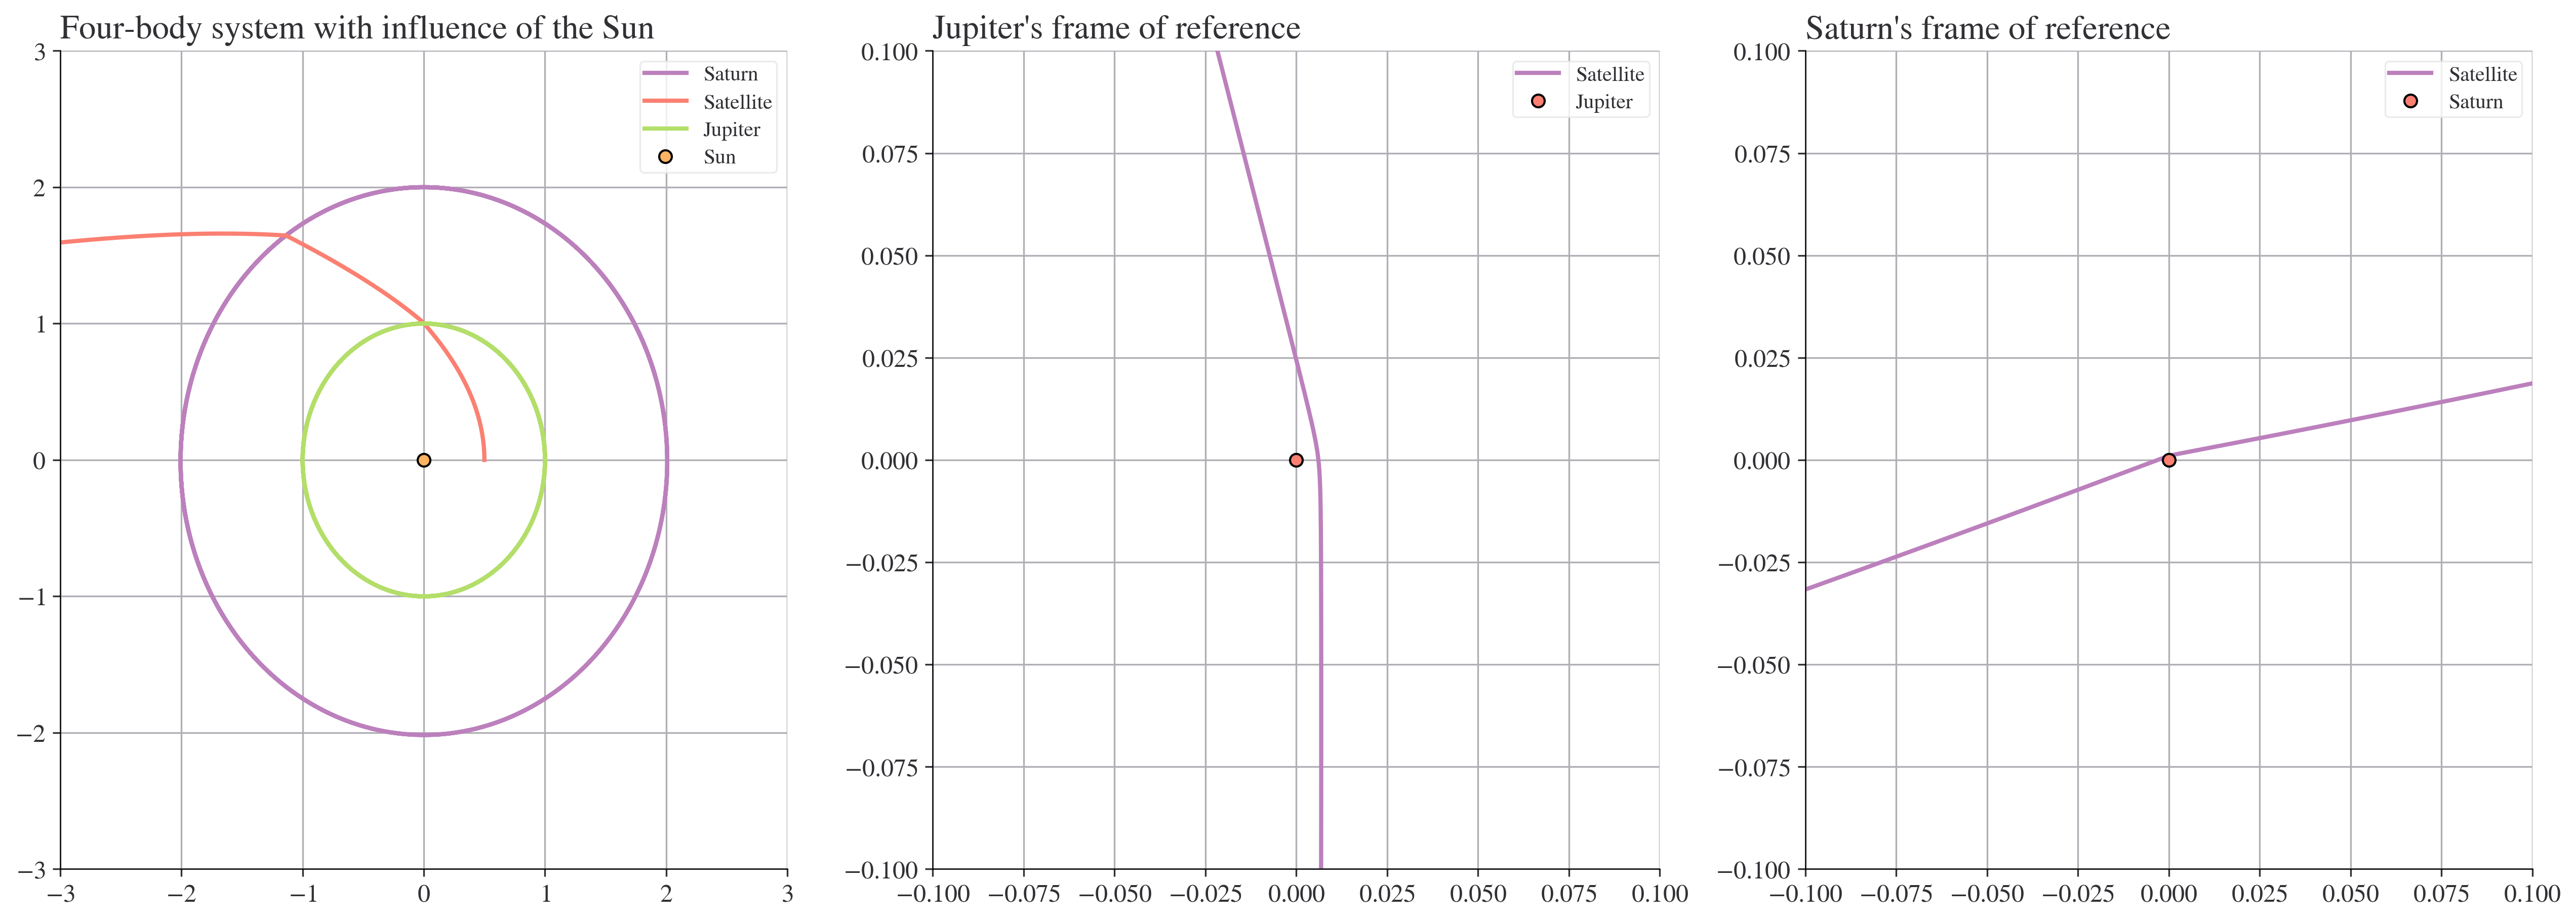

In [66]:
fig = plt.figure(figsize=(21,7))
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Four-body system with influence of the Sun')
ax1.plot(r4[:,0], r4[:,1], label='Saturn')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(1,3,3)
ax3.set_title('Saturn\'s frame of reference')
ax3.plot(r3[:,0]-r4[:,0], r3[:,1]-r4[:,1], label='Satellite')
ax3.set_xlim(-0.1, 0.1)
ax3.set_ylim(-0.1, 0.1)
ax3.plot(0,0,'o',label='Saturn')
ax3.grid()
ax3.legend()

We see in the above plot that there are two consecutive slingshots off Jupiter and Saturn in quick succession.

(array([19999]),)


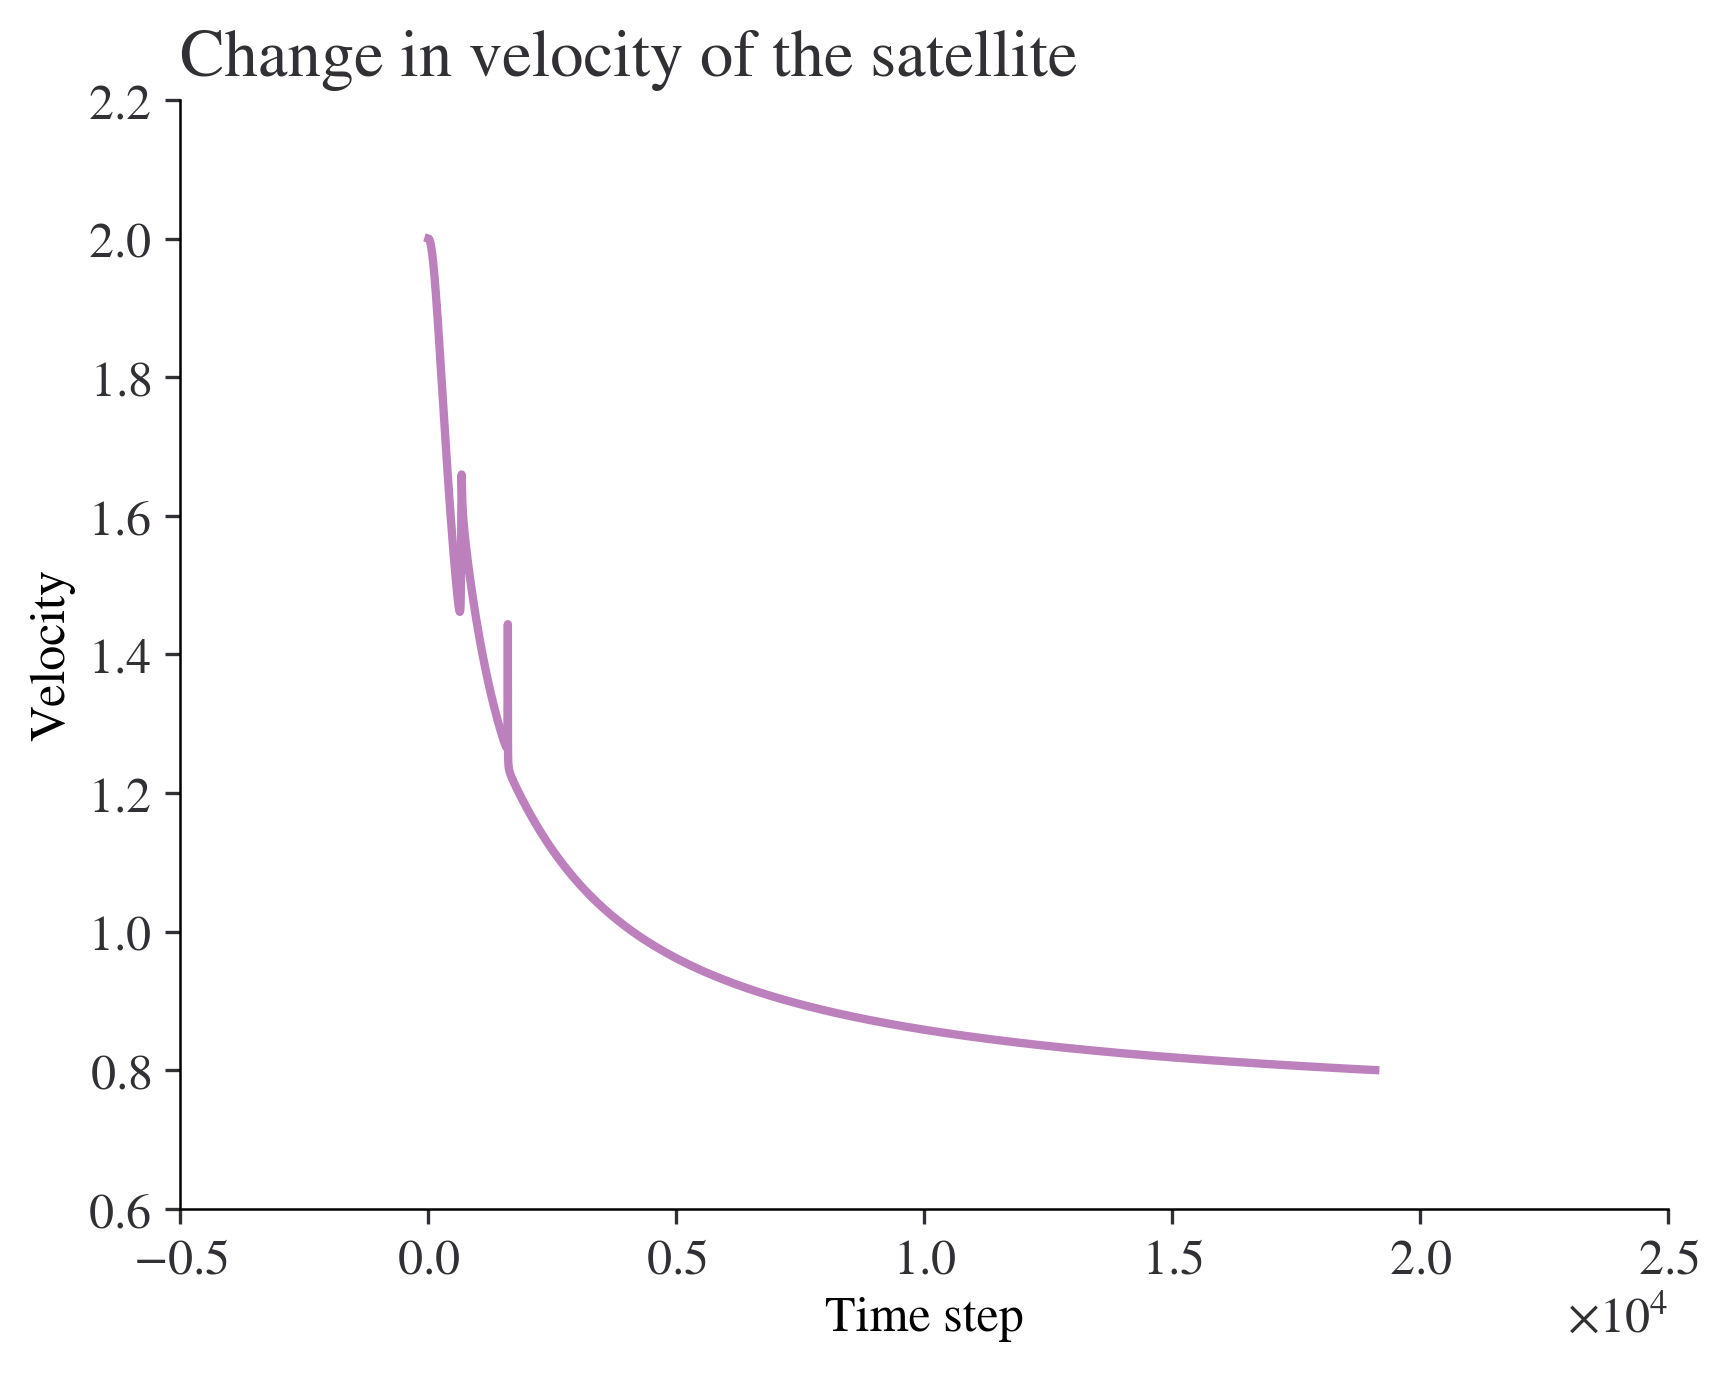

In [67]:
'''# Rough working
mag_r3 = np.linalg.norm(r3, axis=1)
print(np.where(abs(mag_r3 - 2) < 1e-3))

mag_r4 = np.linalg.norm(r4, axis=1)
print(np.where(abs(r4 - r3[2511]) < 1e-3))
'''

'''fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,2,1)
ax1.set_title('Four-body system with influence of the Sun')
ax1.plot(r4[:,0], r4[:,1], label='Saturn')
ax1.plot(r3[:,0], r3[:,1], label='Satellite')
ax1.plot(r2[:,0], r2[:,1], label='Jupiter')
ax1.plot(0, 0, 'o', label='Sun')
ax1.set_xlim(-3,3)
ax1.set_ylim(-3,3)
ax1.grid()
ax1.legend() 

ax2 = fig.add_subplot(2,2,2)
ax2.set_title('Jupiter\'s frame of reference')
ax2.plot(r3[:,0]-r2[:,0], r3[:,1]-r2[:,1], label='Satellite')
ax2.set_xlim(-0.1, 0.1)
ax2.set_ylim(-0.1, 0.1)
ax2.plot(0,0,'o',label='Jupiter')
ax2.grid()
ax2.legend()

ax3 = fig.add_subplot(2,2,3)
ax3.set_title('Saturn\'s frame of reference')
ax3.plot(r3[:,0]-r4[:,0], r3[:,1]-r4[:,1], label='Satellite')
ax3.set_xlim(-0.1, 0.1)
ax3.set_ylim(-0.1, 0.1)
ax3.plot(0,0,'o',label='Saturn')
ax3.grid()
ax3.legend()

ax4 = fig.add_subplot(2,2,4)
ax4.plot(np.linalg.norm(v3[lag:],axis=1))
ax4.set_title('Change in velocity of the satellite')
ax4.set_xlabel('Time step')
ax4.set_ylabel('Velocity')

fig.savefig('fourbody.png')'''


plt.plot(np.linalg.norm(v3[lag:],axis=1))
plt.title('Change in velocity of the satellite')
plt.xlabel('Time step')
plt.ylabel('Velocity')

print(np.where(np.linalg.norm(v3, axis=1) == min(np.linalg.norm(v3, axis=1))))


Initial velocity of satellite: 2.0
Final velocity of satellite: 0.800204823796912
Initial velocity of planet 2: 1.0
Final velocity of planet 2: 0.9999998522491199
Point of closest approach: 0.0060600961826097035


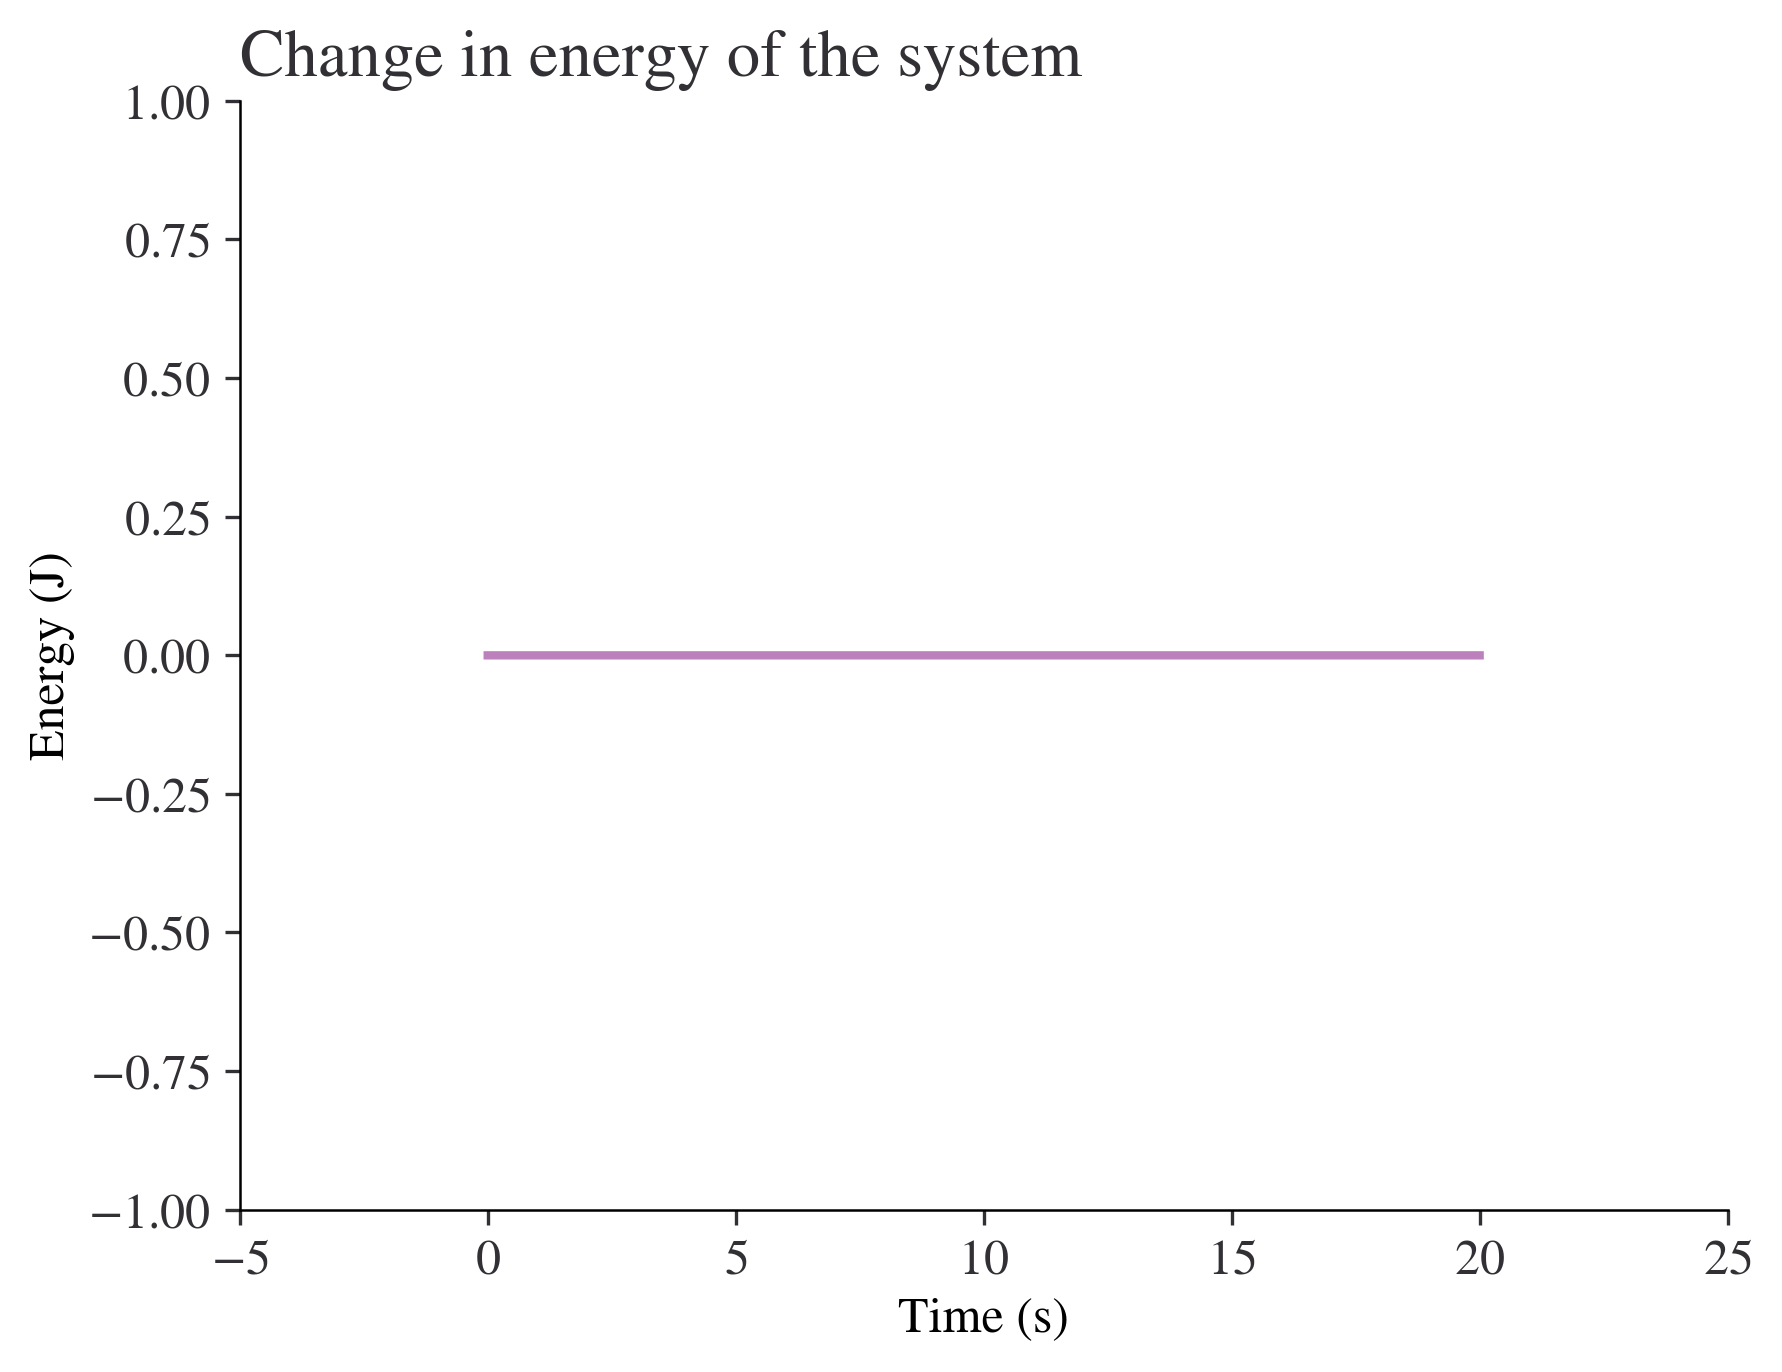

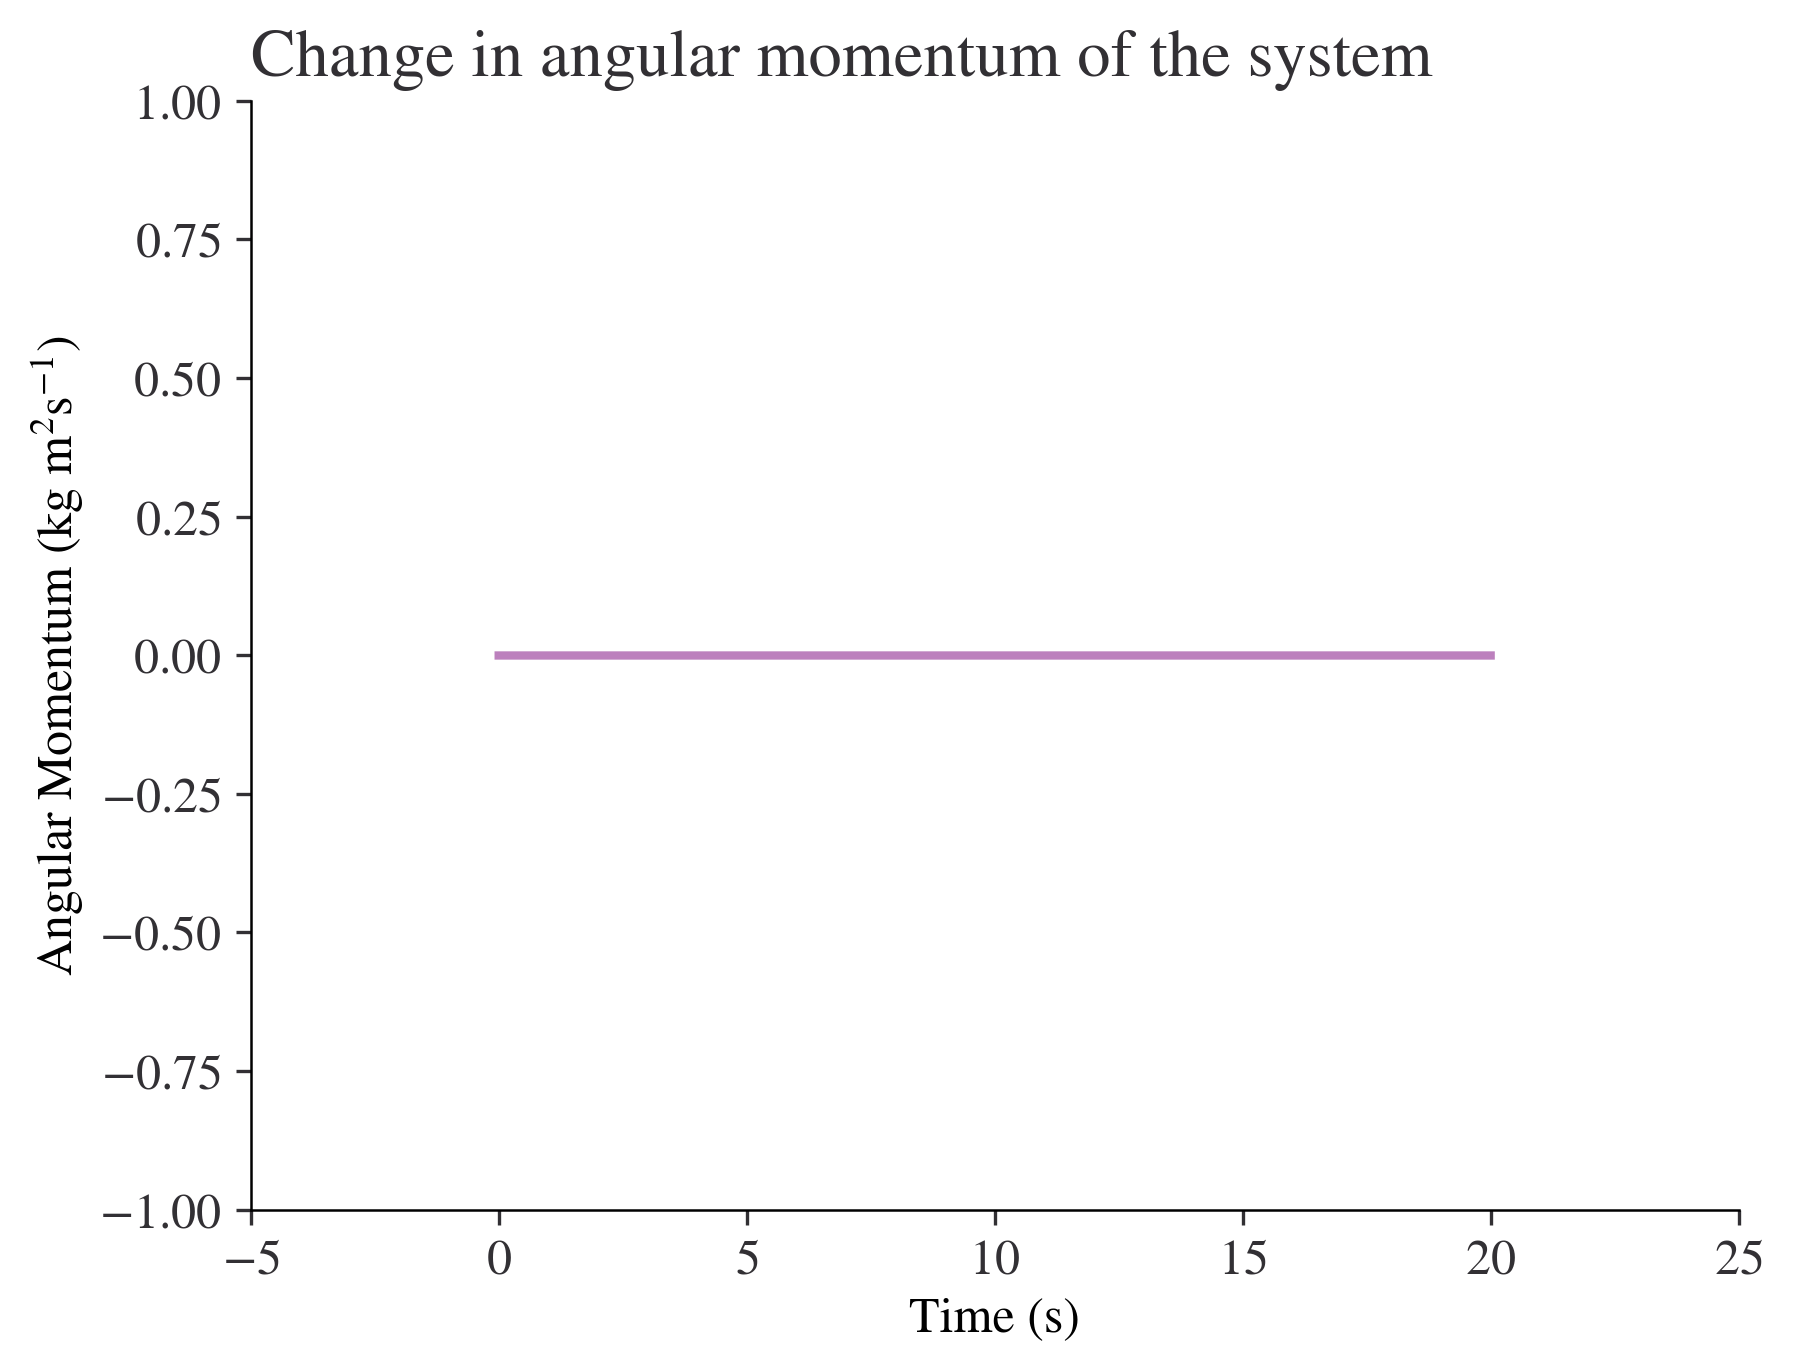

In [68]:
print(f'Initial velocity of satellite: {np.linalg.norm(v3[0])}')
print(f'Final velocity of satellite: {np.linalg.norm(v3[-1])}')

print(f'Initial velocity of planet 2: {np.linalg.norm(v2[0])}')
print(f'Final velocity of planet 2: {np.linalg.norm(v2[-1])}')

e = 0.5 * (m2*np.linalg.norm(v2,axis=1)**2 + m3*np.linalg.norm(v3,axis=1)**2 + m4*np.linalg.norm(v4,axis=1)**2) - G*m1*m3/np.linalg.norm(r1-r3, axis=1) - G*m1*m2/np.linalg.norm(r1-r2, axis=1) - G*m2*m3/np.linalg.norm(r2-r3, axis=1) - G*m1*m4/np.linalg.norm(r1-r4, axis=1)
plt.plot(np.arange(len(e))*dt,e)
plt.title('Change in energy of the system')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.ylim(-1,1)

plt.figure()
l = m2 * np.cross(v2,r2,axis=1) + m3 * np.cross(v3,r3,axis=1) + m4 * np.cross(v4,r4,axis=1)
plt.plot(np.arange(len(l))*dt,l)
plt.title('Change in angular momentum of the system')
plt.xlabel('Time (s)')
plt.ylabel(r'Angular Momentum (kg m$^2$s$^{-1}$)')
plt.ylim(-1,1)

d = np.linalg.norm(r2-r3, axis=1)
print(f'Point of closest approach: {min(d)}')